In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

**Clustering:**
- <a href = #link1.1>Q1</a>
- <a href = #link2.1>Q2</a>
- <a href = #link3.1>Q3</a>
- <a href = #link4.1>Q4</a>
- <a href = #link5.1>Q5</a>
- <a href = #link6.1>Q6</a>
- <a href = #link7.1>Q7</a>
- <a href = #link8.1>Q8</a>
- <a href = #link9.1>Q9</a>


**PCA:**
- <a href = #link1.2>Q1</a>
- <a href = #link2.2>Q2</a>
- <a href = #link3.2>Q3</a>
- <a href = #link4.2>Q4</a>
- <a href = #link5.2>Q5</a>
- <a href = #link6.2>Q6</a>
- <a href = #link7.2>Q7</a>
- <a href = #link8.2>Q8</a>




## <a name ='link1.1'>**Q1**</a><br>
Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.<br>


Loading Dataset

In [4]:
df_ad=pd.read_excel("Clustering+Clean+Ads_Data.xlsx")

In [51]:
df_ad

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  
0              323       1   0.00  0.35   0.0000  0.309598  0.0  0.0  
1              285       1   0.00  0.35   0.0000  0.350877  0.0  0.0  
2              355       1   0.00  0.35   0.0000  0.281690  0.0  0.0  
3              495       1   0.00  0.35   0.0000  0.202020  0.0  0.0  
4              242       1   0.00  0.35   0.0000  0.413223  0.0  0.0  
...            ...     ...    ...   ...      ...       ...  ...  ...  
23061            1       1   0.07  0.35   0.0455       NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260       NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325       NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455       NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585       NaN  NaN  NaN  

[23066 rows x 19 columns]

In [5]:
# printing the Top 5 records
df_ad.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.309598  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.350877  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.281690  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.202020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.413223  0.0  0.0

Bottom 5 records

In [69]:
df_ad.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

Columns Information

In [349]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

Data Summary

In [71]:
df_ad.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.000000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.000000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.000000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.000000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.000000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.000000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.210000   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.000000   
CTR                    18330.0  7.366038e+00  7.515998e+00      0.010874   
CPM                    18330.0  7.672045e+00  6.481391e+00      0.000000   
CPC                    18330.0  3.510606e-01  3.433338e-01      0.000000   

                                25%            50%           75%          max  
Ad - Length              120.000000     300.000000  7.200000e+02       728.00  
Ad- Width                250.000000     300.000000  6.000000e+02       600.00  
Ad Size                72000.000000   72000.000000  8.400000e+04    216000.00  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  27592861.00  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  14702025.00  
Impressions             7990.500000  225290.000000  1.112428e+06  14194774.00  
Clicks                   710.000000    4425.000000  1.279375e+04    143049.00  
Spend                     85.180000    1425.125000  3.121400e+03     26931.87  
Fee                        0.330000       0.350000  3.500000e-01         0.35  
Revenue                   55.365375     926.335000  2.091338e+03     21276.18  
CTR                        0.258301       8.257612  1.300110e+01       100.00  
CPM                        1.710000       7.660000  1.251000e+01        81.56  
CPC                        0.090000       0.160000  5.700000e-01         7.26

In [56]:
df_ad[['InventoryType','Ad Type','Platform','Device Type','Format']].describe()

InventoryType   Ad Type Platform Device Type Format
count          23066     23066    23066       23066  23066
unique             7        14        3           2      2
top          Format4  Inter224    Video      Mobile  Video
freq            7165      1658     9873       14806  11552

Checking Duplicates

In [153]:
df_ad.duplicated().sum()

0

Checking Null Values 

In [52]:
df_ad.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

Univariate Analysis

In [377]:
df_ad.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

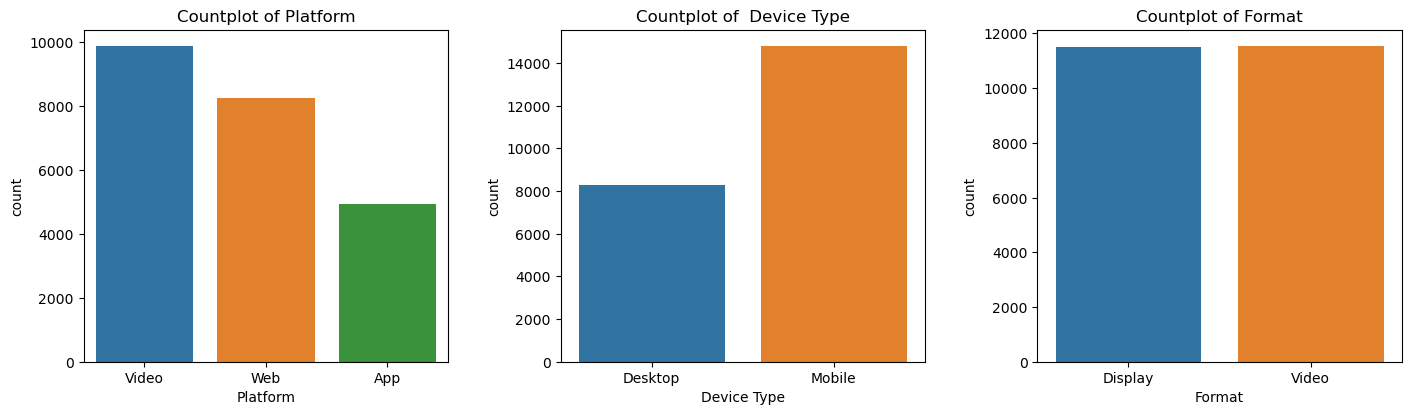

In [102]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
fig.tight_layout(pad=5.0)


sns.countplot(data=df_ad,x='Platform',ax=ax[0],order = df_ad['Platform'].value_counts().index).set(title='Countplot of Platform')
sns.countplot(data=df_ad,x='Device Type',ax=ax[1]).set(title='Countplot of  Device Type');
sns.countplot(data=df_ad,x='Format',ax=ax[2]).set(title='Countplot of Format');

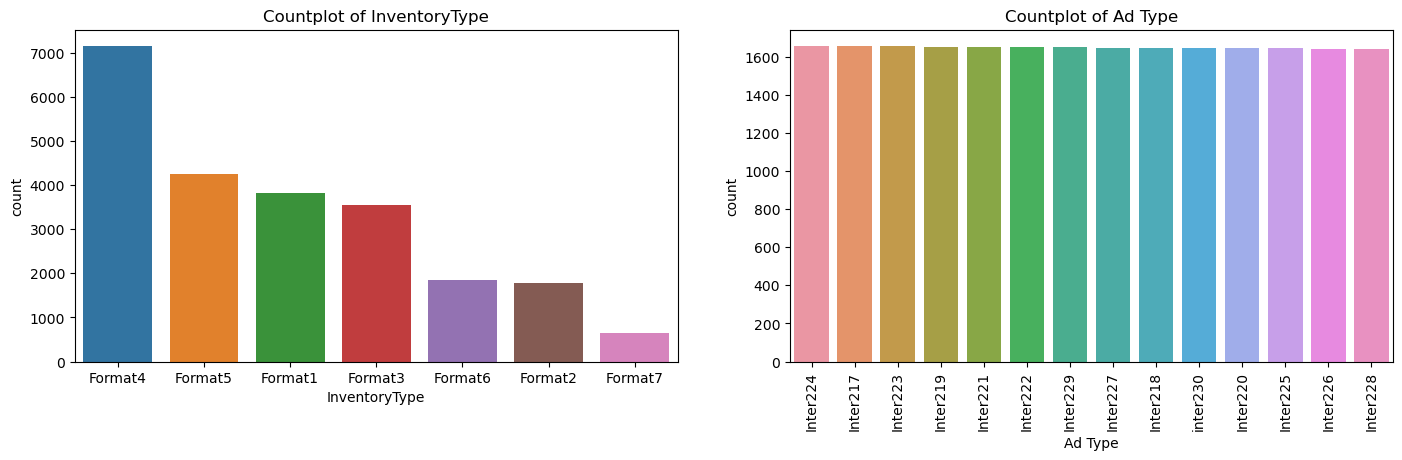

In [98]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
fig.tight_layout(pad=5.0)
sns.countplot(data=df_ad,x='InventoryType',ax=ax[0],order = df_ad['InventoryType'].value_counts().index).set(title='Countplot of InventoryType')
plt.xticks(rotation=90);
sns.countplot(data=df_ad,x='Ad Type',ax=ax[1],order = df_ad['Ad Type'].value_counts().index).set(title='Countplot of Ad Type')
plt.xticks(rotation=90);

[Text(0.5, 1.0, 'Countplot of Revenue')]

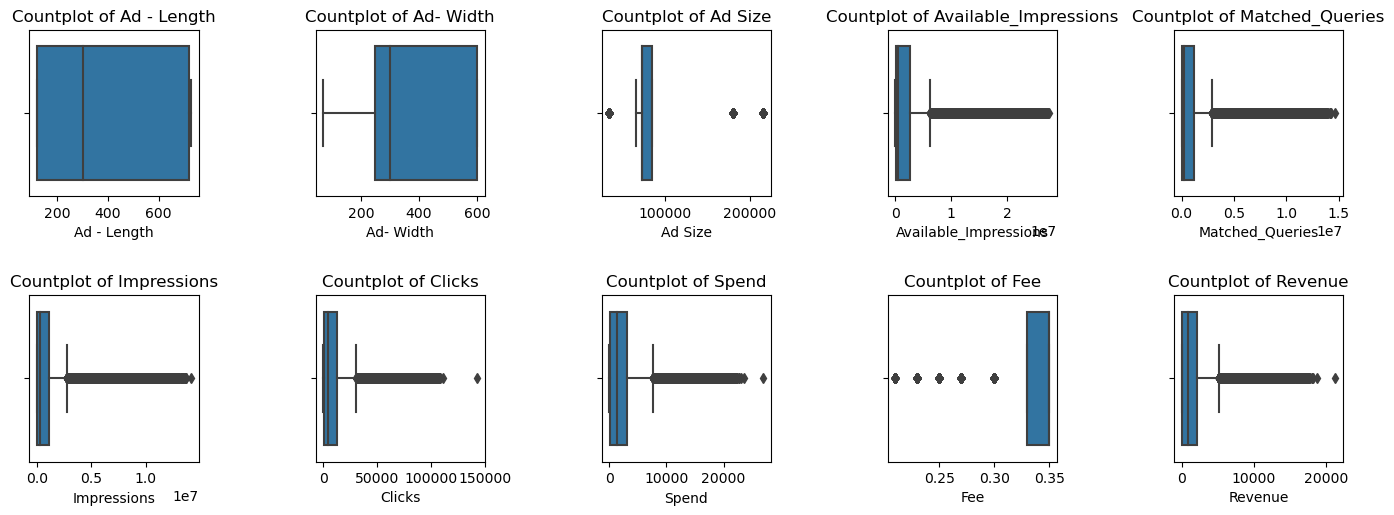

In [21]:
lst=['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC']
fig, ax = plt.subplots(2,5)
fig.set_size_inches(15,6)
fig.tight_layout(pad=5.0)
sns.boxplot(data=df_ad,x=lst[0],ax=ax[0][0]).set(title='Countplot of {}'.format(lst[0]))
sns.boxplot(data=df_ad,x=lst[1],ax=ax[0][1]).set(title='Countplot of {}'.format(lst[1]))       
sns.boxplot(data=df_ad,x=lst[2],ax=ax[0][2]).set(title='Countplot of {}'.format(lst[2]))
sns.boxplot(data=df_ad,x=lst[3],ax=ax[0][3]).set(title='Countplot of {}'.format(lst[3]))                 
sns.boxplot(data=df_ad,x=lst[4],ax=ax[0][4]).set(title='Countplot of {}'.format(lst[4]))            
sns.boxplot(data=df_ad,x=lst[5],ax=ax[1][0]).set(title='Countplot of {}'.format(lst[5]))     
sns.boxplot(data=df_ad,x=lst[6],ax=ax[1][1]).set(title='Countplot of {}'.format(lst[6]))
sns.boxplot(data=df_ad,x=lst[7],ax=ax[1][2]).set(title='Countplot of {}'.format(lst[7]))       
sns.boxplot(data=df_ad,x=lst[8],ax=ax[1][3]).set(title='Countplot of {}'.format(lst[8]))
sns.boxplot(data=df_ad,x=lst[9],ax=ax[1][4]).set(title='Countplot of {}'.format(lst[9]))                 

                
  



[Text(0.5, 1.0, 'Countplot of CPC')]

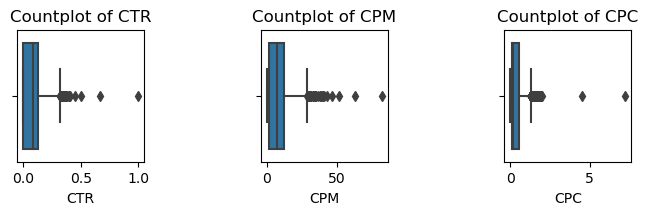

In [22]:
lst=['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC']
fig, ax = plt.subplots(1,3)
fig.set_size_inches(8,3)
fig.tight_layout(pad=5.0)
sns.boxplot(data=df_ad,x=lst[10],ax=ax[0]).set(title='Countplot of {}'.format(lst[10]))
sns.boxplot(data=df_ad,x=lst[11],ax=ax[1]).set(title='Countplot of {}'.format(lst[11]))       
sns.boxplot(data=df_ad,x=lst[12],ax=ax[2]).set(title='Countplot of {}'.format(lst[12]))
              


 ## <a name ='link2.1'>**Q2**</a><br>
Clustering: Treat missing values in CPC, CTR and CPM using the formula given.<br>


In [53]:
lst_numeric_columns=['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC']

Function to display the Boxplot, Displot and Summary

In [26]:
def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_ad_num[column].describe(),end=' ')
    
    
    plt.figure(figsize=(5,3))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_ad_num[column], kde=False, color='g');
    plt.xticks(rotation=90)
    plt.show()
    
    plt.figure(figsize=(5,3))
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_ad_num[column])
    plt.xticks(rotation=90)
    plt.show()

Function to Compute CTR, CPM and CPC

In [54]:
def CTR_null(c1,c2):
    CTR=(c1/c2)*100
    return CTR

# Using apply method


In [55]:
def CPM_null(c1,c2):
    CPM=c1/c2*1000
    return CPM


In [56]:
def CPC_null(c1,c2):
    CPC=c1/c2
    return CPC


In [38]:
df_ad[(df_ad['Spend']==0) & (df_ad['CPM']>0)]

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
5      2020-9-4-5       Format1          300        250    75000  Inter219   
8      2020-9-8-6       Format1          300        250    75000  Inter223   
20   2020-10-2-20       Format1          300        250    75000  Inter220   
31   2020-10-4-22       Format6          336        250    84000  Inter222   
34  2020-10-17-19       Format1          300        250    75000  Inter227   
36  2020-10-28-14       Format1          300        250    75000  Inter219   
47  2020-11-16-22       Format1          300        250    75000  Inter222   
52   2020-11-20-3       Format1          300        250    75000  Inter218   

   Platform Device Type   Format  Available_Impressions  Matched_Queries  \
5     Video     Desktop  Display                    490               64   
8       Web      Mobile    Video                   1402              137   
20      Web      Mobile  Display                   2203              345   
31    Video     Desktop  Display                   1804              352   
34      App      Mobile    Video                   1358              214   
36    Video     Desktop  Display                   1428              211   
47    Video     Desktop    Video                   1704              215   
52      App      Mobile  Display                    391               96   

    Impressions  Clicks  Spend   Fee  Revenue       CTR   CPM  CPC  
5            64       2    0.0  0.35      0.0  3.125000  0.01  0.0  
8           136       1    0.0  0.35      0.0  0.735294  0.02  0.0  
20          343       1    0.0  0.35      0.0  0.291545  0.01  0.0  
31          343       1    0.0  0.35      0.0  0.291545  0.01  0.0  
34          209       1    0.0  0.35      0.0  0.478469  0.01  0.0  
36          208       1    0.0  0.35      0.0  0.480769  0.01  0.0  
47          212       1    0.0  0.35      0.0  0.471698  0.01  0.0  
52           91       1    0.0  0.35      0.0  1.098901  0.01  0.0

###### Impute the Missing values

In [57]:
df_ad['CTR']= df_ad.apply(lambda x: CTR_null(x['Clicks'], x['Impressions']),axis=1)
df_ad['CPM']= df_ad.apply(lambda x: CPM_null(x['Spend'], x['Impressions']),axis=1)
df_ad['CPC']= df_ad.apply(lambda x: CPC_null(x['Spend'], x['Clicks']),axis=1)

Checking Null Values after Imputing 

In [58]:
df_ad[['CTR','CPM','CPC']].isnull().sum()

CTR    0
CPM    0
CPC    0
dtype: int64

Checking data Summary after Imputing

In [79]:
df_ad.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.000000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.000000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.000000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.000000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.000000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.000000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.210000   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.000000   
CTR                    23066.0  8.409941e+00  9.262048e+00      0.010874   
CPM                    23066.0  8.396849e+00  9.057760e+00      0.000000   
CPC                    23066.0  3.366776e-01  3.412527e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  2.160000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  2.759286e+07  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  1.470202e+07  
Impressions             7990.500000  225290.000000  1.112428e+06  1.419477e+07  
Clicks                   710.000000    4425.000000  1.279375e+04  1.430490e+05  
Spend                     85.180000    1425.125000  3.121400e+03  2.693187e+04  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  2.127618e+04  
CTR                        0.265107       9.391248  1.347057e+01  2.000000e+02  
CPM                        1.749084       8.371566  1.304202e+01  7.150000e+02  
CPC                        0.089736       0.139347  5.462421e-01  7.264000e+00

Checking dataset after Imputing

In [80]:
df_ad

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue         CTR   CPM   CPC  
0              323       1   0.00  0.35   0.0000    0.309598   0.0  0.00  
1              285       1   0.00  0.35   0.0000    0.350877   0.0  0.00  
2              355       1   0.00  0.35   0.0000    0.281690   0.0  0.00  
3              495       1   0.00  0.35   0.0000    0.202020   0.0  0.00  
4              242       1   0.00  0.35   0.0000    0.413223   0.0  0.00  
...            ...     ...    ...   ...      ...         ...   ...   ...  
23061            1       1   0.07  0.35   0.0455  100.000000  70.0  0.07  
23062            2       1   0.04  0.35   0.0260   50.000000  20.0  0.04  
23063            1       1   0.05  0.35   0.0325  100.000000  50.0  0.05  
23064            1       1   0.07  0.35   0.0455  100.000000  70.0  0.07  
23065            2       1   0.09  0.35   0.0585   50.000000  45.0  0.09  

[23066 rows x 19 columns]

Creating new DatFrame with Numerical Columns

In [59]:
df_ad_num=df_ad.select_dtypes(['int','float'])

Unvariate analysis of Numerical Columns

Description of Ad - Length
----------------------------------------------------------------------------
count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64 Distribution of Ad - Length
----------------------------------------------------------------------------


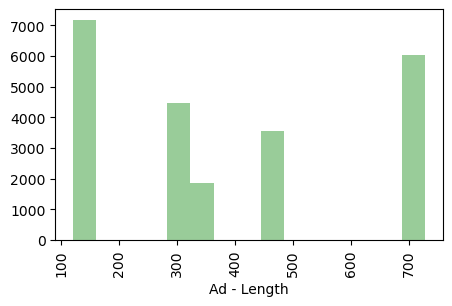

BoxPlot of Ad - Length
----------------------------------------------------------------------------


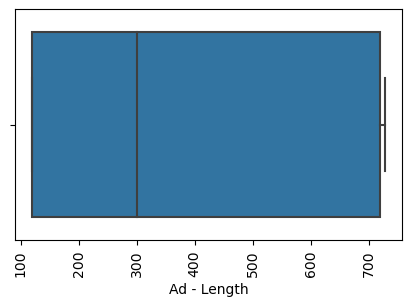

Description of Ad- Width
----------------------------------------------------------------------------
count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64 Distribution of Ad- Width
----------------------------------------------------------------------------


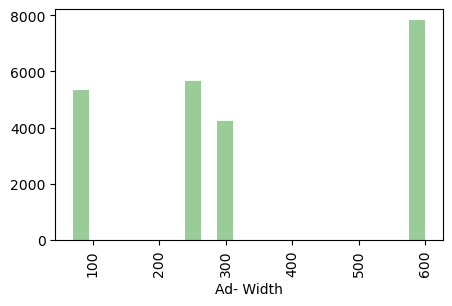

BoxPlot of Ad- Width
----------------------------------------------------------------------------


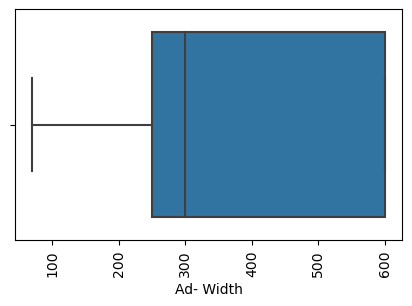

Description of Ad Size
----------------------------------------------------------------------------
count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64 Distribution of Ad Size
----------------------------------------------------------------------------


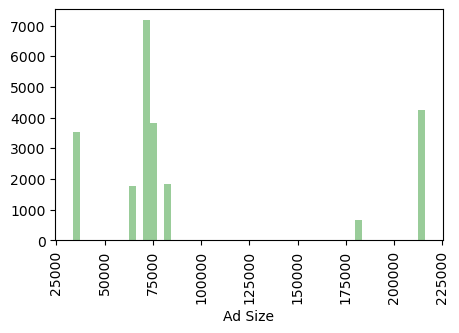

BoxPlot of Ad Size
----------------------------------------------------------------------------


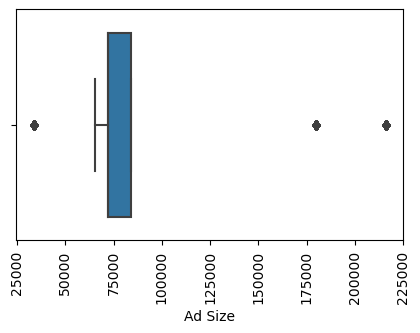

Description of Available_Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64 Distribution of Available_Impressions
----------------------------------------------------------------------------


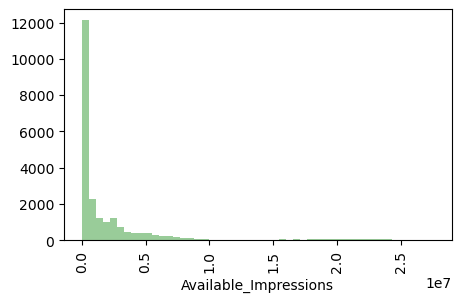

BoxPlot of Available_Impressions
----------------------------------------------------------------------------


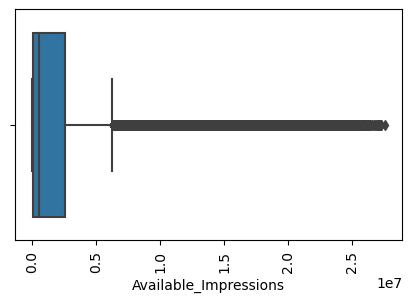

Description of Matched_Queries
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64 Distribution of Matched_Queries
----------------------------------------------------------------------------


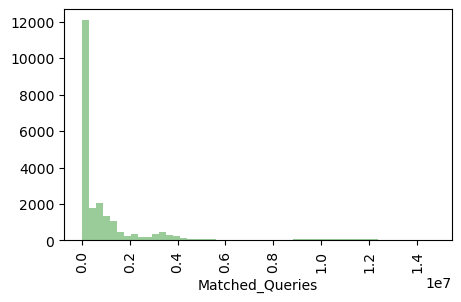

BoxPlot of Matched_Queries
----------------------------------------------------------------------------


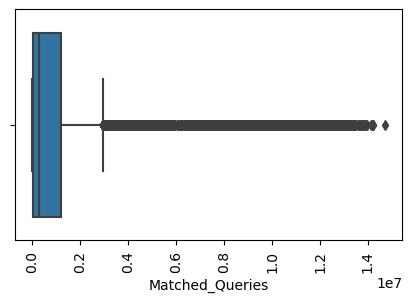

Description of Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64 Distribution of Impressions
----------------------------------------------------------------------------


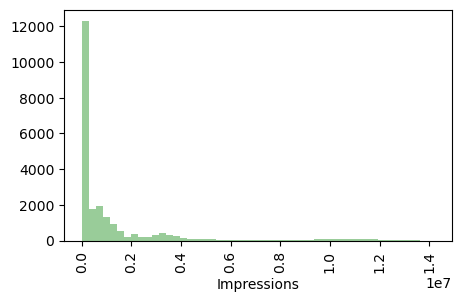

BoxPlot of Impressions
----------------------------------------------------------------------------


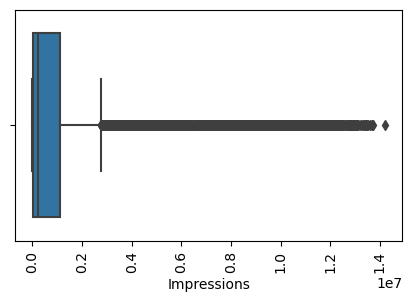

Description of Clicks
----------------------------------------------------------------------------
count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64 Distribution of Clicks
----------------------------------------------------------------------------


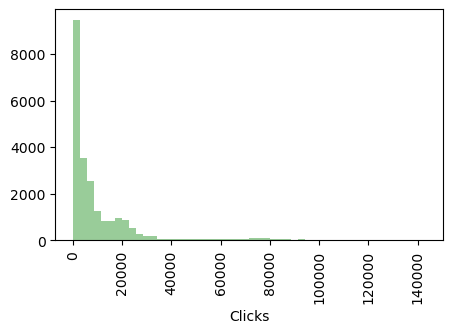

BoxPlot of Clicks
----------------------------------------------------------------------------


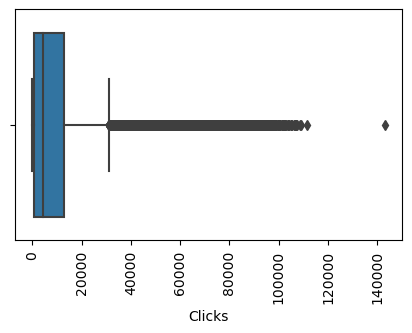

Description of Spend
----------------------------------------------------------------------------
count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64 Distribution of Spend
----------------------------------------------------------------------------


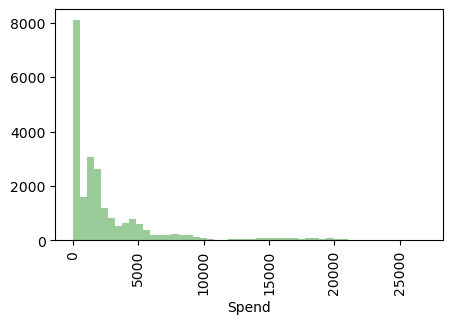

BoxPlot of Spend
----------------------------------------------------------------------------


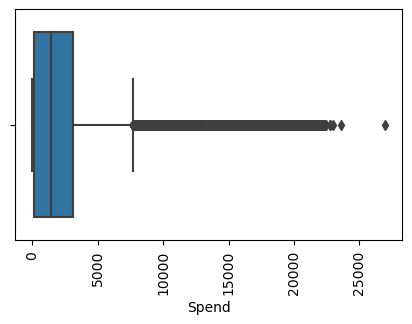

Description of Fee
----------------------------------------------------------------------------
count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64 Distribution of Fee
----------------------------------------------------------------------------


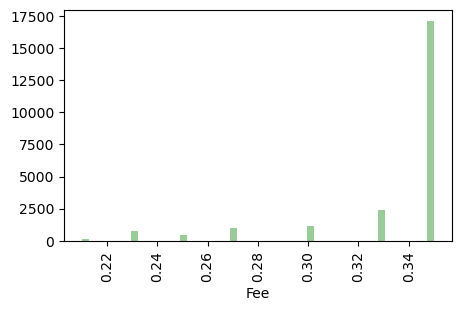

BoxPlot of Fee
----------------------------------------------------------------------------


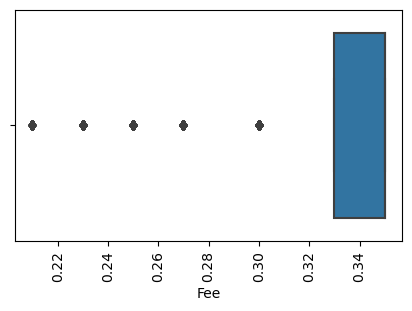

Description of Revenue
----------------------------------------------------------------------------
count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64 Distribution of Revenue
----------------------------------------------------------------------------


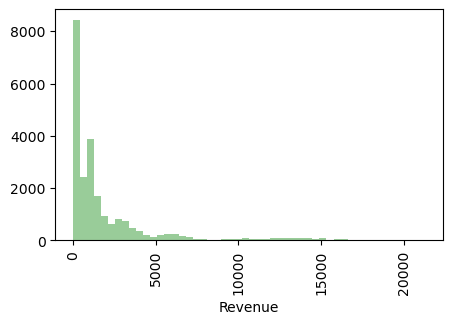

BoxPlot of Revenue
----------------------------------------------------------------------------


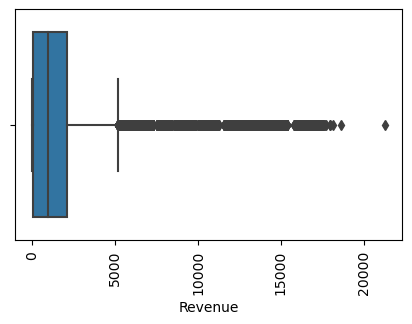

Description of CTR
----------------------------------------------------------------------------
count    23066.000000
mean         8.409941
std          9.262048
min          0.010874
25%          0.265107
50%          9.391248
75%         13.470571
max        200.000000
Name: CTR, dtype: float64 Distribution of CTR
----------------------------------------------------------------------------


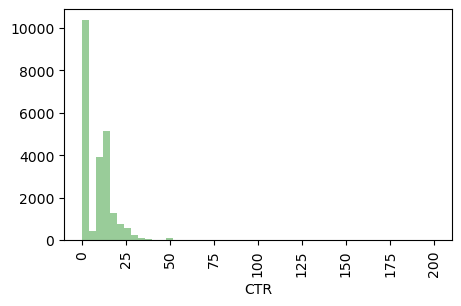

BoxPlot of CTR
----------------------------------------------------------------------------


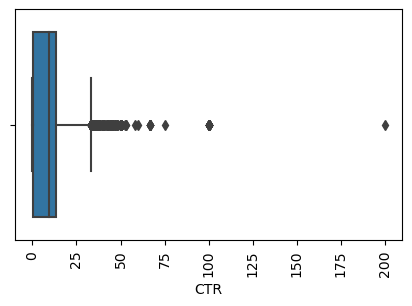

Description of CPM
----------------------------------------------------------------------------
count    23066.000000
mean         8.396730
std          9.057082
min          0.000000
25%          1.750000
50%          8.370742
75%         13.040000
max        715.000000
Name: CPM, dtype: float64 Distribution of CPM
----------------------------------------------------------------------------


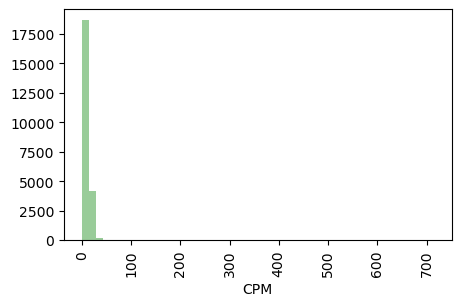

BoxPlot of CPM
----------------------------------------------------------------------------


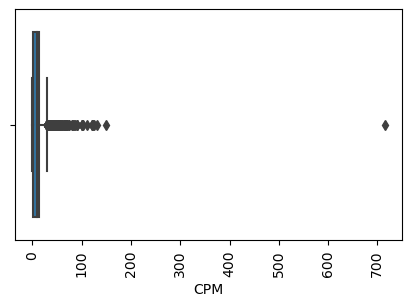

Description of CPC
----------------------------------------------------------------------------
count    23066.000000
mean         0.336652
std          0.341231
min          0.000000
25%          0.090000
50%          0.140000
75%          0.550000
max          7.260000
Name: CPC, dtype: float64 Distribution of CPC
----------------------------------------------------------------------------


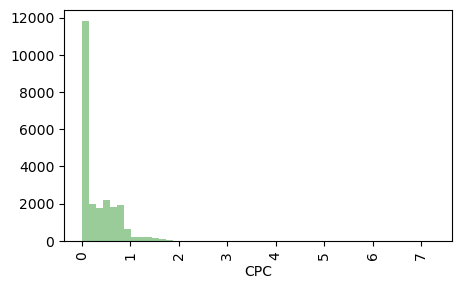

BoxPlot of CPC
----------------------------------------------------------------------------


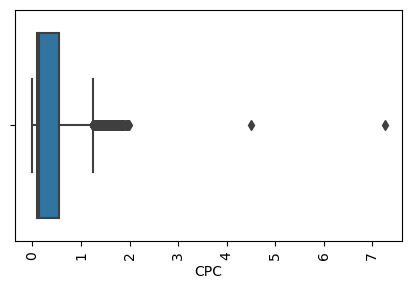

In [363]:
for x in lst_numeric_columns:
    univariateAnalysis_numeric(x)

In [60]:
lstnumericcolumns=df_ad_num.columns
lstnumericcolumns

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

## <a name ='link3.1'>**Q3**</a><br>
Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).<br>


###### Treating Outliers

In [61]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [62]:
outlier_list=['Ad Size','Available_Impressions','Matched_Queries','Impressions','Clicks','Spend','Fee','Revenue','CTR' ,'CPC','CPM' ]

In [63]:
for i in df_ad_num[outlier_list]:    
    df_ad_num[i]=treat_outlier(df_ad_num[i])

Plotting after Treating Outliers

[Text(0.5, 1.0, 'Countplot of Revenue')]

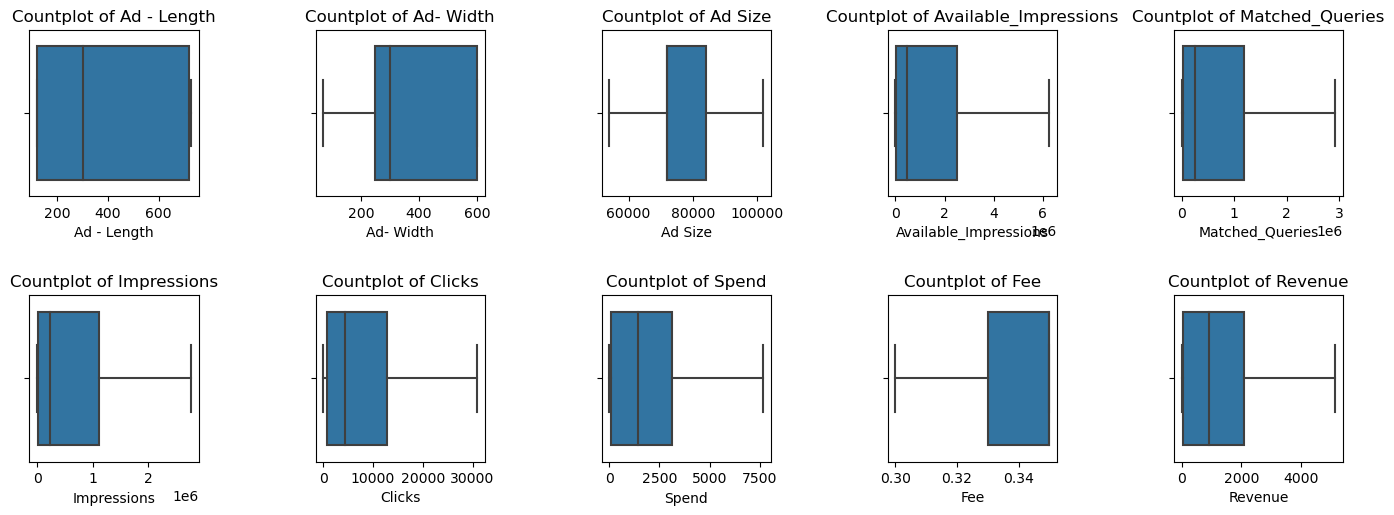

In [206]:
lst=['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC']
fig, ax = plt.subplots(2,5)
fig.set_size_inches(15,6)
fig.tight_layout(pad=5.0)
sns.boxplot(data=df_ad_num,x=lst[0],ax=ax[0][0]).set(title='Countplot of {}'.format(lst[0]))
sns.boxplot(data=df_ad_num,x=lst[1],ax=ax[0][1]).set(title='Countplot of {}'.format(lst[1]))       
sns.boxplot(data=df_ad_num,x=lst[2],ax=ax[0][2]).set(title='Countplot of {}'.format(lst[2]))
sns.boxplot(data=df_ad_num,x=lst[3],ax=ax[0][3]).set(title='Countplot of {}'.format(lst[3]))                 
sns.boxplot(data=df_ad_num,x=lst[4],ax=ax[0][4]).set(title='Countplot of {}'.format(lst[4]))            
sns.boxplot(data=df_ad_num,x=lst[5],ax=ax[1][0]).set(title='Countplot of {}'.format(lst[5]))     
sns.boxplot(data=df_ad_num,x=lst[6],ax=ax[1][1]).set(title='Countplot of {}'.format(lst[6]))
sns.boxplot(data=df_ad_num,x=lst[7],ax=ax[1][2]).set(title='Countplot of {}'.format(lst[7]))       
sns.boxplot(data=df_ad_num,x=lst[8],ax=ax[1][3]).set(title='Countplot of {}'.format(lst[8]))
sns.boxplot(data=df_ad_num,x=lst[9],ax=ax[1][4]).set(title='Countplot of {}'.format(lst[9]))                 


[Text(0.5, 1.0, 'Countplot of CPC')]

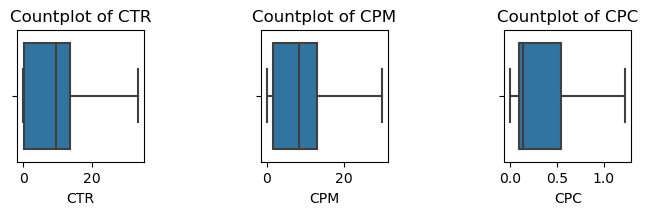

In [207]:
lst=['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC']
fig, ax = plt.subplots(1,3)
fig.set_size_inches(8,3)
fig.tight_layout(pad=5.0)
sns.boxplot(data=df_ad_num,x=lst[10],ax=ax[0]).set(title='Countplot of {}'.format(lst[10]))
sns.boxplot(data=df_ad_num,x=lst[11],ax=ax[1]).set(title='Countplot of {}'.format(lst[11]))       
sns.boxplot(data=df_ad_num,x=lst[12],ax=ax[2]).set(title='Countplot of {}'.format(lst[12]))
              

Description of Ad - Length
----------------------------------------------------------------------------
count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64 Distribution of Ad - Length
----------------------------------------------------------------------------


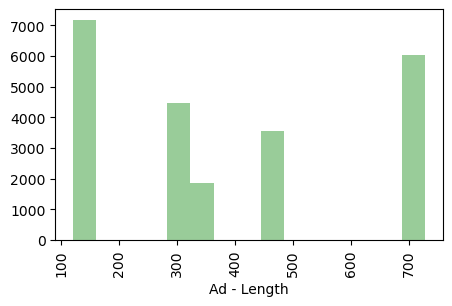

BoxPlot of Ad - Length
----------------------------------------------------------------------------


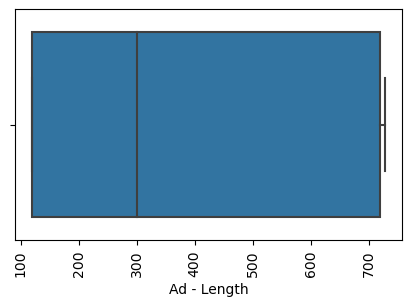

Description of Ad- Width
----------------------------------------------------------------------------
count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64 Distribution of Ad- Width
----------------------------------------------------------------------------


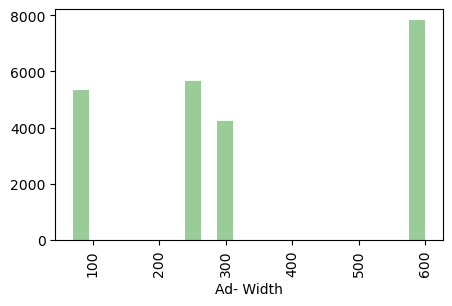

BoxPlot of Ad- Width
----------------------------------------------------------------------------


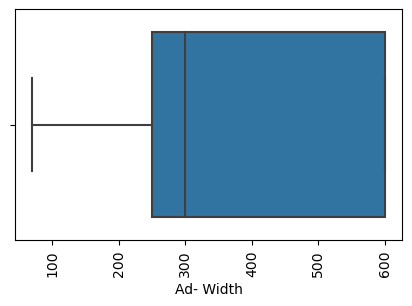

Description of Ad Size
----------------------------------------------------------------------------
count     23066.000000
mean      76576.835169
std       15381.320695
min       54000.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      102000.000000
Name: Ad Size, dtype: float64 Distribution of Ad Size
----------------------------------------------------------------------------


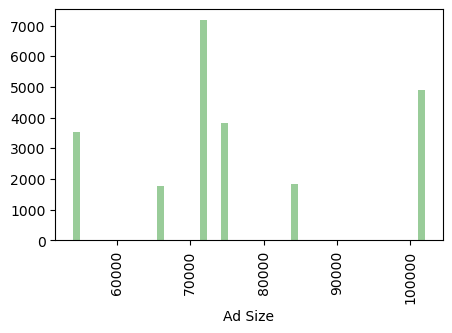

BoxPlot of Ad Size
----------------------------------------------------------------------------


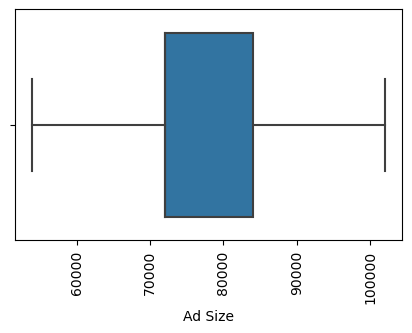

Description of Available_Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.607253e+06
std      2.125528e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      6.268771e+06
Name: Available_Impressions, dtype: float64 Distribution of Available_Impressions
----------------------------------------------------------------------------


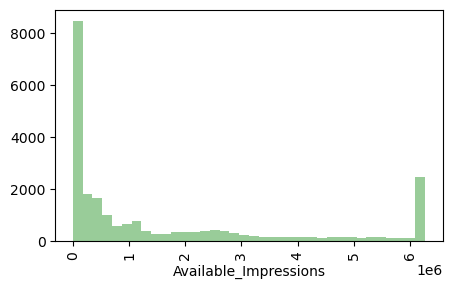

BoxPlot of Available_Impressions
----------------------------------------------------------------------------


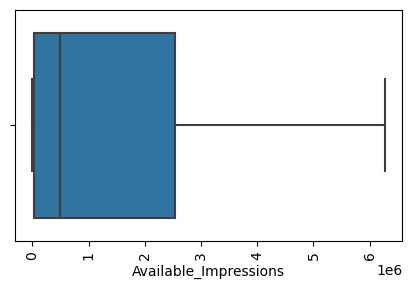

Description of Matched_Queries
----------------------------------------------------------------------------
count    2.306600e+04
mean     7.995380e+05
std      1.026037e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      2.924326e+06
Name: Matched_Queries, dtype: float64 Distribution of Matched_Queries
----------------------------------------------------------------------------


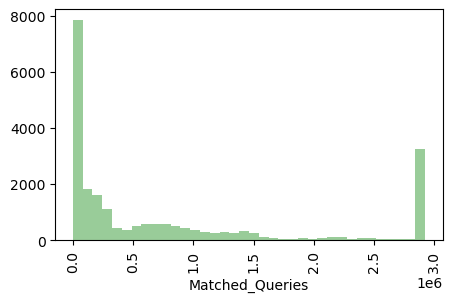

BoxPlot of Matched_Queries
----------------------------------------------------------------------------


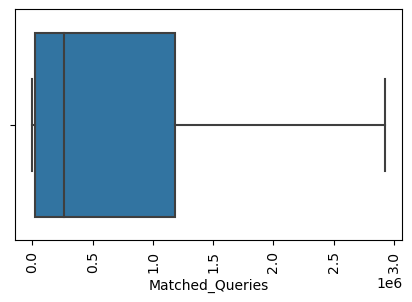

Description of Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     7.536120e+05
std      9.802568e+05
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      2.769086e+06
Name: Impressions, dtype: float64 Distribution of Impressions
----------------------------------------------------------------------------


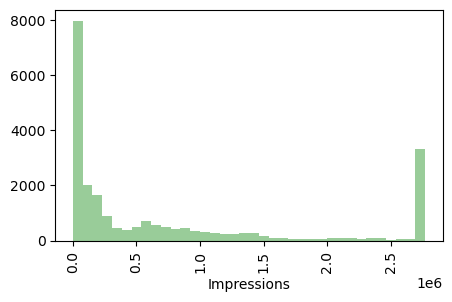

BoxPlot of Impressions
----------------------------------------------------------------------------


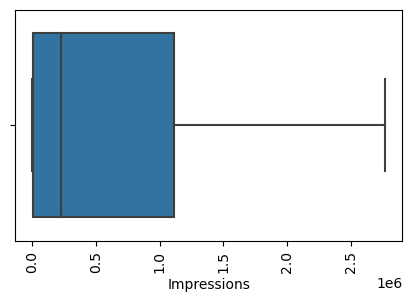

Description of Clicks
----------------------------------------------------------------------------
count    23066.000000
mean      8306.828194
std       9574.779384
min          1.000000
25%        710.000000
50%       4425.000000
75%      12793.750000
max      30919.375000
Name: Clicks, dtype: float64 Distribution of Clicks
----------------------------------------------------------------------------


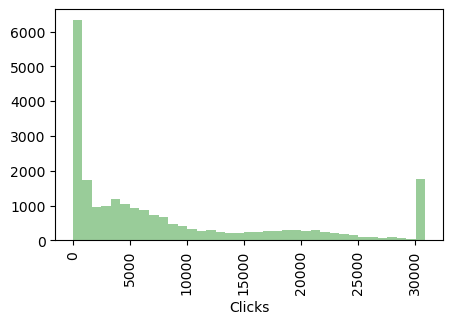

BoxPlot of Clicks
----------------------------------------------------------------------------


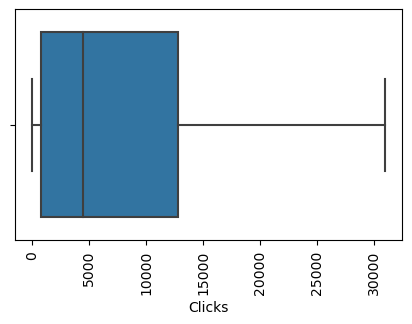

Description of Spend
----------------------------------------------------------------------------
count    23066.000000
mean      2166.060098
std       2425.189632
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max       7675.730000
Name: Spend, dtype: float64 Distribution of Spend
----------------------------------------------------------------------------


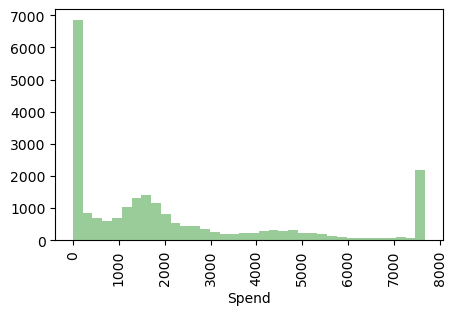

BoxPlot of Spend
----------------------------------------------------------------------------


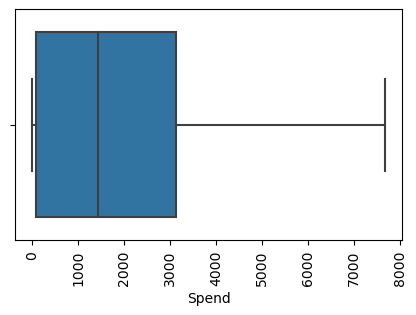

Description of Fee
----------------------------------------------------------------------------
count    23066.000000
mean         0.340288
std          0.018129
min          0.300000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64 Distribution of Fee
----------------------------------------------------------------------------


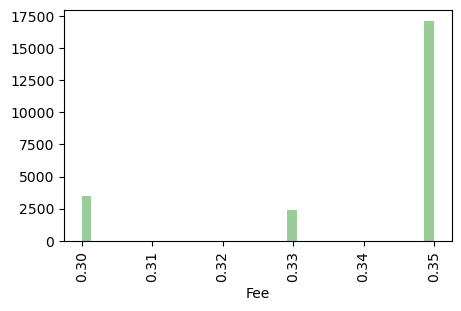

BoxPlot of Fee
----------------------------------------------------------------------------


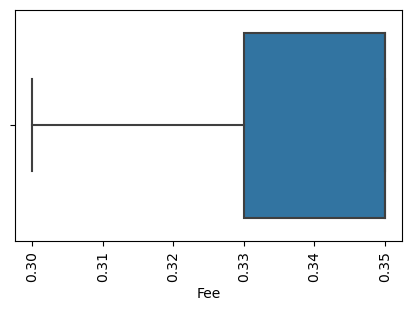

Description of Revenue
----------------------------------------------------------------------------
count    23066.000000
mean      1449.388572
std       1646.893583
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max       5145.297312
Name: Revenue, dtype: float64 Distribution of Revenue
----------------------------------------------------------------------------


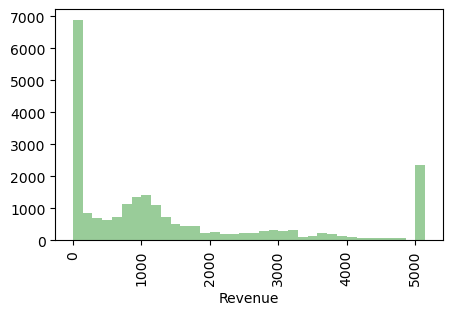

BoxPlot of Revenue
----------------------------------------------------------------------------


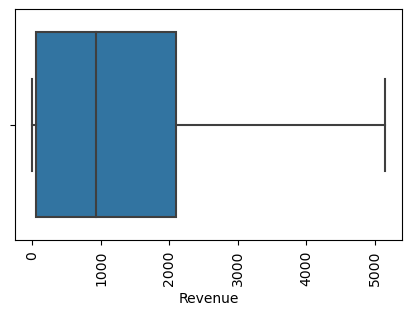

Description of CTR
----------------------------------------------------------------------------
count    23066.000000
mean         8.223203
std          8.253522
min          0.010874
25%          0.265107
50%          9.391248
75%         13.470571
max         33.278766
Name: CTR, dtype: float64 Distribution of CTR
----------------------------------------------------------------------------


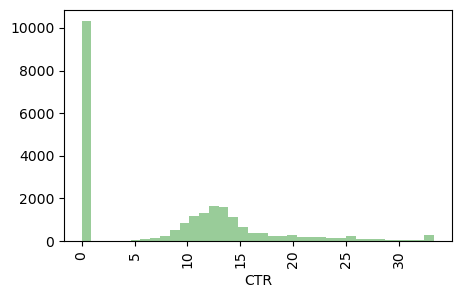

BoxPlot of CTR
----------------------------------------------------------------------------


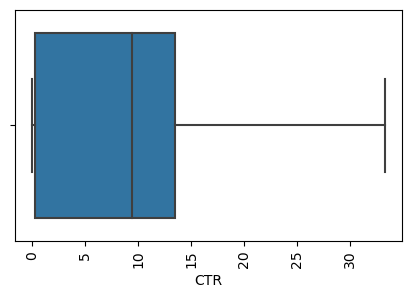

Description of CPM
----------------------------------------------------------------------------
count    23066.000000
mean         8.219181
std          6.881016
min          0.000000
25%          1.749084
50%          8.371566
75%         13.042018
max         29.981418
Name: CPM, dtype: float64 Distribution of CPM
----------------------------------------------------------------------------


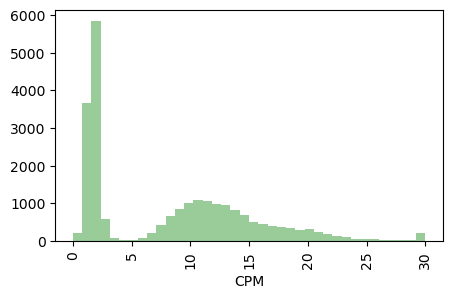

BoxPlot of CPM
----------------------------------------------------------------------------


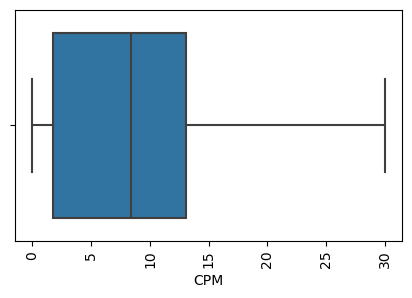

Description of CPC
----------------------------------------------------------------------------
count    23066.000000
mean         0.330035
std          0.316568
min          0.000000
25%          0.089736
50%          0.139347
75%          0.546242
max          1.231002
Name: CPC, dtype: float64 Distribution of CPC
----------------------------------------------------------------------------


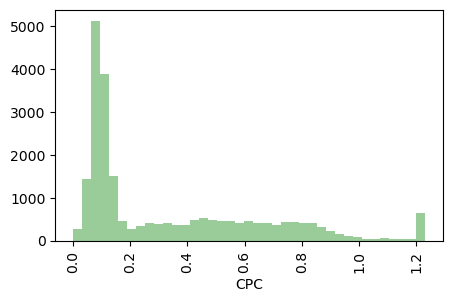

BoxPlot of CPC
----------------------------------------------------------------------------


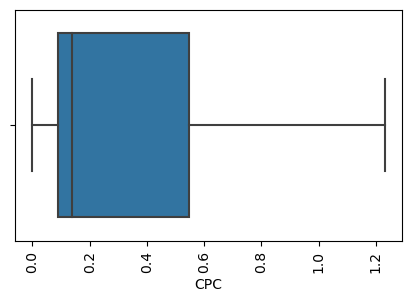

In [402]:
for x in lst_numeric_columns:
    univariateAnalysis_numeric(x)

In [205]:
df_ad_num.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  7.657684e+04  1.538132e+04  54000.000000   
Available_Impressions  23066.0  1.607253e+06  2.125528e+06      1.000000   
Matched_Queries        23066.0  7.995380e+05  1.026037e+06      1.000000   
Impressions            23066.0  7.536120e+05  9.802568e+05      1.000000   
Clicks                 23066.0  8.306828e+03  9.574779e+03      1.000000   
Spend                  23066.0  2.166060e+03  2.425190e+03      0.000000   
Fee                    23066.0  3.402883e-01  1.812855e-02      0.300000   
Revenue                23066.0  1.449389e+03  1.646894e+03      0.000000   
CTR                    23066.0  8.223203e+00  8.253522e+00      0.010874   
CPM                    23066.0  8.219181e+00  6.881016e+00      0.000000   
CPC                    23066.0  3.300346e-01  3.165682e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  1.020000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  6.268771e+06  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  2.924326e+06  
Impressions             7990.500000  225290.000000  1.112428e+06  2.769086e+06  
Clicks                   710.000000    4425.000000  1.279375e+04  3.091938e+04  
Spend                     85.180000    1425.125000  3.121400e+03  7.675730e+03  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  5.145297e+03  
CTR                        0.265107       9.391248  1.347057e+01  3.327877e+01  
CPM                        1.749084       8.371566  1.304202e+01  2.998142e+01  
CPC                        0.089736       0.139347  5.462421e-01  1.231002e+00

## <a name ='link4.1'>**Q4**</a><br>
Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.<br>


Scaling using Z score Method

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(df_ad_num)
scaled_data = model.transform(df_ad_num)
scaled_data

array([[-0.3644957 , -0.43279676, -0.10251846, ..., -0.95883633,
        -1.19449791, -1.04256138],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.95383476,
        -1.19449791, -1.04256138],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.96221767,
        -1.19449791, -1.04256138],
       ...,
       [ 1.43309269, -0.18659865,  1.65289551, ...,  3.03580766,
         3.16271759, -0.88461411],
       [-1.13489073,  1.29058999, -0.29756446, ...,  3.03580766,
         3.16271759, -0.82143521],
       [ 1.43309269, -0.18659865,  1.65289551, ...,  3.03580766,
         3.16271759, -0.7582563 ]])

In [65]:
import scipy.stats as stats

df_ad_num_scaled = stats.zscore(df_ad_num)


In [140]:
df_ad_num_scaled

Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
0        -0.364496  -0.432797 -0.102518              -0.755333   
1        -0.364496  -0.432797 -0.102518              -0.755345   
2        -0.364496  -0.432797 -0.102518              -0.754900   
3        -0.364496  -0.432797 -0.102518              -0.755040   
4        -0.364496  -0.432797 -0.102518              -0.755610   
...            ...        ...       ...                    ...   
23061     1.433093  -0.186599  1.652896              -0.756182   
23062     1.433093  -0.186599  1.652896              -0.756181   
23063     1.433093  -0.186599  1.652896              -0.756182   
23064    -1.134891   1.290590 -0.297564              -0.756179   
23065     1.433093  -0.186599  1.652896              -0.756182   

       Matched_Queries  Impressions    Clicks     Spend       Fee   Revenue  \
0            -0.778949    -0.768478 -0.867488 -0.893170  0.535724 -0.880093   
1            -0.778988    -0.768516 -0.867488 -0.893170  0.535724 -0.880093   
2            -0.778919    -0.768445 -0.867488 -0.893170  0.535724 -0.880093   
3            -0.778781    -0.768302 -0.867488 -0.893170  0.535724 -0.880093   
4            -0.779030    -0.768560 -0.867488 -0.893170  0.535724 -0.880093   
...                ...          ...       ...       ...       ...       ...   
23061        -0.779265    -0.768806 -0.867488 -0.893141  0.535724 -0.880066   
23062        -0.779264    -0.768805 -0.867488 -0.893154  0.535724 -0.880078   
23063        -0.779265    -0.768806 -0.867488 -0.893150  0.535724 -0.880074   
23064        -0.779265    -0.768806 -0.867488 -0.893141  0.535724 -0.880066   
23065        -0.779264    -0.768805 -0.867488 -0.893133  0.535724 -0.880058   

            CTR       CPM       CPC  
0     -0.958836 -1.194498 -1.042561  
1     -0.953835 -1.194498 -1.042561  
2     -0.962218 -1.194498 -1.042561  
3     -0.971871 -1.194498 -1.042561  
4     -0.946281 -1.194498 -1.042561  
...         ...       ...       ...  
23061  3.035808  3.162718 -0.821435  
23062  3.035808  1.712113 -0.916204  
23063  3.035808  3.162718 -0.884614  
23064  3.035808  3.162718 -0.821435  
23065  3.035808  3.162718 -0.758256  

[23066 rows x 13 columns]

Data Summary after Scaling

In [209]:
df_ad_num_scaled.describe().T

count          mean       std       min       25%  \
Ad - Length            23066.0 -4.030447e-15  1.000022 -1.134891 -1.134891   
Ad- Width              23066.0  5.390161e-15  1.000022 -1.319110 -0.432797   
Ad Size                23066.0 -4.156304e-15  1.000022 -1.467840 -0.297564   
Available_Impressions  23066.0 -3.617510e-15  1.000022 -0.756182 -0.740341   
Matched_Queries        23066.0  1.341008e-15  1.000022 -0.779265 -0.761447   
Impressions            23066.0 -1.224345e-15  1.000022 -0.768806 -0.760655   
Clicks                 23066.0  1.960656e-15  1.000022 -0.867488 -0.793438   
Spend                  23066.0  1.250852e-15  1.000022 -0.893170 -0.858046   
Fee                    23066.0 -2.322121e-14  1.000022 -2.222416 -0.567532   
Revenue                23066.0  3.136228e-15  1.000022 -0.880093 -0.846474   
CTR                    23066.0  1.329072e-15  1.000022 -0.995031 -0.964227   
CPM                    23066.0  5.791296e-17  1.000022 -1.194498 -0.940303   
CPC                    23066.0  1.987283e-15  1.000022 -1.042561 -0.759091   

                            50%       75%       max  
Ad - Length           -0.364496  1.433093  1.467332  
Ad- Width             -0.186599  1.290590  1.290590  
Ad Size               -0.297564  0.482620  1.652896  
Available_Impressions -0.528577  0.433059  2.193158  
Matched_Queries       -0.527722  0.371498  2.070914  
Impressions           -0.538975  0.366051  2.056111  
Clicks                -0.405431  0.468629  2.361729  
Spend                 -0.305523  0.393932  2.271900  
Fee                    0.535724  0.535724  0.535724  
Revenue               -0.317607  0.389803  2.244218  
CTR                    0.141524  0.635787  3.035808  
CPM                    0.022146  0.700905  3.162718  
CPC                   -0.602371  0.682987  2.846105

## <a name ='link5.1'>**Q5**</a><br>
Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.<br>

In [69]:
from scipy.cluster.hierarchy import dendrogram,linkage

Hierarchical by constructing a Dendrogram  using WARD and Euclidean distance.

In [70]:
euclidean=linkage(df_ad_num_scaled,method='ward',metric='euclidean')

Hierarchical by constructing a Dendrogram using WARD and Euclidean distance last 10 clusters

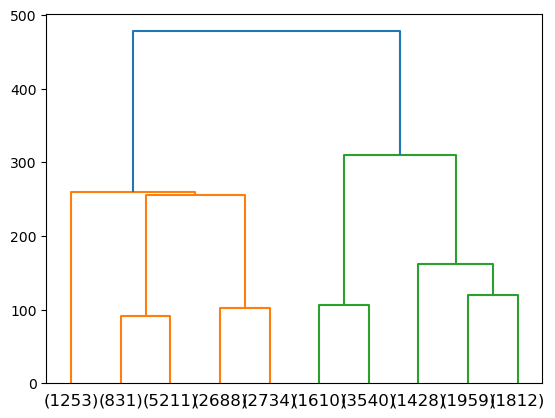

In [526]:
dend=dendrogram(euclidean,truncate_mode='lastp',p=10)

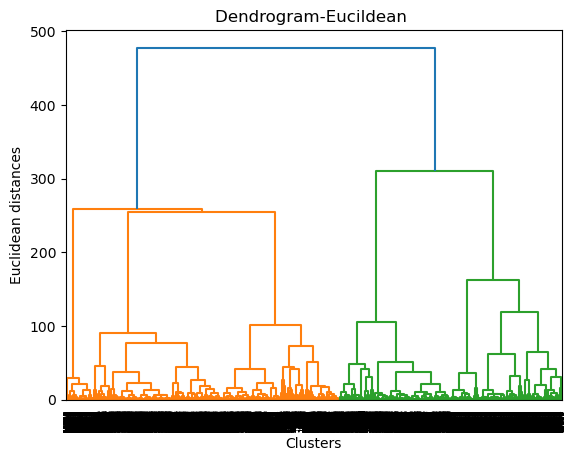

In [212]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df_ad_num_scaled,method="ward",metric='euclidean'))
plt.title('Dendrogram-Eucildean ')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.show()


Hierarchical by constructing a Dendrogram using WARD 

In [91]:
wardlink = linkage(df_ad_num_scaled, method = 'ward')

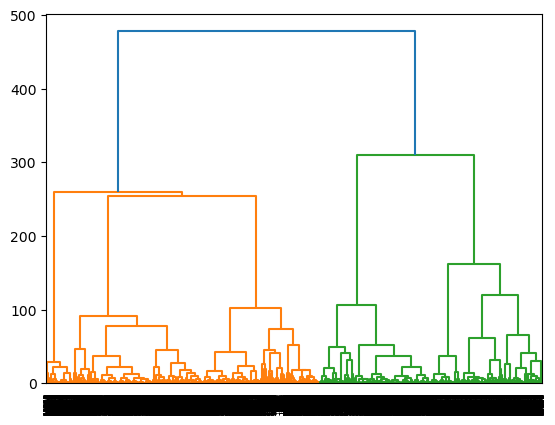

In [427]:
dend = dendrogram(wardlink)

## <a name ='link6.1'>**Q6**</a><br>
Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.<br>


In [71]:
from sklearn.cluster import KMeans

In [72]:
k_means = KMeans(n_clusters = 5,random_state=123)
k_means.fit(df_ad_num_scaled)
labels=k_means.labels_

In [74]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_ad_num_scaled)
    wss.append(KM.inertia_)

WSS scores

In [75]:
wss

[299858.0000000002,
 183349.1020288608,
 130878.34788742862,
 95133.96026712848,
 61539.18919785385,
 51676.892307099595,
 44598.26211613913,
 39597.84594043494,
 36348.93700091225,
 32980.936659585495]

Elbow Plot

Text(0.5, 1.0, 'K Value Vs WSS')

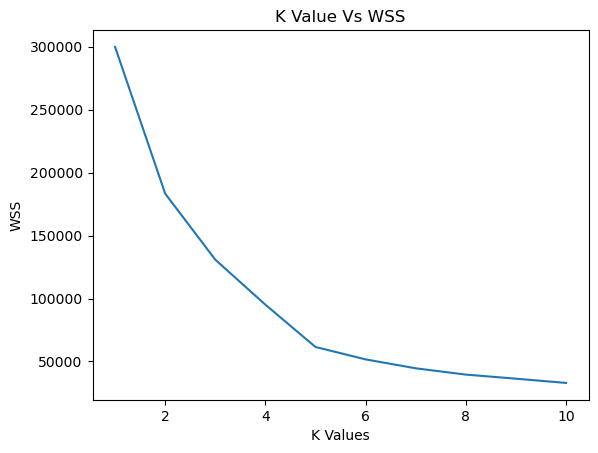

In [76]:
plt.plot(range(1,11), wss);
plt.xlabel('K Values')
plt.ylabel('WSS')
plt.title('K Value Vs WSS')

## <a name ='link7.1'>**Q7**</a><br>
Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.<br>


In [77]:
from sklearn.metrics import silhouette_samples, silhouette_score

Finding Silhouette Score

In [79]:
from sklearn.metrics import silhouette_samples, silhouette_score
ss={}
for i in range(2,11):
    k_means=KMeans(n_clusters=i,random_state=42)
    k_means.fit(df_ad_num_scaled)
    y=k_means.labels_
    s=silhouette_score(df_ad_num_scaled,y)
    ss[i]=round(s,5)
    print("The Average Silhouette Score for {}clusters is {}".format(i,round(s,5)))



The Average Silhouette Score for 2clusters is 0.38573
The Average Silhouette Score for 3clusters is 0.38255
The Average Silhouette Score for 4clusters is 0.44534
The Average Silhouette Score for 5clusters is 0.5241
The Average Silhouette Score for 6clusters is 0.52215
The Average Silhouette Score for 7clusters is 0.51656
The Average Silhouette Score for 8clusters is 0.47975
The Average Silhouette Score for 9clusters is 0.43187
The Average Silhouette Score for 10clusters is 0.44463


In [420]:
ss

{2: 0.38573,
 3: 0.38255,
 4: 0.44534,
 5: 0.5241,
 6: 0.52215,
 7: 0.51656,
 8: 0.47975,
 9: 0.43187,
 10: 0.44463}

Plotting  Silhouette Score

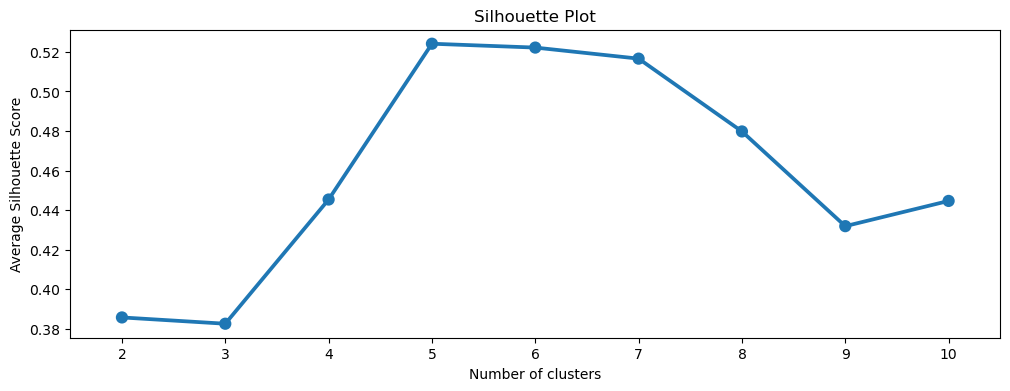

In [87]:
fig,ax =plt.subplots(figsize=(12,4))
sns.pointplot(list(ss.keys()),list(ss.values()))
ax.set_title('Silhouette Plot')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Average Silhouette Score')
plt.show()


In [92]:
from scipy.cluster.hierarchy import fcluster
Clus_kmeans = fcluster(wardlink, 5, criterion='maxclust')
Clus_kmeans

array([4, 4, 4, ..., 3, 2, 3], dtype=int32)

## <a name ='link8.1'>**Q8**</a><br>
Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].<br>


Assinging Cluster Names to the  Data

In [93]:

df_ad['Clus_kmeans'] = Clus_kmeans
df_ad

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue         CTR   CPM   CPC  \
0              323       1   0.00  0.35   0.0000    0.309598   0.0  0.00   
1              285       1   0.00  0.35   0.0000    0.350877   0.0  0.00   
2              355       1   0.00  0.35   0.0000    0.281690   0.0  0.00   
3              495       1   0.00  0.35   0.0000    0.202020   0.0  0.00   
4              242       1   0.00  0.35   0.0000    0.413223   0.0  0.00   
...            ...     ...    ...   ...      ...         ...   ...   ...   
23061            1       1   0.07  0.35   0.0455  100.000000  70.0  0.07   
23062            2       1   0.04  0.35   0.0260   50.000000  20.0  0.04   
23063            1       1   0.05  0.35   0.0325  100.000000  50.0  0.05   
23064            1       1   0.07  0.35   0.0455  100.000000  70.0  0.07   
23065            2       1   0.09  0.35   0.0585   50.000000  45.0  0.09   

       Clus_kmeans  
0                4  
1                4  
2                4  
3                4  
4                4  
...            ...  
23061            3  
23062            3  
23063            3  
23064            2  
23065            3  

[23066 rows x 20 columns]

Ad profiling by creating Groups

In [114]:
df_ad.groupby(['Clus_kmeans','Device Type'])['Clicks','Spend','Revenue','CPM','CTR','CPC'].mean()

Clicks        Spend      Revenue        CPM  \
Clus_kmeans Device Type                                                      
1           Desktop      71686.146930  7602.611009  5498.218435  15.157941   
            Mobile       71481.951066  7670.540928  5552.094863  15.248525   
2           Desktop       3443.119147   380.899573   251.033256  14.679239   
            Mobile        3534.177864   385.896597   254.378293  14.978210   
3           Desktop      12891.169065  1115.317785   726.747997  12.398985   
            Mobile       12747.637514  1116.921016   727.722050  12.368627   
4           Desktop       3258.727372  1231.849318   800.772569   1.782531   
            Mobile        3257.343185  1236.766577   804.006277   1.783221   
5           Desktop       9580.749866  7354.112994  5373.367738   1.616326   
            Mobile        9433.225990  7318.944568  5345.818105   1.633069   

                               CTR       CPC  
Clus_kmeans Device Type                       
1           Desktop      13.801457  0.109803  
            Mobile       13.758742  0.110726  
2           Desktop      16.084188  0.102192  
            Mobile       16.122166  0.102293  
3           Desktop      14.050985  0.091692  
            Mobile       13.989152  0.091975  
4           Desktop       0.449867  0.453324  
            Mobile        0.444314  0.457464  
5           Desktop       0.217398  0.793896  
            Mobile        0.216845  0.804611

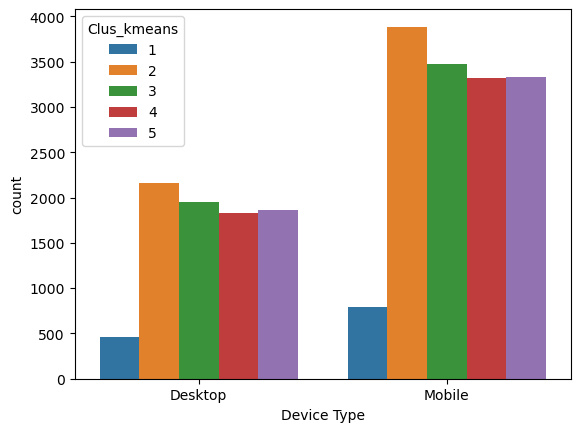

In [108]:
sns.countplot(data=df_ad, x='Device Type',hue='Clus_kmeans');

<AxesSubplot:xlabel='Clus_kmeans,Device Type'>

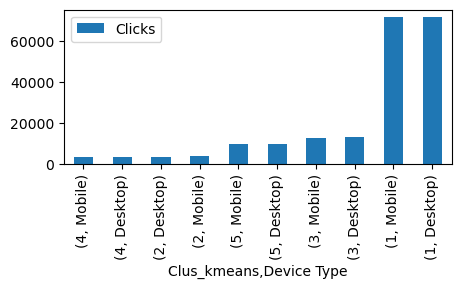

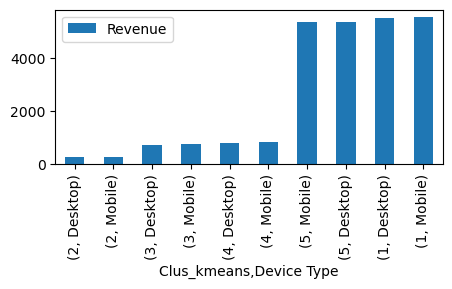

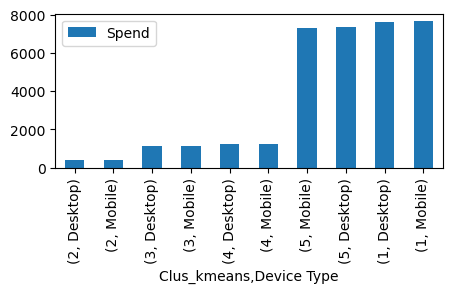

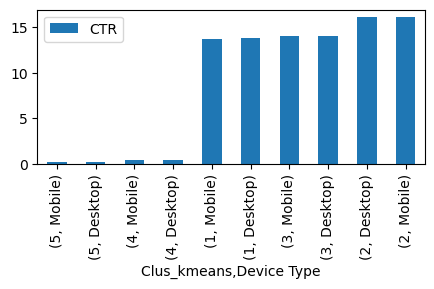

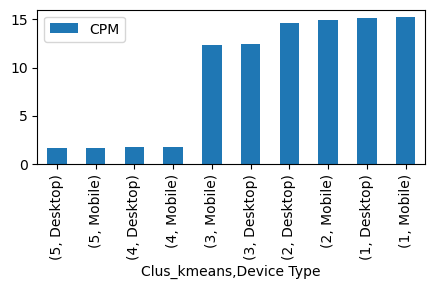

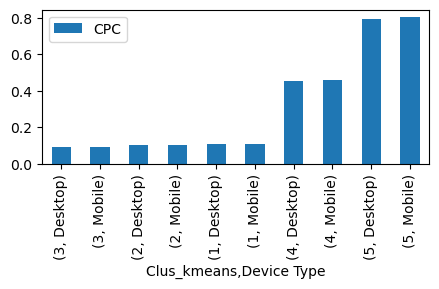

In [211]:

df_ad.groupby(['Clus_kmeans','Device Type'])[['Clicks']].mean().sort_values(by='Clicks').plot(kind='bar',figsize=(5,2))
df_ad.groupby(['Clus_kmeans','Device Type'])[['Revenue']].mean().sort_values(by='Revenue').plot(kind='bar',figsize=(5,2))
df_ad.groupby(['Clus_kmeans','Device Type'])[['Spend']].mean().sort_values(by='Spend').plot(kind='bar',figsize=(5,2))
df_ad.groupby(['Clus_kmeans','Device Type'])[['CTR']].mean().sort_values(by='CTR').plot(kind='bar',figsize=(5,2))
df_ad.groupby(['Clus_kmeans','Device Type'])[['CPM']].mean().sort_values(by='CPM').plot(kind='bar',figsize=(5,2))
df_ad.groupby(['Clus_kmeans','Device Type'])[['CPC']].mean().sort_values(by='CPC').plot(kind='bar',figsize=(5,2))

## <a name ='link9.1'>**Q9**</a><br>
Clustering: Conclude the project by providing summary of your learnings.<br>

Cluster 5 has most Impressions with Device Type Desktop and Cluster 2 has least Impressions.
Cluster 1 has most Clicks and Cluster 4  has lowest Clicks
Cluster 3 has biggest Ad size and Cluster 4 has least Ad size
Cluster 2,3,4 have similar Fees and Cluster 1 has loest Fees
Cluster 1 has highest Revenue and Spend and Cluster has lowest Revenue and Spend
Cluster 2 has highest CTR and Cluster 5 has lowest CPM
Cluster 1 has highest CPM and Cluster 5 has lowest CPM
Cluster 5 has highest CPC in mobiles and Cluster 3 has lowest CPC

## <a name ='link1.2'>**Q1**</a><br>
 PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.<br>


Loading Dataset

In [173]:
df=pd.read_excel("PCA India Data_Census.xlsx")
pd.set_option('display.max_columns', None)
df

State Code  Dist.Code                     State                Area Name  \
0             1          1           Jammu & Kashmir                  Kupwara   
1             1          2           Jammu & Kashmir                   Badgam   
2             1          3           Jammu & Kashmir              Leh(Ladakh)   
3             1          4           Jammu & Kashmir                   Kargil   
4             1          5           Jammu & Kashmir                    Punch   
..          ...        ...                       ...                      ...   
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  F_LIT  \
0     7707  23388  29796  5862  6196     3     0  1999   2598  13381  11364   
1     6218  19585  23102  4482  3733     7     6   427    517  10513   7891   
2     4452   6546  10964  1082  1018     3     6  5806   9723   4534   5840   
3     1320   2784   4206   563   677     0     0  2666   3968   1842   1962   
4    11654  20591  29981  5157  4587    20    33  7670  10843  13243  13477   
..     ...    ...    ...   ...   ...   ...   ...   ...    ...    ...    ...   
635   3333   8154  11781  1146  1203    21    30     0      0   6916  10184   
636  10612  12346  21691  1544  1533  2234  4155     0      0  10292  14225   
637   1275   1549   2630   227   225     0     0  1012   1750   1187   1602   
638   3762   5200   8012   723   664     0     0    28     50   4206   5273   
639   7975  11977  18049  1470  1358     0     0   161    264  10095  13362   

     M_ILL  F_ILL  TOT_WORK_M  TOT_WORK_F  MAINWORK_M  MAINWORK_F  MAIN_CL_M  \
0    10007  18432        6723        3752        2763        1275        486   
1     9072  15211        6982        4200        4628        1733       1098   
2     2012   5124        2775        4800        1940        2923        519   
3      942   2244        1002        1118         491         408         35   
4     7348  16504        5717        7692        2523        2267        743   
..     ...    ...         ...         ...         ...         ...        ...   
635   1238   1597        3808        1328        3459         997          8   
636   2054   7466        6458        5286        5619        4104        132   
637    362   1028         715        1031         325         534          8   
638    994   2739        2707        2174        2098        1666        553   
639   1882   4687        6345        5278        5366        4514        255   

     MAIN_CL_F  MAIN_AL_M  MAIN_AL_F  MAIN_HH_M  MAIN_HH_F  MAIN_OT_M  \
0          235        407        143         78         86       1792   
1          357        442        108        538        343       2550   
2         1205         36         71         19         55       1366   
3          102          8         24          9          6        439   
4          766        254        237         35         64       1491   
..         ...        ...        ...        ...        ...        ...   
635          3         27          5         16          3       3408   
636        108        645        903         25        173       4817   
637          8          1          1         16         38        300   
638        225         63         28          8          7       1474   
639        246         88         67         37         39       4986   

     MAIN_OT_F  MARGWORK_M  MARGWORK_F  MARG_CL_M  MARG_CL_F  MARG_AL_M  \
0          811        3960        2477        619        580       2052   
1          925        2354        2467        384        661        915   
2         1592      

Printing top 5 records

In [200]:
pd.set_option('display.max_columns', None)
df.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  F_LIT  M_ILL  F_ILL  \
0  5862  6196     3     0  1999   2598  13381  11364  10007  18432   
1  4482  3733     7     6   427    517  10513   7891   9072  15211   
2  1082  1018     3     6  5806   9723   4534   5840   2012   5124   
3   563   677     0     0  2666   3968   1842   1962    942   2244   
4  5157  4587    20    33  7670  10843  13243  13477   7348  16504   

   TOT_WORK_M  TOT_WORK_F  MAINWORK_M  MAINWORK_F  MAIN_CL_M  MAIN_CL_F  \
0        6723        3752        2763        1275        486        235   
1        6982        4200        4628        1733       1098        357   
2        2775        4800        1940        2923        519       1205   
3        1002        1118         491         408         35        102   
4        5717        7692        2523        2267        743        766   

   MAIN_AL_M  MAIN_AL_F  MAIN_HH_M  MAIN_HH_F  MAIN_OT_M  MAIN_OT_F  \
0        407        143         78         86       1792        811   
1        442        108        538        343       2550        925   
2         36         71         19         55       1366       1592   
3          8         24          9          6        439        276   
4        254        237         35         64       1491       1200   

   MARGWORK_M  MARGWORK_F  MARG_CL_M  MARG_CL_F  MARG_AL_M  MARG_AL_F  \
0        3960        2477        619        580       2052        641   
1        2354        2467        384        661        915        547   
2         835        1877        360       1250         44        157   
3         511         710        135        286         63        176   
4        3194        5425       1327       2462       1037       1069   

   MARG_HH_M  MARG_HH_F  MARG_OT_M  MARG_OT_F  MARGWORK_3_6_M  MARGWORK_3_6_F  \
0        142        244       1147       1012           16665           26044   
1        369        627        686        632           12603           18902   
2         15         32        416        438            3771            6164   
3         10         43        303        205            1782            3088   
4         62        319        768       1575           14874           22289   

   MARG_CL_3_6_M  MARG_CL_3_6_F  MARG_AL_3_6_M  MARG_AL_3_6_F  MARG_HH_3_6_M  \
0           2810           1728            439            343           1372   
1           1829           1752            261            432            729   
2            721           1689            316           1161             41   
3            317            463             74            158             50   
4           2320           3497            862           1419            832   

   MARG_HH_3_6_F  MARG_OT_3_6_M  MARG_OT_3_6_F  MARGWORK_0_3_M  \
0            389            110            198             889   
1            399            293            449             546   
2            123             15             28             349   
3            126              6             33             187   
4            767             38            214             588   

   MARGWORK_0_3_F  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0             798           1150            749            180            237   
1             472            525            715            123            229   
2             377            114            188             44             89   
3             146            194            247             61            128   
4            1097   

Printing bottom 5 records

In [176]:
pd.set_option('display.max_columns', None)
df.tail().T

635         636                       637  \
State Code             34          34                        35   
Dist.Code             636         637                       638   
State          Puducherry  Puducherry  Andaman & Nicobar Island   
Area Name            Mahe    Karaikal                  Nicobars   
No_HH                3333       10612                      1275   
...                   ...         ...                       ...   
MARG_HH_0_3_F           0         130                         6   
MARG_OT_0_3_M           0           4                        17   
MARG_OT_0_3_F           0          23                        47   
NON_WORK_M             32         110                        76   
NON_WORK_F             47         170                        77   

                                    638                       639  
State Code                           35                        35  
Dist.Code                           639                       640  
State          Andaman & Nicobar Island  Andaman & Nicobar Island  
Area Name       North  & Middle Andaman             South Andaman  
No_HH                              3762                      7975  
...                                 ...                       ...  
MARG_HH_0_3_F                        21                        17  
MARG_OT_0_3_M                         1                         2  
MARG_OT_0_3_F                         4                         4  
NON_WORK_M                          100                       148  
NON_WORK_F                          103                        99  

[61 rows x 5 columns]

In [7]:
print( "Number  of observations is {} and number of columns is  {}".format(df.shape[0],df.shape[1]))

Number  of observations is 640 and number of columns is  61


Printing Columns Info

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    object
 1   Dist.Code       640 non-null    object
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

Printing Data Summary

In [201]:
pd.set_option('display.max_columns', None)
df.drop(['State Code','Dist.Code'],axis=1).describe().T

count           mean            std    min       25%      50%  \
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.836932   14.0    833.50   1834.5   
MARG_CL_0_3_M   640.0    1392.973438    1489.707052    4.0    489.50    949.0   
MARG_CL_0_3_F   640.0    2757.050000    2788.77

Data Summary

In [178]:
pd.set_option('display.max_columns', None)
df[['State','Area Name']].describe().T

count unique            top freq
State       640     35  Uttar Pradesh   71
Area Name   640    635        Raigarh    2

Checking Duplicate and Null values

In [13]:
df.duplicated().sum()

0

In [179]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## <a name ='link2.2'>**Q2**</a><br>
 PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F<br>

Lets pick variables M_LIT, TOT_M, TOT_F,TOT_WORK_M, TOT_WORK_F out of the 24 variables to do an EDA

[Text(0.5, 1.0, 'Boxplot of M_LIT')]

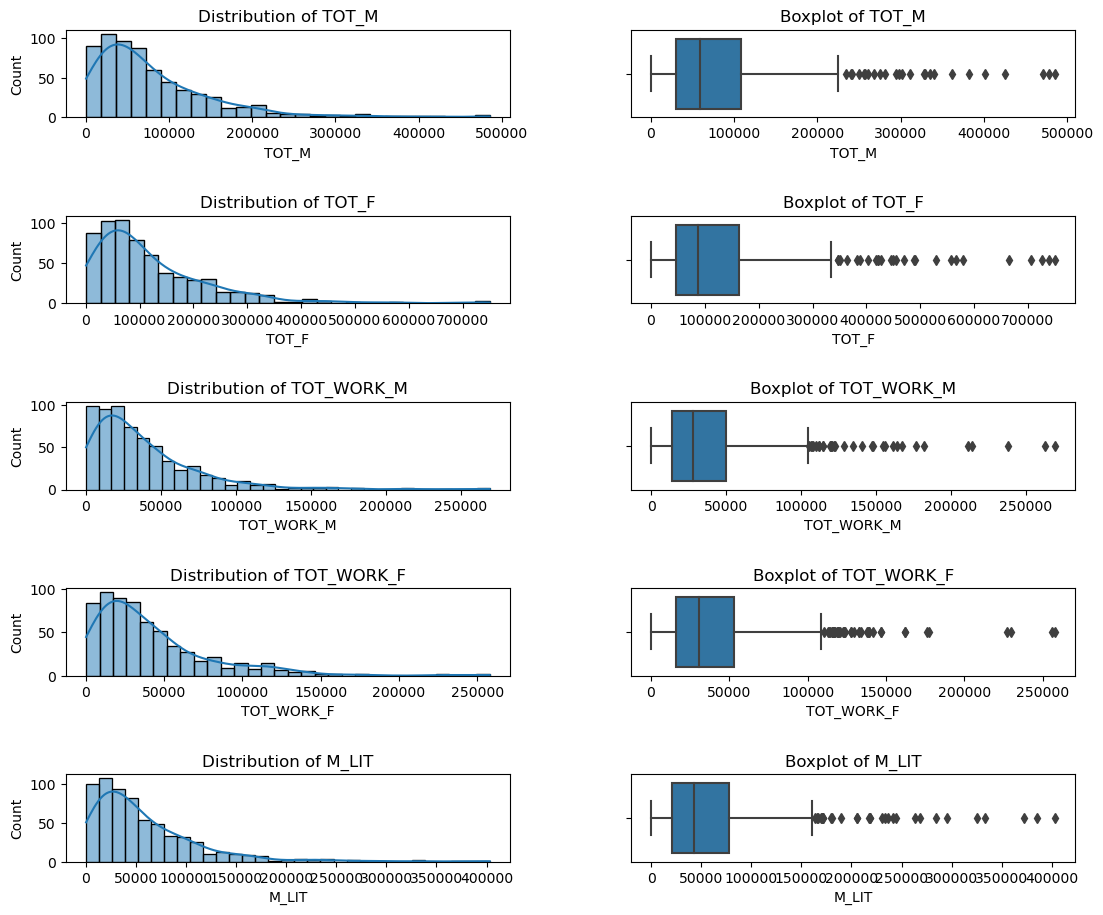

In [180]:
lst=['TOT_M', 'TOT_F','TOT_WORK_M', 'TOT_WORK_F','M_LIT']
fig, ax = plt.subplots(5,2)
fig.set_size_inches(12,10)
fig.tight_layout(pad=5.0)
sns.histplot(data=df,x=lst[0],ax=ax[0][0],kde=True).set(title='Distribution of {}'.format(lst[0]))
sns.boxplot(data=df,x=lst[0],ax=ax[0][1]).set(title='Boxplot of {}'.format(lst[0]))
sns.histplot(data=df,x=lst[1],ax=ax[1][0],kde=True).set(title='Distribution of {}'.format(lst[1]))
sns.boxplot(data=df,x=lst[1],ax=ax[1][1]).set(title='Boxplot of {}'.format(lst[1]))
sns.histplot(data=df,x=lst[2],ax=ax[2][0],kde=True).set(title='Distribution of {}'.format(lst[2]))
sns.boxplot(data=df,x=lst[2],ax=ax[2][1]).set(title='Boxplot of {}'.format(lst[2]))
sns.histplot(data=df,x=lst[3],ax=ax[3][0],kde=True).set(title='Distribution of {}'.format(lst[3]))    
sns.boxplot(data=df,x=lst[3],ax=ax[3][1]).set(title='Boxplot of {}'.format(lst[3]))
sns.histplot(data=df,x=lst[4],ax=ax[4][0],kde=True).set(title='Distribution of {}'.format(lst[4]))
sns.boxplot(data=df,x=lst[4],ax=ax[4][1]).set(title='Boxplot of {}'.format(lst[4]))
      



In [181]:
df[lst].describe()

TOT_M          TOT_F     TOT_WORK_M     TOT_WORK_F  \
count     640.000000     640.000000     640.000000     640.000000   
mean    79940.576563  122372.084375   37992.407813   41295.760938   
std     73384.511114  113600.717282   36419.537491   37192.360943   
min       391.000000     698.000000     100.000000     357.000000   
25%     30228.000000   46517.750000   13753.500000   16097.750000   
50%     58339.000000   87724.500000   27936.500000   30588.500000   
75%    107918.500000  164251.750000   50226.750000   53234.250000   
max    485417.000000  750392.000000  269422.000000  257848.000000   

               M_LIT  
count     640.000000  
mean    57967.979688  
std     55910.282466  
min       286.000000  
25%     21298.000000  
50%     42693.500000  
75%     77989.500000  
max    403261.000000

Bivariate Analysis

[Text(0.5, 1.0, 'ScatterPlot of TOT_WORK_M Vs TOT_WORK_F')]

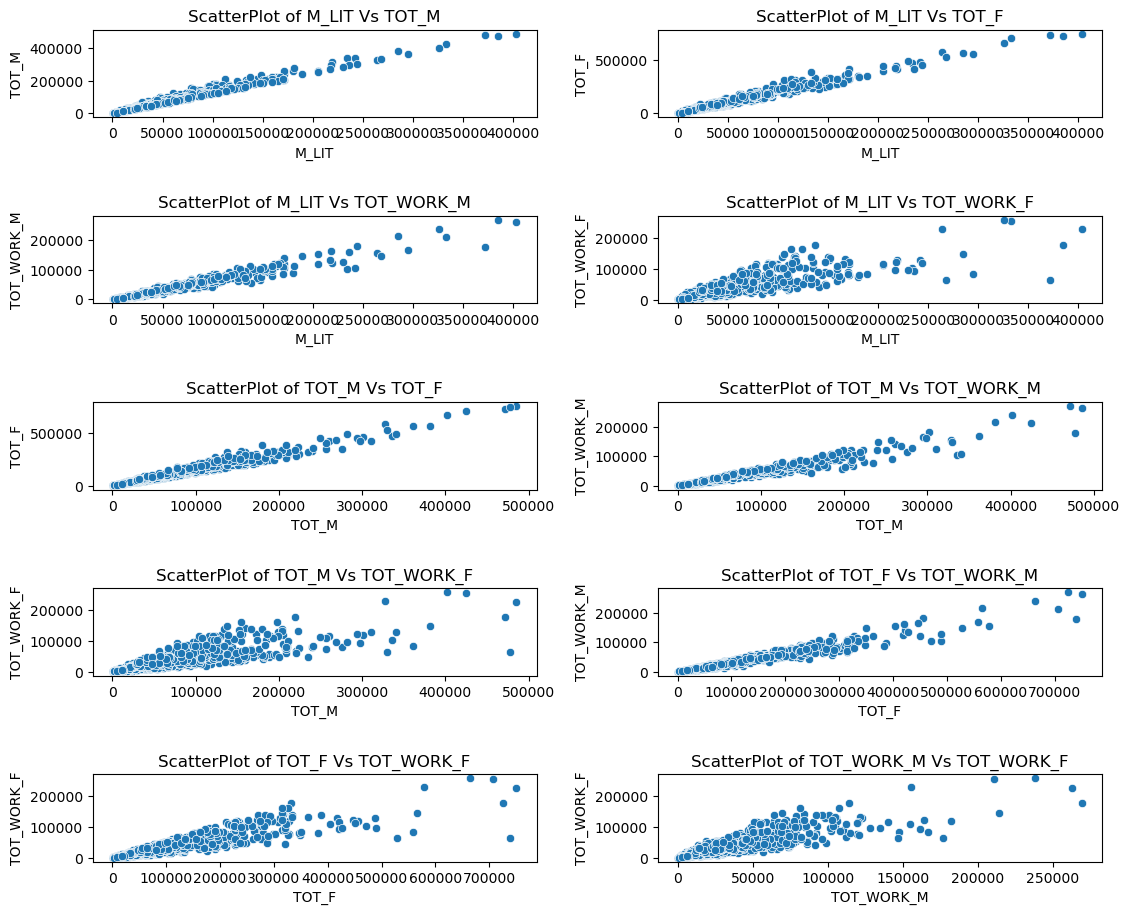

In [192]:
lst=['M_LIT', 'TOT_M', 'TOT_F','TOT_WORK_M', 'TOT_WORK_F']
fig, ax = plt.subplots(5,2)
fig.set_size_inches(12,10)
fig.tight_layout(pad=5.0)
sns.scatterplot(data=df,x=lst[0],y=lst[1],ax=ax[0][0]).set(title='ScatterPlot of {} Vs {}'.format(lst[0],lst[1]))
sns.scatterplot(data=df,x=lst[0],y=lst[2],ax=ax[0][1]).set(title='ScatterPlot of {} Vs {}'.format(lst[0],lst[2]))
sns.scatterplot(data=df,x=lst[0],y=lst[3],ax=ax[1][0]).set(title='ScatterPlot of {} Vs {}'.format(lst[0],lst[3]))
sns.scatterplot(data=df,x=lst[0],y=lst[4],ax=ax[1][1]).set(title='ScatterPlot of {} Vs {}'.format(lst[0],lst[4]))
sns.scatterplot(data=df,x=lst[1],y=lst[2],ax=ax[2][0]).set(title='ScatterPlot of {} Vs {}'.format(lst[1],lst[2]))
sns.scatterplot(data=df,x=lst[1],y=lst[3],ax=ax[2][1]).set(title='ScatterPlot of {} Vs {}'.format(lst[1],lst[3]))
sns.scatterplot(data=df,x=lst[1],y=lst[4],ax=ax[3][0]).set(title='ScatterPlot of {} Vs {}'.format(lst[1],lst[4]))
sns.scatterplot(data=df,x=lst[2],y=lst[3],ax=ax[3][1]).set(title='ScatterPlot of {} Vs {}'.format(lst[2],lst[3]))
sns.scatterplot(data=df,x=lst[2],y=lst[4],ax=ax[4][0]).set(title='ScatterPlot of {} Vs {}'.format(lst[2],lst[4]))
sns.scatterplot(data=df,x=lst[3],y=lst[4],ax=ax[4][1]).set(title='ScatterPlot of {} Vs {}'.format(lst[3],lst[4]))

In [134]:
pd.DataFrame(df.groupby('Area Name')['TOT_M'].sum()/df.groupby('Area Name')['TOT_F'].sum(),columns=['Ratio']).sort_values(by='Ratio',ascending=False)

Ratio
Area Name               
Lakshadweep     0.868061
Badgam          0.847762
Mahamaya Nagar  0.847313
Dhaulpur        0.846911
Baghpat         0.844003
...                  ...
Baudh           0.451455
West Godavari   0.450076
Virudhunagar    0.449352
Koraput         0.440769
Krishna         0.437972

[635 rows x 1 columns]

In [153]:
pd.DataFrame(df.groupby('State')['TOT_M'].sum()/df.groupby('State')['TOT_F'].sum(),columns=['Ratio']).sort_values(by='Ratio',ascending=False)

Ratio
State                             
Lakshadweep               0.868061
Haryana                   0.779129
NCT of Delhi              0.775077
Uttar Pradesh             0.752167
Meghalaya                 0.752160
Bihar                     0.744596
Punjab                    0.744502
Jammu & Kashmir           0.735154
Daman & Diu               0.703143
Chandigarh                0.700037
Rajasthan                 0.695286
Assam                     0.686561
Jharkhand                 0.681804
Gujarat                   0.674844
Andaman & Nicobar Island  0.652679
West Bengal               0.650345
Dadara & Nagar Havelli    0.644631
Himachal Pradesh          0.642741
Sikkim                    0.642227
Manipur                   0.641179
Madhya Pradesh            0.639695
Karnataka                 0.637802
Uttarakhand               0.630865
Tripura                   0.625881
Mizoram                   0.623634
Goa                       0.621648
Kerala                    0.601238
Puducherry                0.591111
Maharashtra               0.587812
Nagaland                  0.583682
Odisha                    0.575500
Arunachal Pradesh         0.574365
Chhattisgarh              0.549200
Tamil Nadu                0.547921
Andhra Pradesh            0.537024

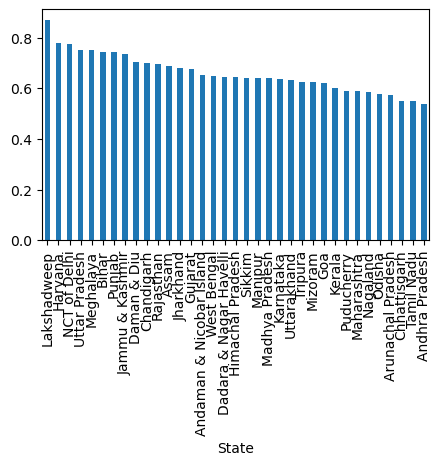

In [144]:

plt.figure(figsize=(5,3))
(df.groupby('State')['TOT_M'].sum()/df.groupby('State')['TOT_F'].sum()).sort_values(ascending=False).plot(kind='bar')
plt.show()

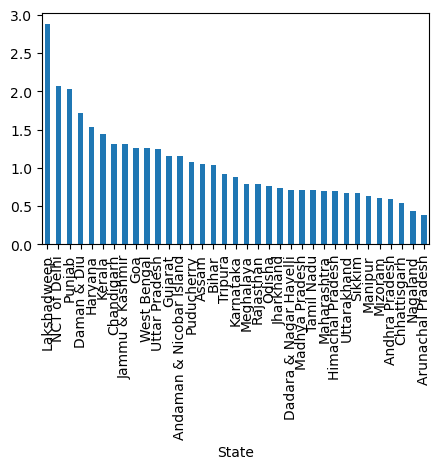

In [193]:
plt.figure(figsize=(5,3))
(df.groupby('State')['TOT_WORK_M'].sum()/df.groupby('State')['TOT_WORK_F'].sum()).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [201]:
pd.DataFrame(df.groupby('State')['TOT_WORK_M'].sum()/df.groupby('State')['TOT_WORK_F'].sum(),columns=['Ratio']).sort_values(by='Ratio',ascending=False)

Ratio
State                             
Lakshadweep               2.873596
NCT of Delhi              2.071822
Punjab                    2.033485
Daman & Diu               1.718851
Haryana                   1.527753
Kerala                    1.437928
Chandigarh                1.315726
Jammu & Kashmir           1.304205
Goa                       1.260938
West Bengal               1.258683
Uttar Pradesh             1.248361
Gujarat                   1.151894
Andaman & Nicobar Island  1.151362
Puducherry                1.073417
Assam                     1.055435
Bihar                     1.041257
Tripura                   0.912980
Karnataka                 0.881812
Meghalaya                 0.782713
Rajasthan                 0.782564
Odisha                    0.762283
Jharkhand                 0.730986
Dadara & Nagar Havelli    0.712211
Madhya Pradesh            0.711447
Tamil Nadu                0.706184
Maharashtra               0.695047
Himachal Pradesh          0.693799
Uttarakhand               0.677192
Sikkim                    0.674967
Manipur                   0.630544
Mizoram                   0.604978
Andhra Pradesh            0.590926
Chhattisgarh              0.544654
Nagaland                  0.440617
Arunachal Pradesh         0.382688

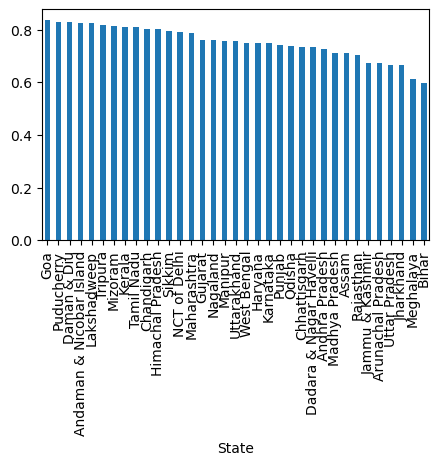

In [202]:

plt.figure(figsize=(5,3))
(df.groupby('State')['M_LIT'].sum()/df.groupby('State')['M_LIT'].sum()).sort_values(ascending=False).plot(kind='bar')
plt.show()

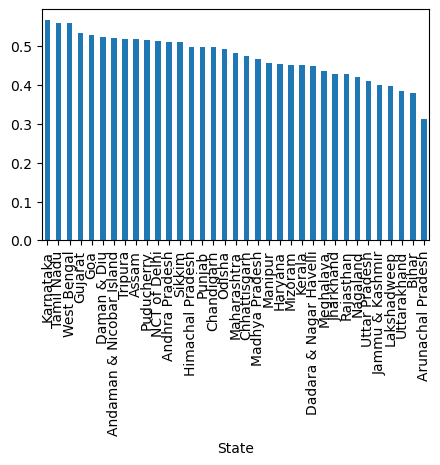

In [203]:

plt.figure(figsize=(5,3))
(df.groupby('State')['TOT_WORK_M'].sum()/df.groupby('State')['TOT_M'].sum()).sort_values(ascending=False).plot(kind='bar')
plt.show()

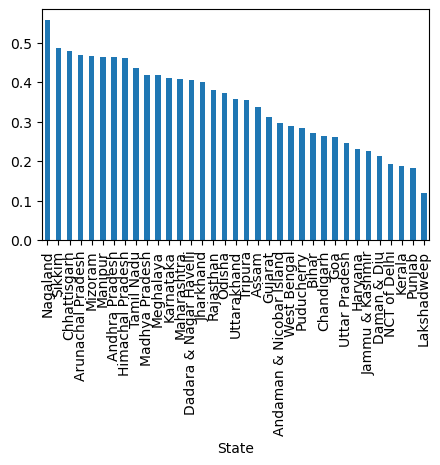

In [204]:
plt.figure(figsize=(5,3))
(df.groupby('State')['TOT_WORK_F'].sum()/df.groupby('State')['TOT_F'].sum()).sort_values(ascending=False).plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='State'>

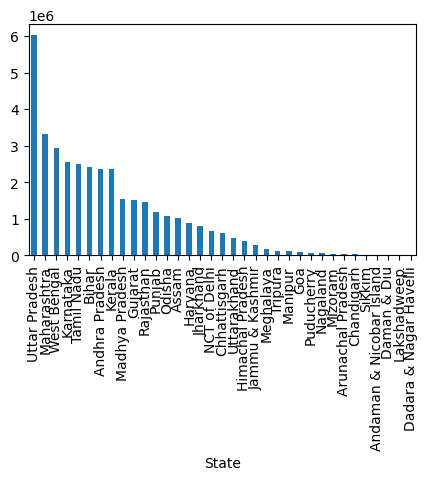

In [189]:
plt.figure(figsize=(5,3))
df.groupby('State')['M_LIT'].sum().sort_values(ascending=False).plot(kind='bar')


<AxesSubplot:xlabel='State'>

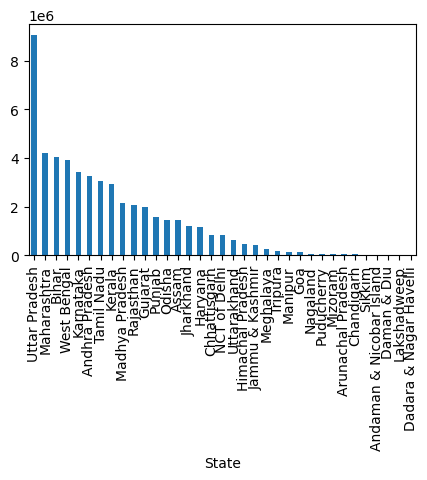

In [190]:
plt.figure(figsize=(5,3))
df.groupby('State')['TOT_M'].sum().sort_values(ascending=False).plot(kind='bar')


<AxesSubplot:xlabel='State'>

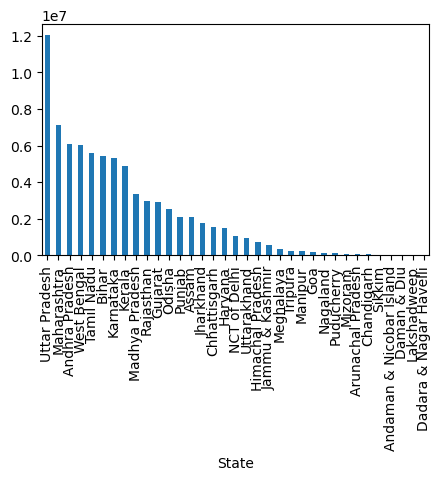

In [191]:
plt.figure(figsize=(5,3))
df.groupby('State')['TOT_F'].sum().sort_values(ascending=False).plot(kind='bar')


<AxesSubplot:xlabel='State'>

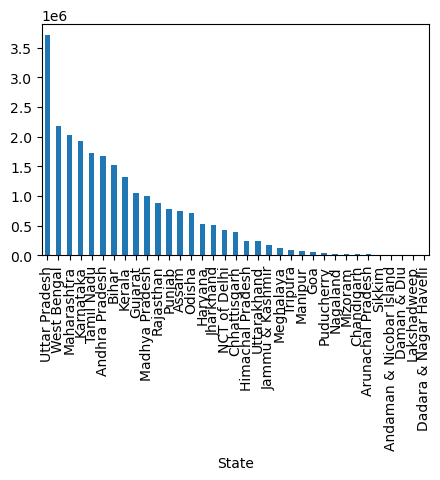

In [148]:
plt.figure(figsize=(5,3))
df.groupby('State')['TOT_WORK_M'].sum().sort_values(ascending=False).plot(kind='bar')


<AxesSubplot:xlabel='State'>

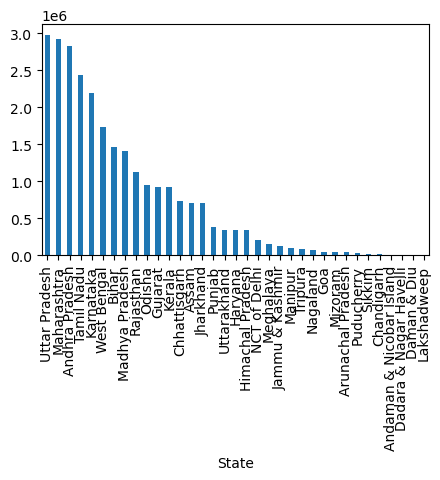

In [149]:
plt.figure(figsize=(5,3))
df.groupby('State')['TOT_WORK_F'].sum().sort_values(ascending=False).plot(kind='bar')

## <a name ='link3.2'>**Q3**</a><br>
 PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?<br>

Outlier treatment is not necesary for PCA analysis 

Converting State and Dist code to Object Type

In [118]:
df['State Code']=df['State Code'].astype('object')
df['Dist.Code']=df['Dist.Code'].astype('object')

In [119]:
df_num=df.select_dtypes(include = ['int64'])

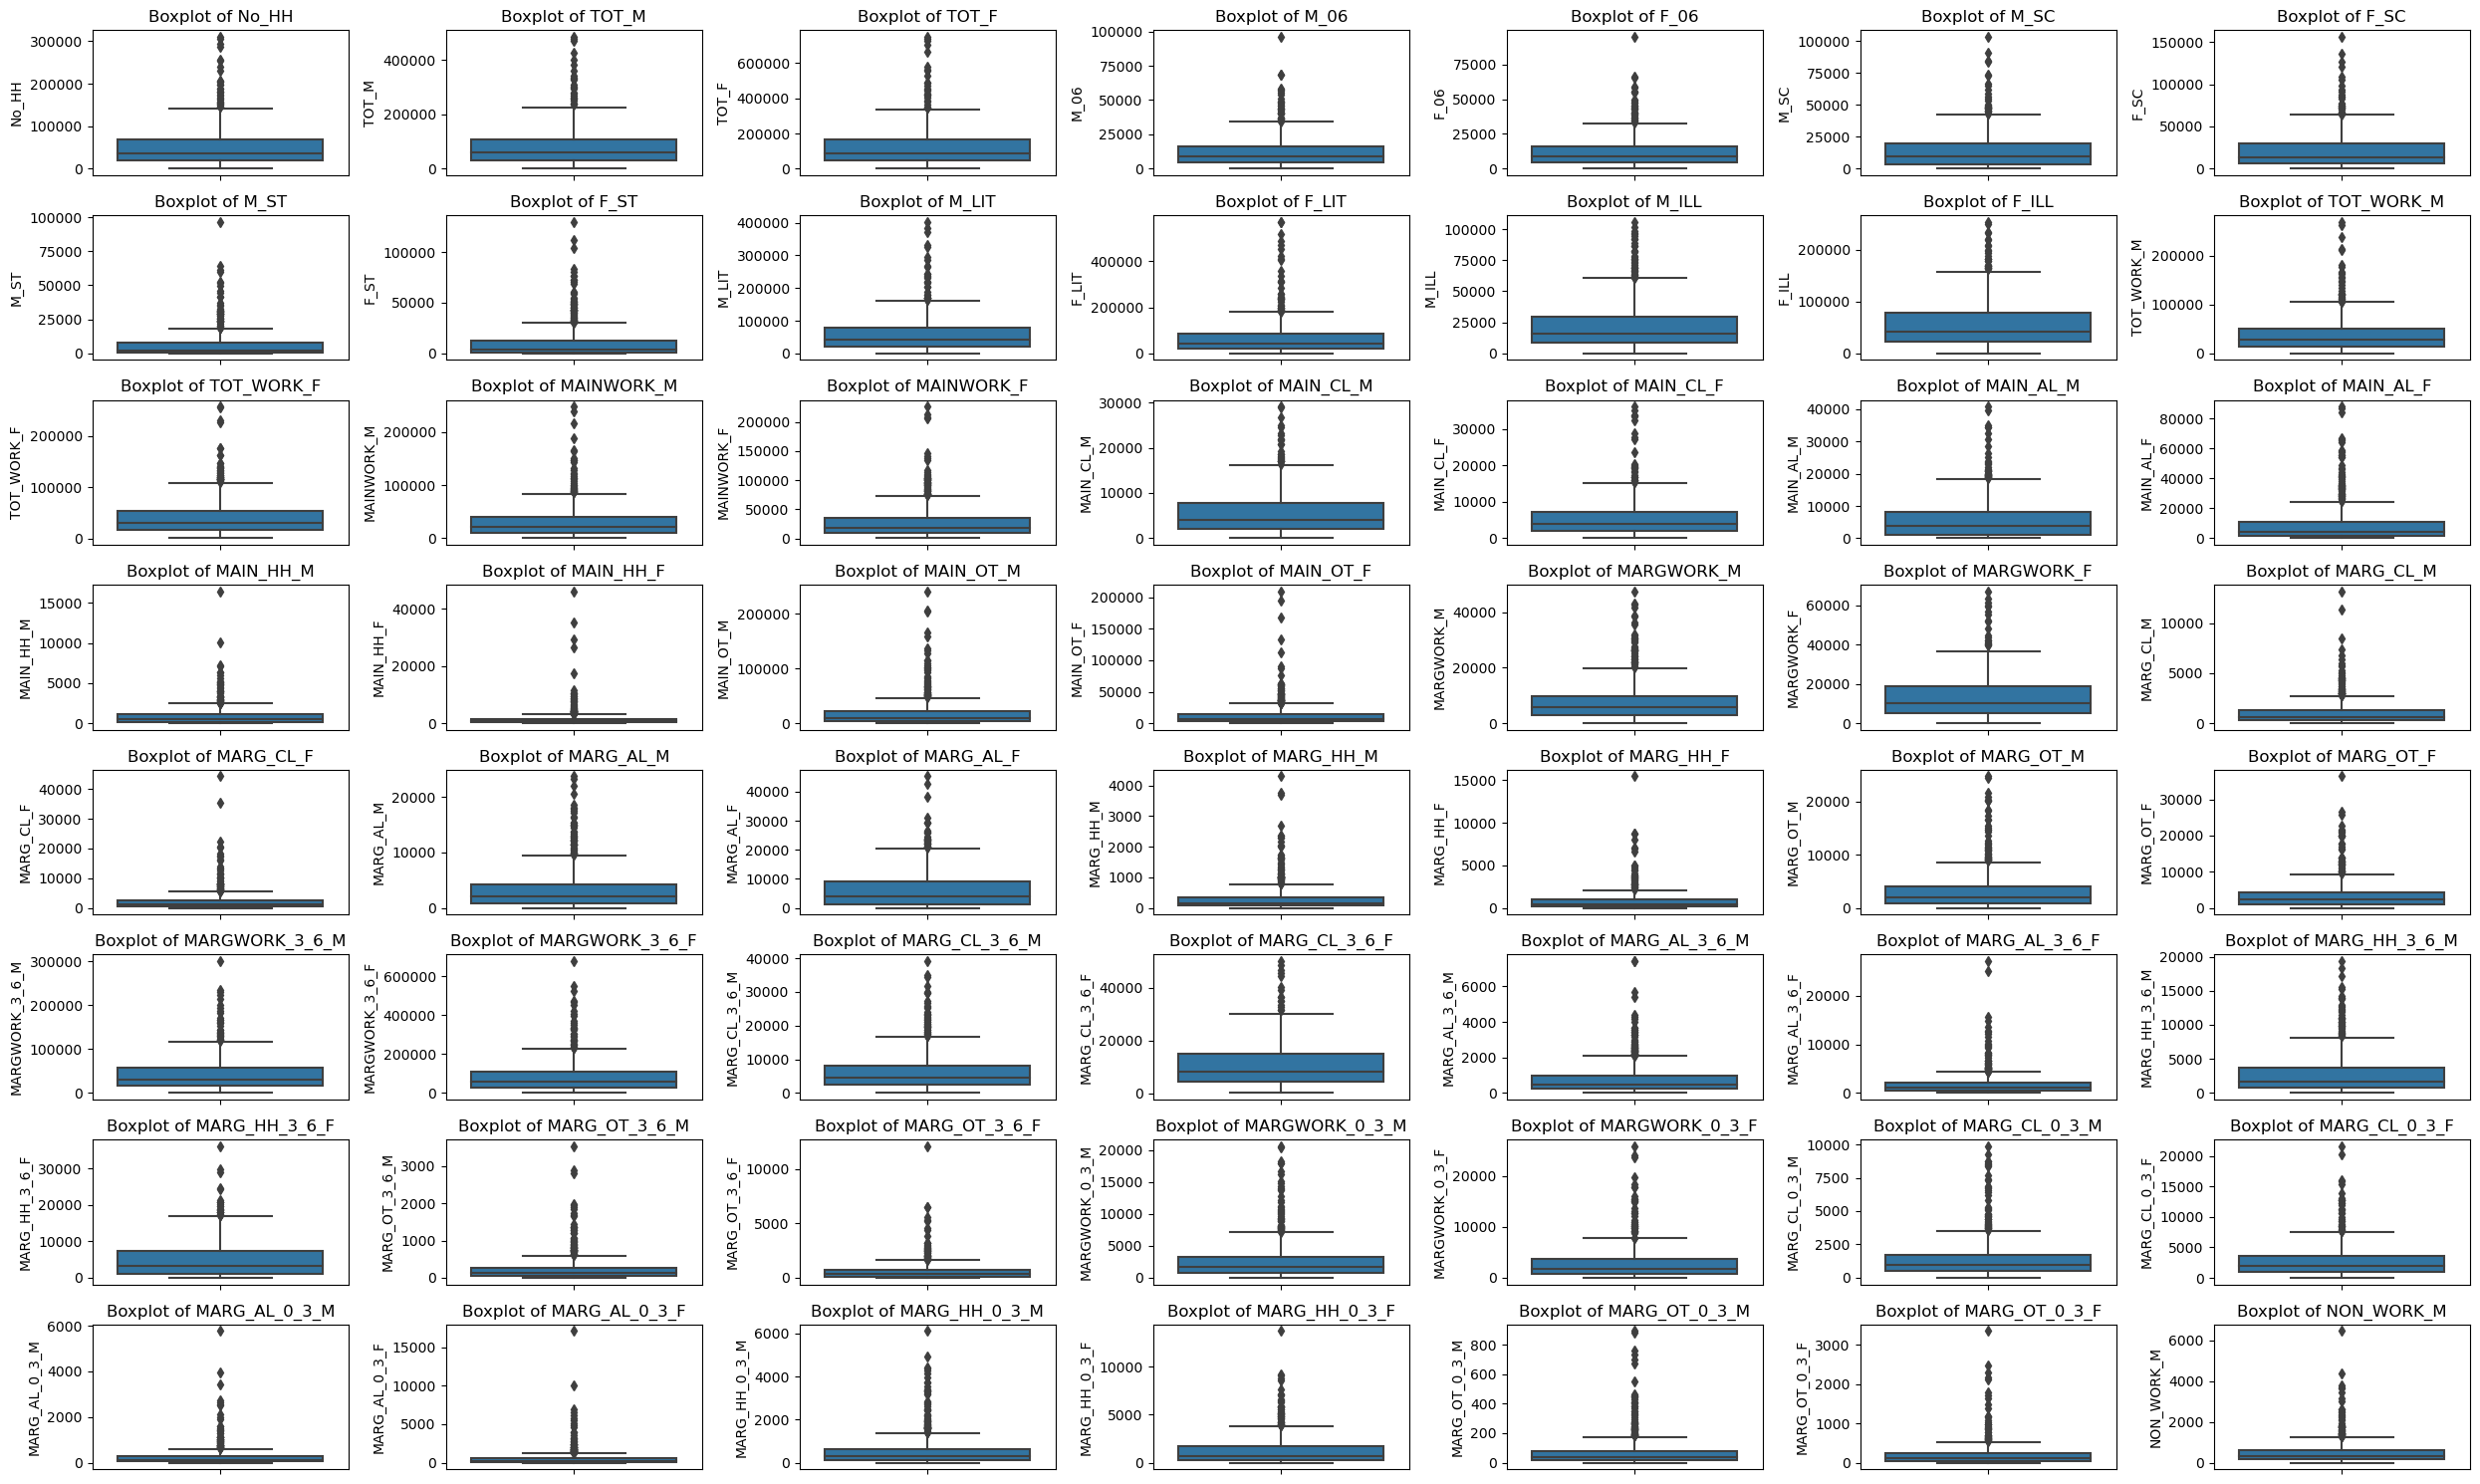

In [195]:
#Check for presence of outliers in each feature
plt.figure(figsize = (25,15))
feature_list = df_num.columns
for i in range(len(feature_list)-1):
    plt.subplot(8, 7, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

## <a name ='link4.2'>**Q4**</a><br>
PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.<br>

Scaling the Data

In [141]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0   -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1   -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2   -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3   -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4   -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   
..        ...       ...       ...       ...       ...       ...       ...   
635 -0.995677 -0.978990 -0.974268 -0.971387 -0.948916 -0.957326 -0.955667   
636 -0.844340 -0.921822 -0.886965 -0.936754 -0.919757 -0.803806 -0.765670   
637 -1.038465 -1.069066 -1.054885 -1.051356 -1.035331 -0.958783 -0.957049   
638 -0.986758 -1.019276 -1.007472 -1.008195 -0.996541 -0.958783 -0.957049   
639 -0.899166 -0.926854 -0.919050 -0.943193 -0.935220 -0.958783 -0.957049   

         M_ST      F_ST     M_LIT     F_LIT     M_ILL     F_ILL  TOT_WORK_M  \
0   -0.423306 -0.476423 -0.798097 -0.733477 -0.604015 -0.798229   -0.859260   
1   -0.582014 -0.607607 -0.849434 -0.779797 -0.651213 -0.866645   -0.852143   
2   -0.038951 -0.027273 -0.956457 -0.807151 -1.007596 -1.080898   -0.967749   
3   -0.355965 -0.390060 -1.004643 -0.858872 -1.061609 -1.142070   -1.016469   
4    0.149238  0.043330 -0.800568 -0.705296 -0.738239 -0.839181   -0.886905   
..        ...       ...       ...       ...       ...       ...         ...   
635 -0.625124 -0.640197 -0.913820 -0.749215 -1.046667 -1.155813   -0.939362   
636 -0.625124 -0.640197 -0.853390 -0.695320 -1.005476 -1.031152   -0.866542   
637 -0.522953 -0.529880 -1.016367 -0.863674 -1.090887 -1.167899   -1.024356   
638 -0.622297 -0.637046 -0.962328 -0.814713 -1.058984 -1.131556   -0.969617   
639 -0.608870 -0.623555 -0.856916 -0.706830 -1.014159 -1.090180   -0.869648   

     TOT_WORK_F  MAINWORK_M  MAINWORK_F  MAIN_CL_M  MAIN_CL_F  MAIN_AL_M  \
0     -1.010238   -0.872367   -0.898216  -1.042844  -0.986630  -0.851060   
1     -0.998183   -0.813078   -0.882936  -0.913606  -0.963707  -0.845587   
2     -0.982038   -0.898530   -0.843236  -1.035875  -0.804375  -0.909079   
3     -1.081114   -0.944594   -0.927140  -1.138083  -1.011620  -0.913457   
4     -0.904219   -0.879997   -0.865121  -0.988572  -0.886859  -0.874987   
..          ...         ...         ...        ...        ...        ...   
635   -1.075463   -0.850241   -0.907490  -1.143784  -1.030221  -0.910486   
636   -0.968960   -0.781574   -0.803836  -1.117599  -1.010492  -0.813841   
637   -1.083455   -0.949871   -0.922936  -1.143784  -1.029282  -0.914552   
638   -1.052699   -0.893507   -0.885171  -1.028695  -0.988509  -0.904856   
639   -0.969176   -0.789617   -0.790158  -1.091625  -0.984563  -0.900947   

     MAIN_AL_F  MAIN_HH_M  MAIN_HH_F  MAIN_OT_M  MAIN_OT_F  MARGWORK_M  \
0    -0.683276  -0.630766  -0.407555  -0.624042  -0.611637   -0.516943   
1    -0.685999  -0.270728  -0.326659  -0.594942  -0.605624   -0.733823   
2    -0.688878  -0.676945  -0.417313  -0.640396  -0.570440   -0.938955   
3    -0.692534  -0.684772  -0.432737  -0.675984  -0.639858   -0.982709   
4    -0.675964  -0.664422  -0.414480  -0.635597  -0.591118   -0.620386   
..         ...        ...        ...        ...        ...         ...   
635  -0.694012  -0.679293  -0.433681  -0.562003  -0.602406   -1.004586   
636  -0.624152  -0.672249  -0.380170  -0.507910  -0.500388   -0.938415   
637  -0.694323  -0.679293  -0.422664  -0.681320  -0.628728   -0.999049   
638  -0.692223  -0.685554  -0.432422  -0.636250  -0.580251   -0.969475   
639  -0.689189  -0.662856  -0.422349  -0.501422  -0.434872   -0.919509   

     MARGWORK_F  MARG_CL_M  MARG_CL_F  MARG_AL_M  MARG_AL_F  MARG_HH_M  \
0     -0.966512  -0.321809  -0.485053  -0.331426  -0.860192  -0.377984   
1     -0.967422  -0.501127  -0.462312  -0.632331  -0.874080   0.113039   
2     -1.021117  -0.519440  -0.296948  -0.862840  -0.931699  -0.652697   
3     -1.127325  -0.691127  -0.56759

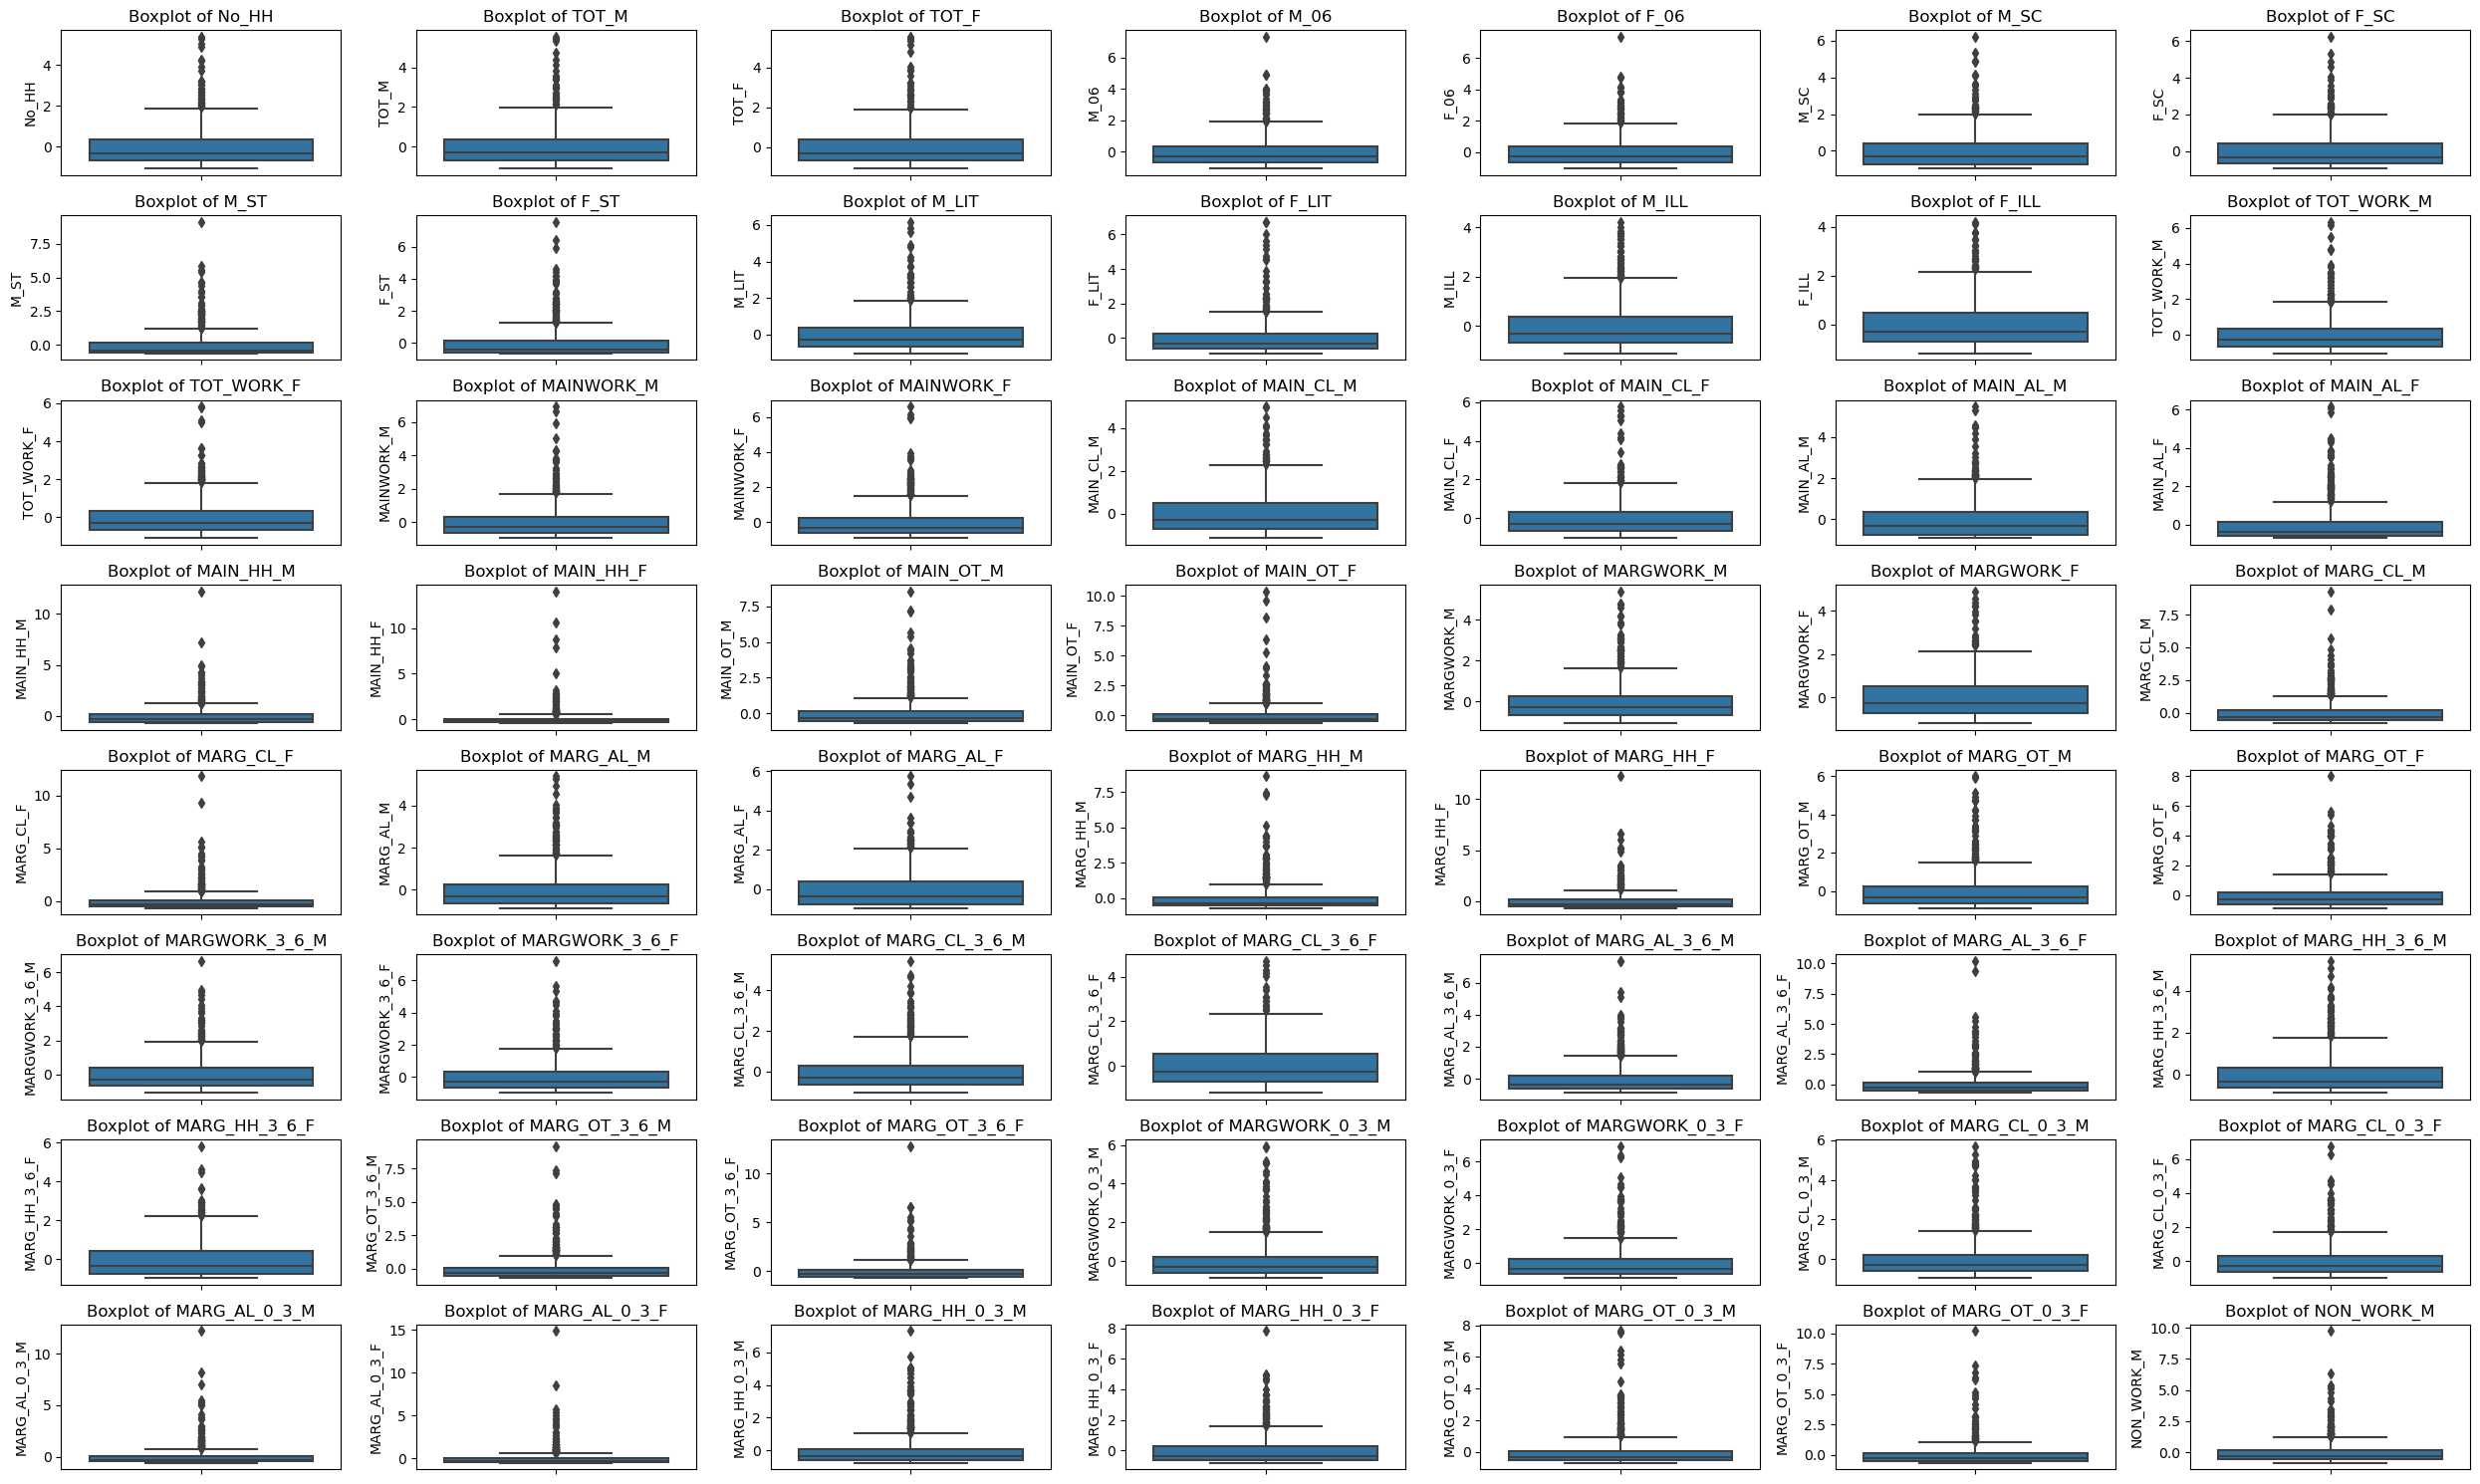

In [197]:
#Check for presence of outliers in each feature
plt.figure(figsize = (25,15))
feature_list = df_num_scaled.columns
for i in range(len(feature_list)-1):
    plt.subplot(8, 7, i + 1)
    sns.boxplot(y = df_num_scaled[feature_list[i]], data = df_num_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [89]:
def univariate_analysis(cols):
   print(" Univariate analysis of "+cols)
   print(df[cols].describe())
   plt.figure()
   sns.boxplot(data=df,x=df[cols])
   plt.title("boxplot of {}".format(cols))
   plt.show()

 Univariate analysis of No_HH
count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64


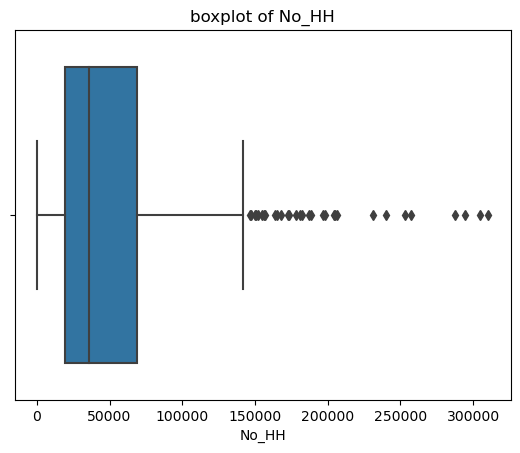

 Univariate analysis of TOT_M
count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64


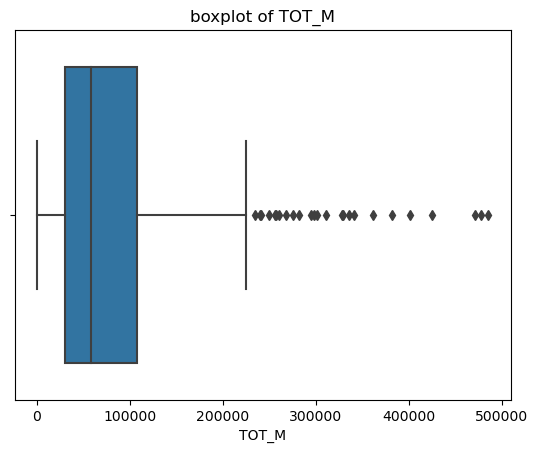

 Univariate analysis of TOT_F
count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64


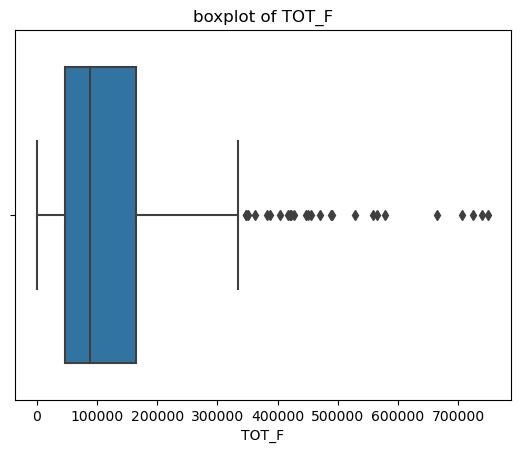

 Univariate analysis of M_06
count      640.000000
mean     12309.098438
std      11500.906881
min         56.000000
25%       4733.750000
50%       9159.000000
75%      16520.250000
max      96223.000000
Name: M_06, dtype: float64


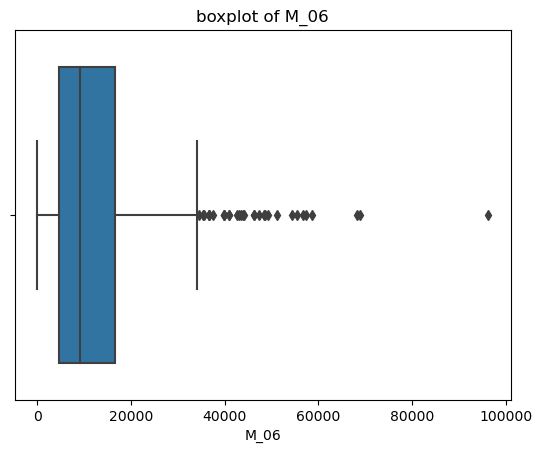

 Univariate analysis of F_06
count      640.000000
mean     11942.300000
std      11326.294567
min         56.000000
25%       4672.250000
50%       8663.000000
75%      15902.250000
max      95129.000000
Name: F_06, dtype: float64


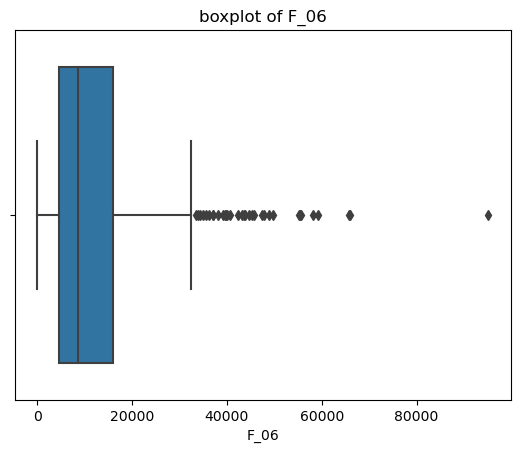

 Univariate analysis of M_SC
count       640.000000
mean      13820.946875
std       14426.373130
min           0.000000
25%        3466.250000
50%        9591.500000
75%       19429.750000
max      103307.000000
Name: M_SC, dtype: float64


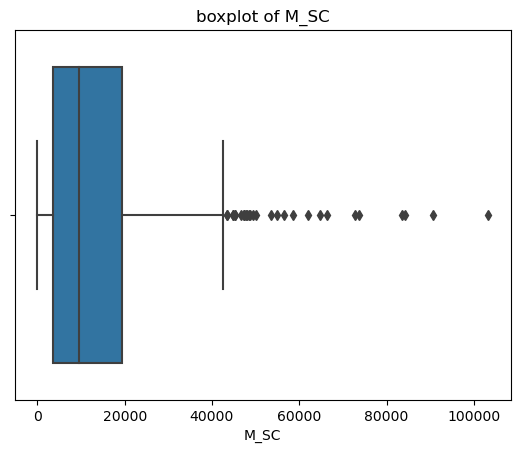

 Univariate analysis of F_SC
count       640.000000
mean      20778.392188
std       21727.887713
min           0.000000
25%        5603.250000
50%       13709.000000
75%       29180.000000
max      156429.000000
Name: F_SC, dtype: float64


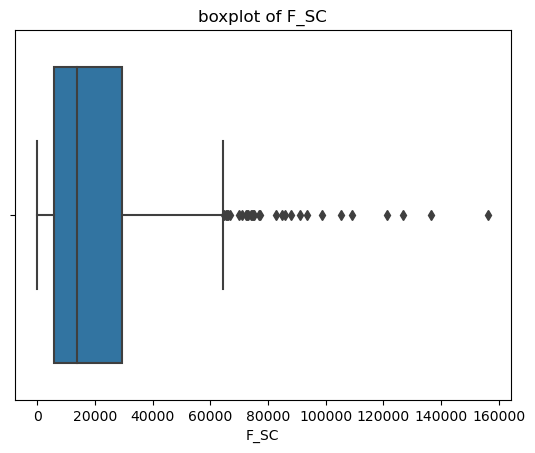

 Univariate analysis of M_ST
count      640.000000
mean      6191.807813
std       9912.668948
min          0.000000
25%        293.750000
50%       2333.500000
75%       7658.000000
max      96785.000000
Name: M_ST, dtype: float64


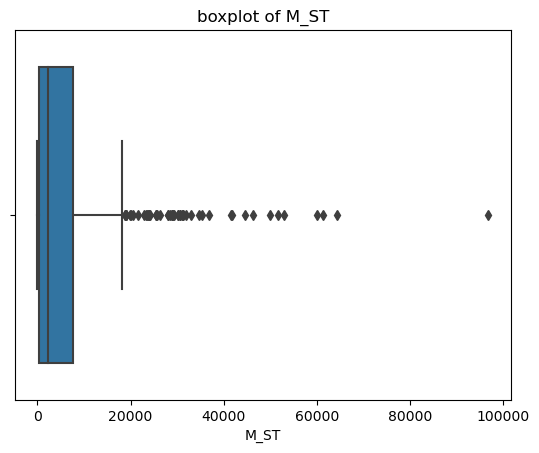

 Univariate analysis of F_ST
count       640.000000
mean      10155.640625
std       15875.701488
min           0.000000
25%         429.500000
50%        3834.500000
75%       12480.250000
max      130119.000000
Name: F_ST, dtype: float64


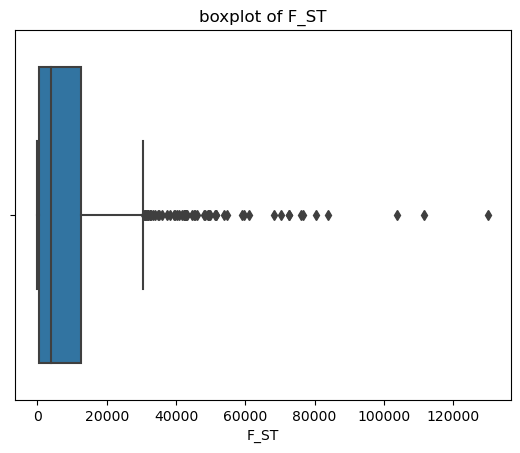

 Univariate analysis of M_LIT
count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64


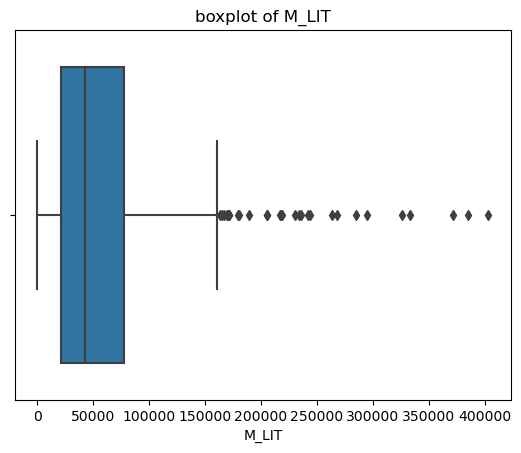

 Univariate analysis of F_LIT
count       640.000000
mean      66359.565625
std       75037.860207
min         371.000000
25%       20932.000000
50%       43796.500000
75%       84799.750000
max      571140.000000
Name: F_LIT, dtype: float64


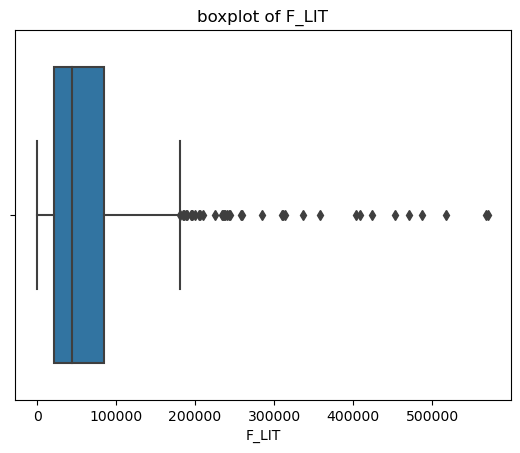

 Univariate analysis of M_ILL
count       640.000000
mean      21972.596875
std       19825.605268
min         105.000000
25%        8590.000000
50%       15767.500000
75%       29512.500000
max      105961.000000
Name: M_ILL, dtype: float64


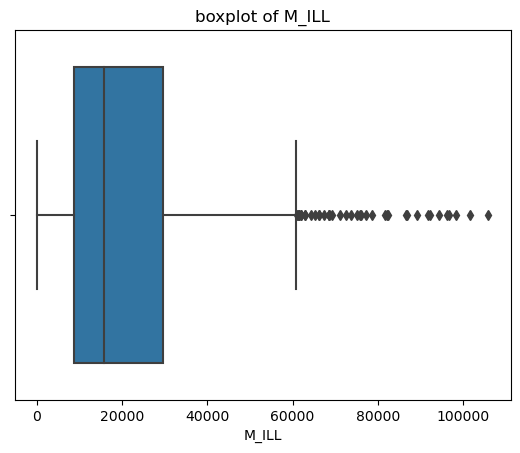

 Univariate analysis of F_ILL
count       640.000000
mean      56012.518750
std       47116.693769
min         327.000000
25%       22367.000000
50%       42386.000000
75%       78471.000000
max      254160.000000
Name: F_ILL, dtype: float64


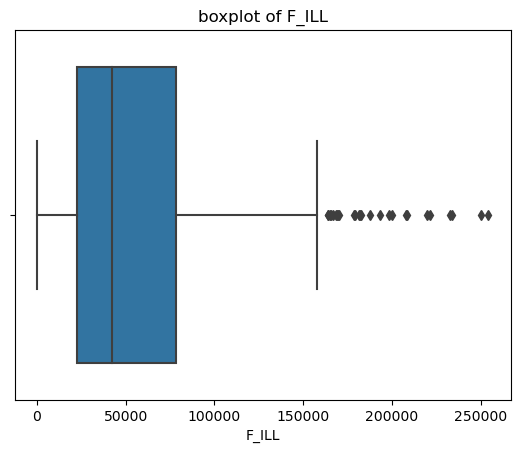

 Univariate analysis of TOT_WORK_M
count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64


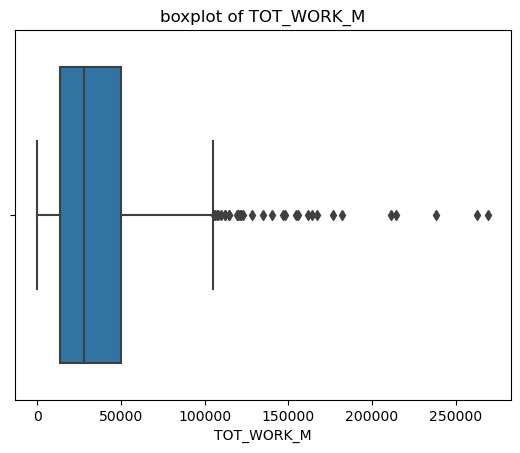

 Univariate analysis of TOT_WORK_F
count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64


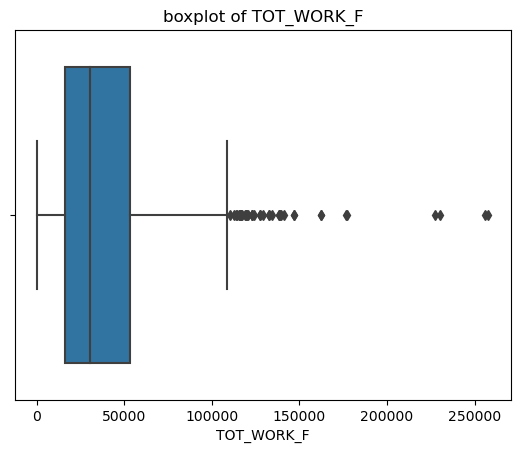

 Univariate analysis of MAINWORK_M
count       640.000000
mean      30204.446875
std       31480.915680
min          65.000000
25%        9787.000000
50%       21250.500000
75%       40119.000000
max      247911.000000
Name: MAINWORK_M, dtype: float64


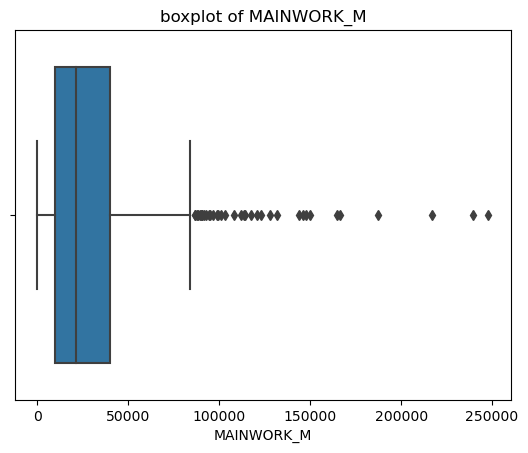

 Univariate analysis of MAINWORK_F
count       640.000000
mean      28198.846875
std       29998.262689
min         240.000000
25%        9502.250000
50%       18484.000000
75%       35063.250000
max      226166.000000
Name: MAINWORK_F, dtype: float64


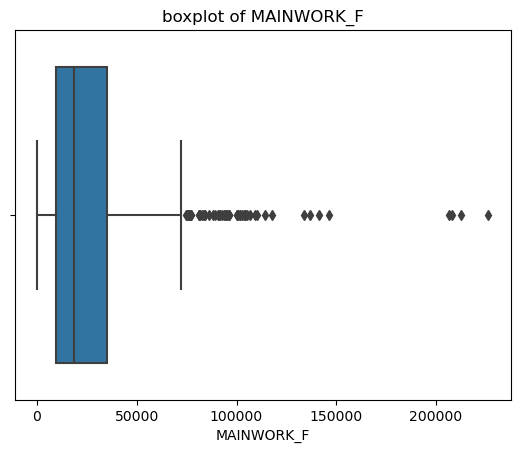

 Univariate analysis of MAIN_CL_M
count      640.000000
mean      5424.342188
std       4739.161969
min          0.000000
25%       2023.500000
50%       4160.500000
75%       7695.000000
max      29113.000000
Name: MAIN_CL_M, dtype: float64


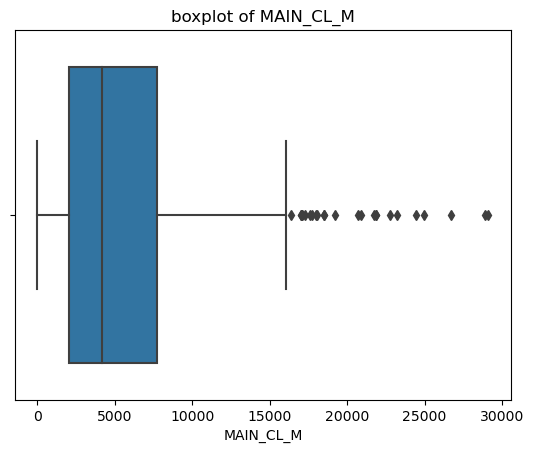

 Univariate analysis of MAIN_CL_F
count      640.000000
mean      5486.042188
std       5326.362728
min          0.000000
25%       1920.250000
50%       3908.500000
75%       7286.250000
max      36193.000000
Name: MAIN_CL_F, dtype: float64


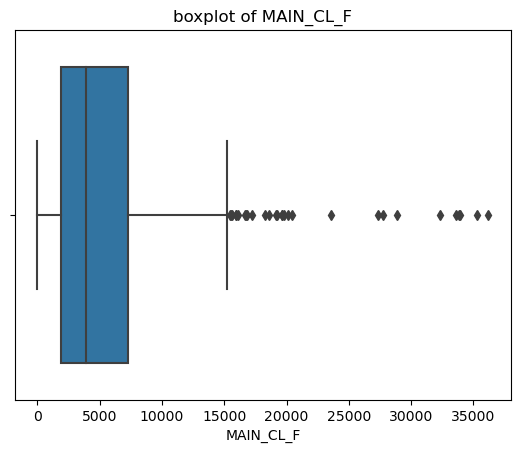

 Univariate analysis of MAIN_AL_M
count      640.000000
mean      5849.109375
std       6399.507966
min          0.000000
25%       1070.250000
50%       3936.500000
75%       8067.250000
max      40843.000000
Name: MAIN_AL_M, dtype: float64


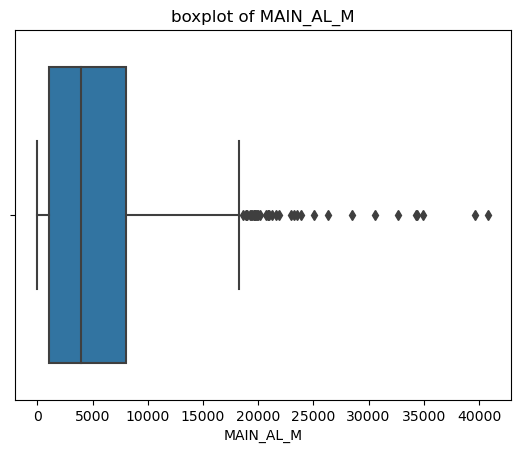

 Univariate analysis of MAIN_AL_F
count      640.000000
mean      8925.995312
std      12864.287584
min          0.000000
25%       1408.750000
50%       3933.500000
75%      10617.500000
max      87945.000000
Name: MAIN_AL_F, dtype: float64


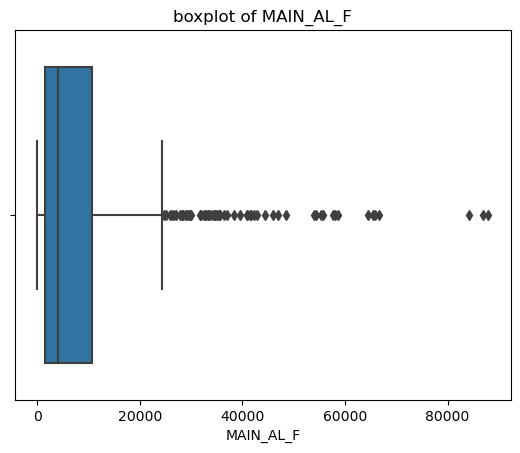

 Univariate analysis of MAIN_HH_M
count      640.000000
mean       883.893750
std       1278.642345
min          0.000000
25%        187.500000
50%        498.500000
75%       1099.250000
max      16429.000000
Name: MAIN_HH_M, dtype: float64


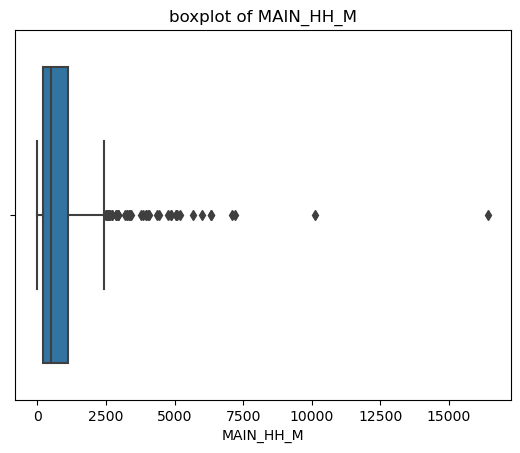

 Univariate analysis of MAIN_HH_F
count      640.000000
mean      1380.773438
std       3179.414449
min          0.000000
25%        248.750000
50%        540.500000
75%       1435.750000
max      45979.000000
Name: MAIN_HH_F, dtype: float64


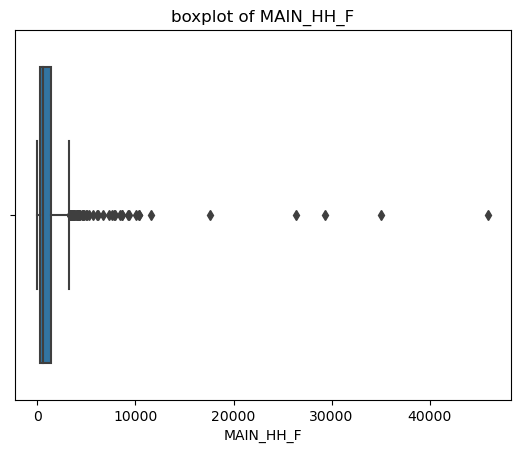

 Univariate analysis of MAIN_OT_M
count       640.000000
mean      18047.101562
std       26068.480886
min          36.000000
25%        3997.500000
50%        9598.000000
75%       21249.500000
max      240855.000000
Name: MAIN_OT_M, dtype: float64


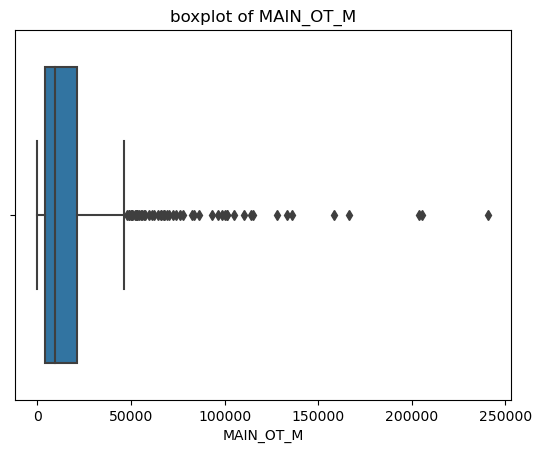

 Univariate analysis of MAIN_OT_F
count       640.000000
mean      12406.035938
std       18972.202369
min         153.000000
25%        3142.500000
50%        6380.500000
75%       14368.250000
max      209355.000000
Name: MAIN_OT_F, dtype: float64


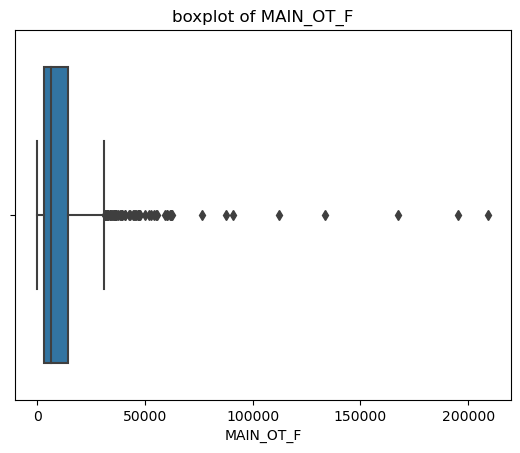

 Univariate analysis of MARGWORK_M
count      640.000000
mean      7787.960938
std       7410.791691
min         35.000000
25%       2937.500000
50%       5627.000000
75%       9800.250000
max      47553.000000
Name: MARGWORK_M, dtype: float64


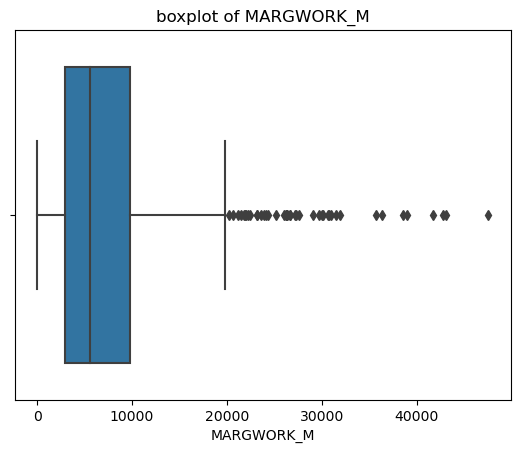

 Univariate analysis of MARGWORK_F
count      640.000000
mean     13096.914062
std      10996.474528
min        117.000000
25%       5424.500000
50%      10175.000000
75%      18879.250000
max      66915.000000
Name: MARGWORK_F, dtype: float64


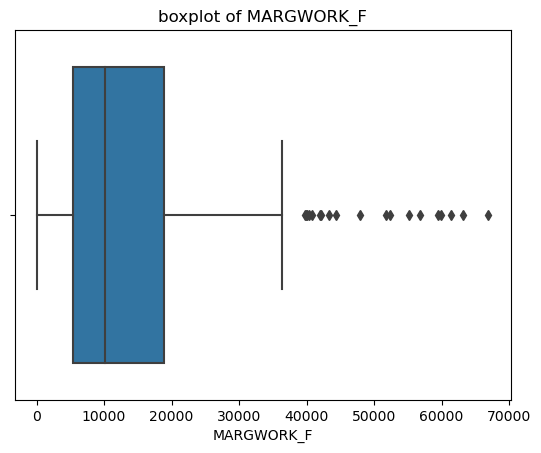

 Univariate analysis of MARG_CL_M
count      640.000000
mean      1040.737500
std       1311.546847
min          0.000000
25%        311.750000
50%        606.500000
75%       1281.000000
max      13201.000000
Name: MARG_CL_M, dtype: float64


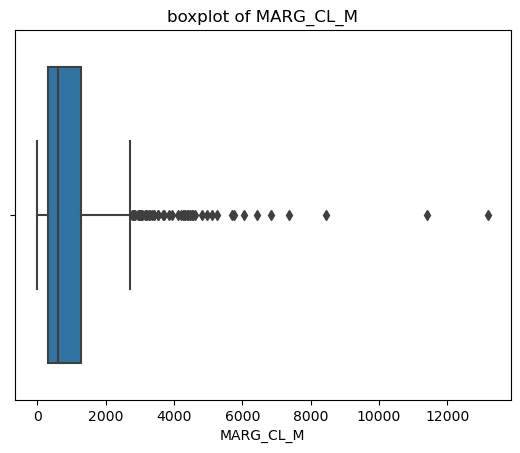

 Univariate analysis of MARG_CL_F
count      640.000000
mean      2307.682813
std       3564.626095
min          0.000000
25%        630.250000
50%       1226.000000
75%       2659.250000
max      44324.000000
Name: MARG_CL_F, dtype: float64


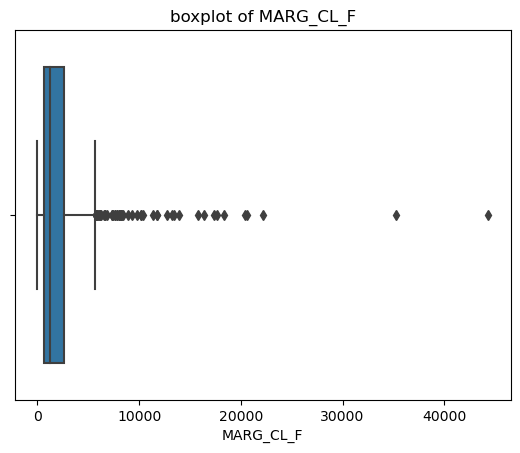

 Univariate analysis of MARG_AL_M
count      640.000000
mean      3304.326562
std       3781.555707
min          0.000000
25%        873.500000
50%       2062.000000
75%       4300.750000
max      23719.000000
Name: MARG_AL_M, dtype: float64


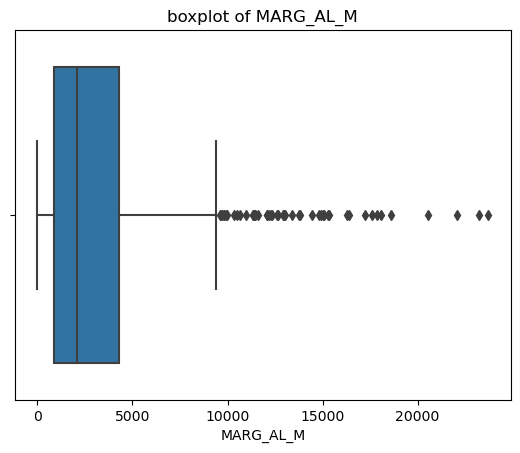

 Univariate analysis of MARG_AL_F
count      640.000000
mean      6463.281250
std       6773.876298
min          0.000000
25%       1402.500000
50%       4020.500000
75%       9089.250000
max      45301.000000
Name: MARG_AL_F, dtype: float64


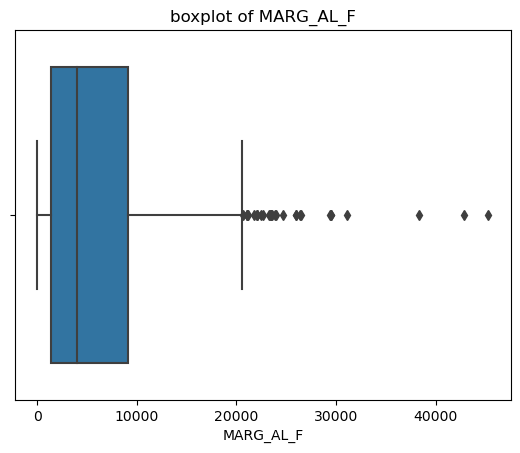

 Univariate analysis of MARG_HH_M
count     640.000000
mean      316.742188
std       462.661891
min         0.000000
25%        71.750000
50%       166.000000
75%       356.500000
max      4298.000000
Name: MARG_HH_M, dtype: float64


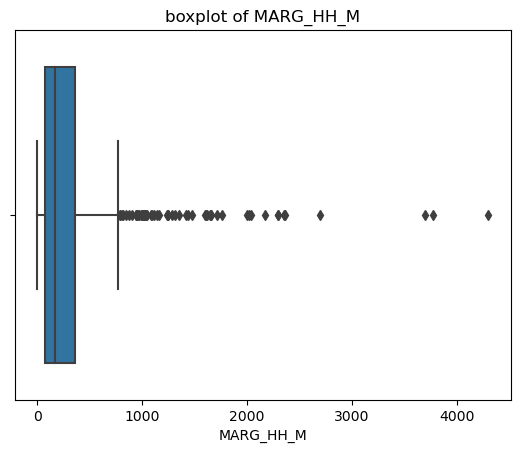

 Univariate analysis of MARG_HH_F
count      640.000000
mean       786.626562
std       1198.718213
min          0.000000
25%        171.750000
50%        429.000000
75%        962.500000
max      15448.000000
Name: MARG_HH_F, dtype: float64


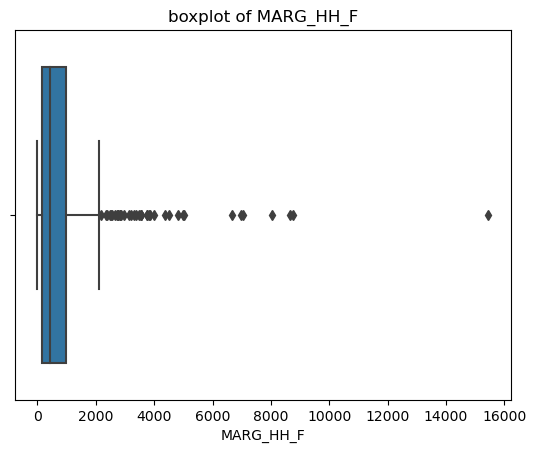

 Univariate analysis of MARG_OT_M
count      640.000000
mean      3126.154687
std       3609.391821
min          7.000000
25%        935.500000
50%       2036.000000
75%       3985.250000
max      24728.000000
Name: MARG_OT_M, dtype: float64


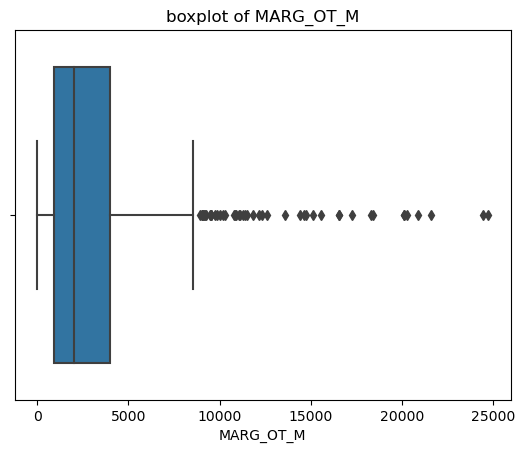

 Univariate analysis of MARG_OT_F
count      640.000000
mean      3539.323438
std       4115.191314
min         19.000000
25%       1071.750000
50%       2349.500000
75%       4400.500000
max      36377.000000
Name: MARG_OT_F, dtype: float64


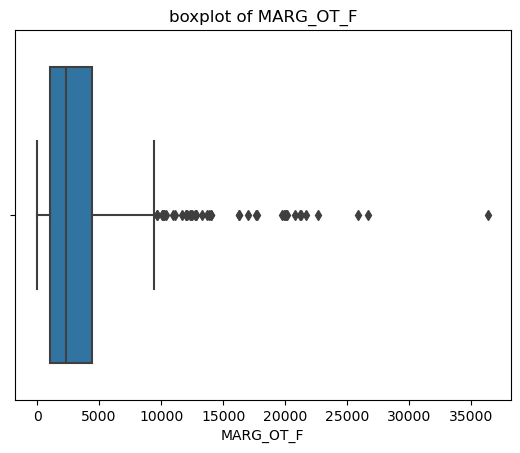

 Univariate analysis of MARGWORK_3_6_M
count       640.000000
mean      41948.168750
std       39045.316918
min         291.000000
25%       16208.250000
50%       30315.000000
75%       57218.750000
max      300937.000000
Name: MARGWORK_3_6_M, dtype: float64


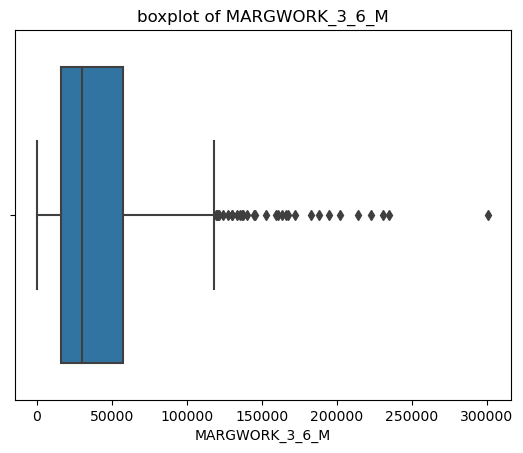

 Univariate analysis of MARGWORK_3_6_F
count       640.000000
mean      81076.323438
std       82970.406216
min         341.000000
25%       26619.500000
50%       56793.000000
75%      107924.000000
max      676450.000000
Name: MARGWORK_3_6_F, dtype: float64


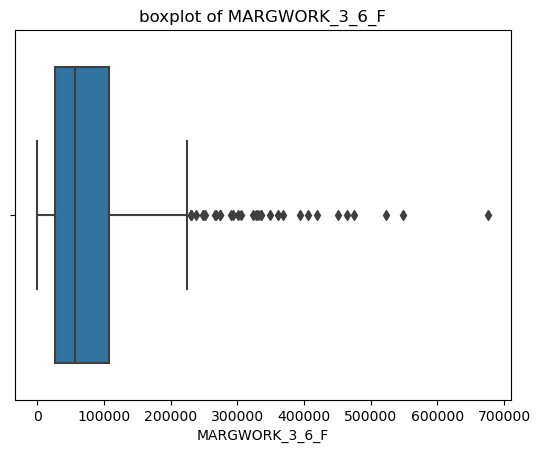

 Univariate analysis of MARG_CL_3_6_M
count      640.000000
mean      6394.987500
std       6019.806644
min         27.000000
25%       2372.000000
50%       4630.000000
75%       8167.000000
max      39106.000000
Name: MARG_CL_3_6_M, dtype: float64


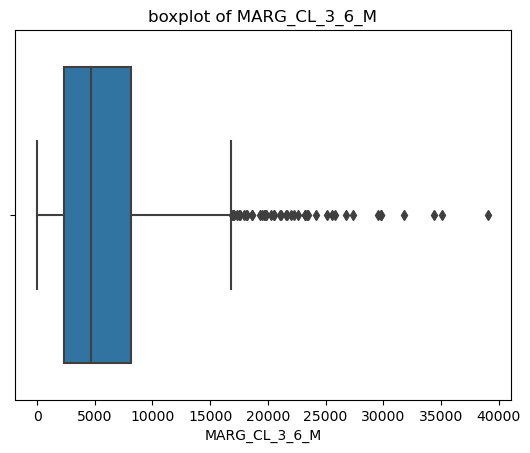

 Univariate analysis of MARG_CL_3_6_F
count      640.000000
mean     10339.864063
std       8467.473429
min         85.000000
25%       4351.500000
50%       8295.000000
75%      15102.000000
max      50065.000000
Name: MARG_CL_3_6_F, dtype: float64


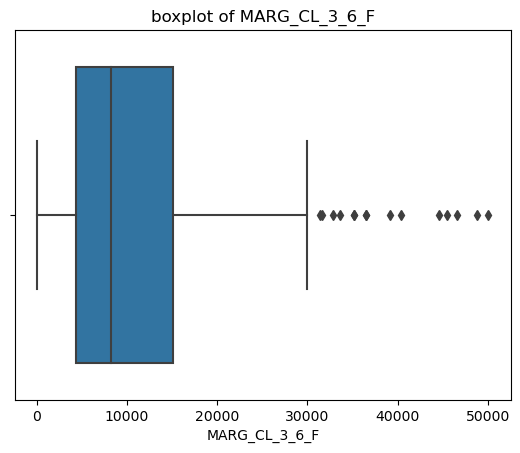

 Univariate analysis of MARG_AL_3_6_M
count     640.000000
mean      789.848438
std       905.639279
min         0.000000
25%       235.500000
50%       480.500000
75%       986.000000
max      7426.000000
Name: MARG_AL_3_6_M, dtype: float64


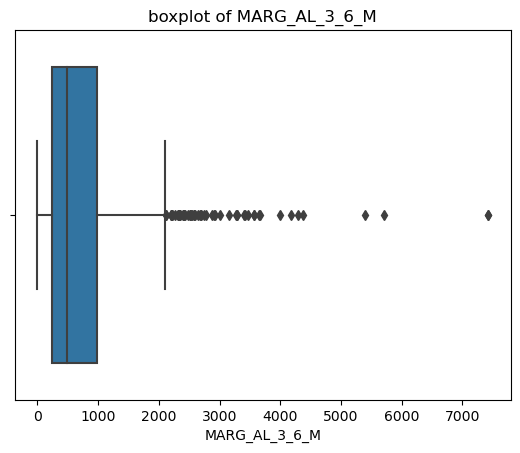

 Univariate analysis of MARG_AL_3_6_F
count      640.000000
mean      1749.584375
std       2496.541514
min          0.000000
25%        497.250000
50%        985.500000
75%       2059.000000
max      27171.000000
Name: MARG_AL_3_6_F, dtype: float64


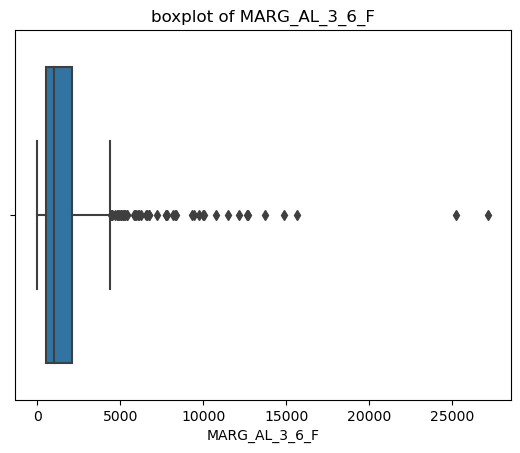

 Univariate analysis of MARG_HH_3_6_M
count      640.000000
mean      2743.635938
std       3059.586387
min          0.000000
25%        718.750000
50%       1714.500000
75%       3702.250000
max      19343.000000
Name: MARG_HH_3_6_M, dtype: float64


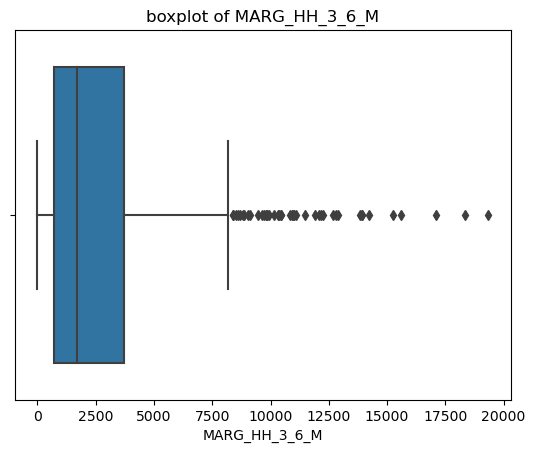

 Univariate analysis of MARG_HH_3_6_F
count      640.00000
mean      5169.85000
std       5335.64096
min          0.00000
25%       1113.75000
50%       3294.00000
75%       7502.25000
max      36253.00000
Name: MARG_HH_3_6_F, dtype: float64


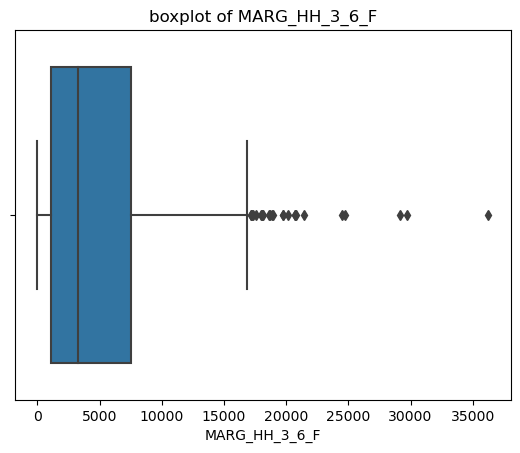

 Univariate analysis of MARG_OT_3_6_M
count     640.000000
mean      245.362500
std       358.728567
min         0.000000
25%        58.000000
50%       129.500000
75%       276.000000
max      3535.000000
Name: MARG_OT_3_6_M, dtype: float64


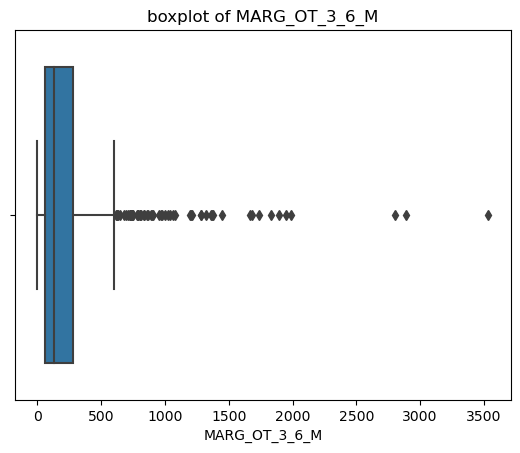

 Univariate analysis of MARG_OT_3_6_F
count      640.000000
mean       585.884375
std        900.025817
min          0.000000
25%        127.750000
50%        320.500000
75%        719.250000
max      12094.000000
Name: MARG_OT_3_6_F, dtype: float64


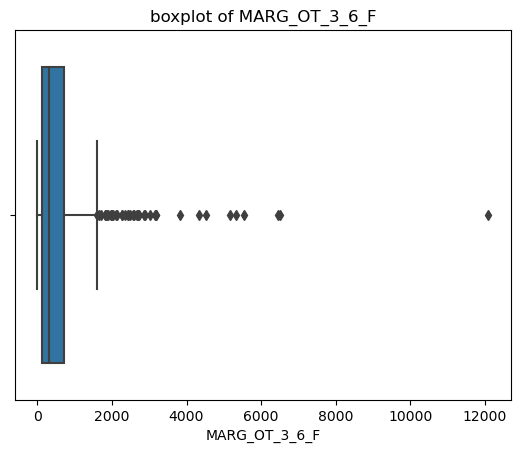

 Univariate analysis of MARGWORK_0_3_M
count      640.000000
mean      2616.140625
std       3036.964381
min          7.000000
25%        755.000000
50%       1681.500000
75%       3320.250000
max      20648.000000
Name: MARGWORK_0_3_M, dtype: float64


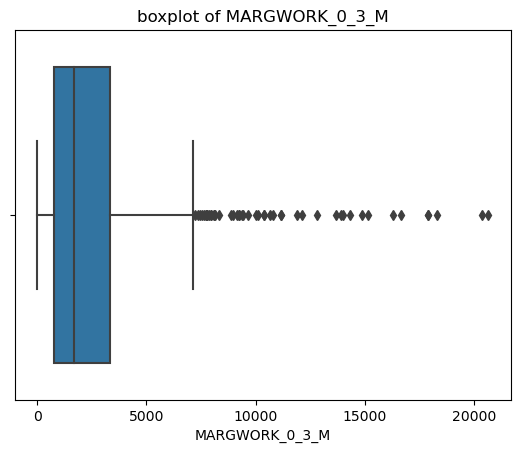

 Univariate analysis of MARGWORK_0_3_F
count      640.000000
mean      2834.545312
std       3327.836932
min         14.000000
25%        833.500000
50%       1834.500000
75%       3610.500000
max      25844.000000
Name: MARGWORK_0_3_F, dtype: float64


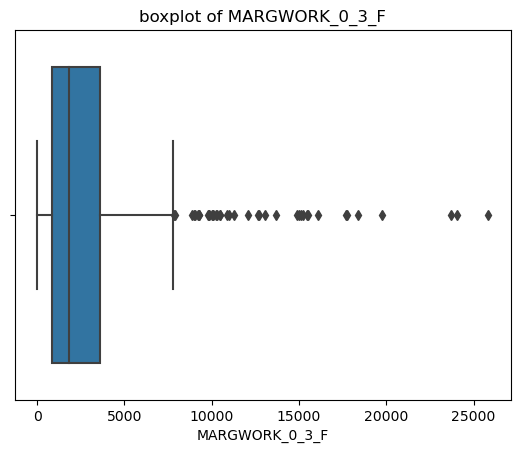

 Univariate analysis of MARG_CL_0_3_M
count     640.000000
mean     1392.973438
std      1489.707052
min         4.000000
25%       489.500000
50%       949.000000
75%      1714.000000
max      9875.000000
Name: MARG_CL_0_3_M, dtype: float64


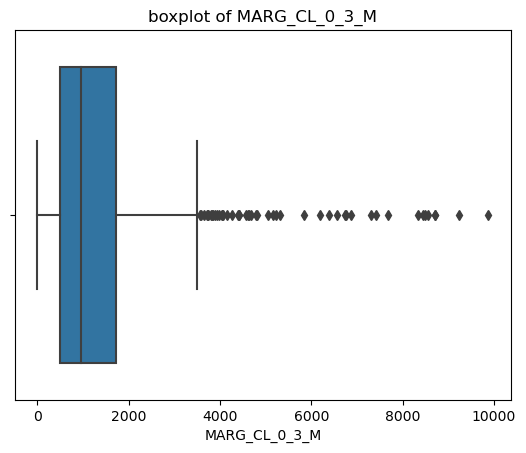

 Univariate analysis of MARG_CL_0_3_F
count      640.000000
mean      2757.050000
std       2788.776676
min         30.000000
25%        957.250000
50%       1928.000000
75%       3599.750000
max      21611.000000
Name: MARG_CL_0_3_F, dtype: float64


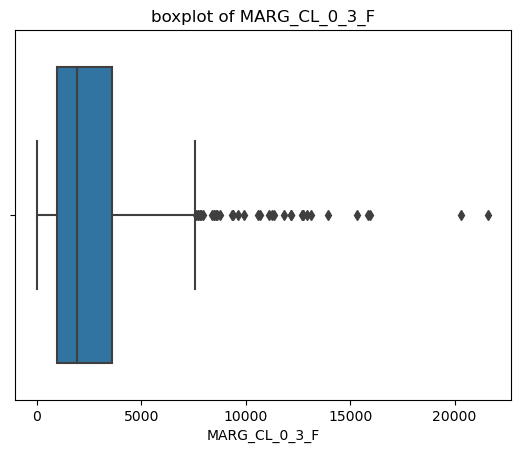

 Univariate analysis of MARG_AL_0_3_M
count     640.000000
mean      250.889062
std       453.336594
min         0.000000
25%        47.000000
50%       114.500000
75%       270.750000
max      5775.000000
Name: MARG_AL_0_3_M, dtype: float64


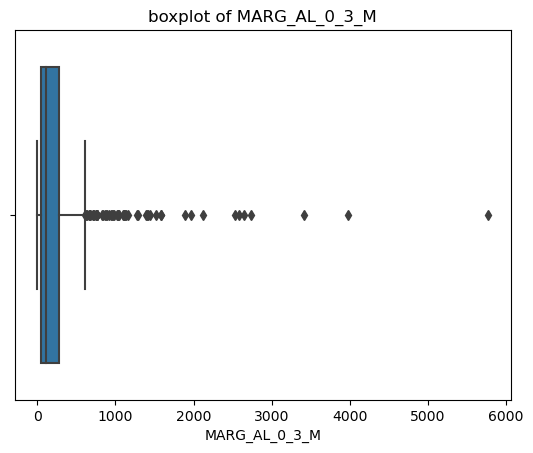

 Univariate analysis of MARG_AL_0_3_F
count      640.000000
mean       558.098438
std       1117.642748
min          0.000000
25%        109.000000
50%        247.500000
75%        568.750000
max      17153.000000
Name: MARG_AL_0_3_F, dtype: float64


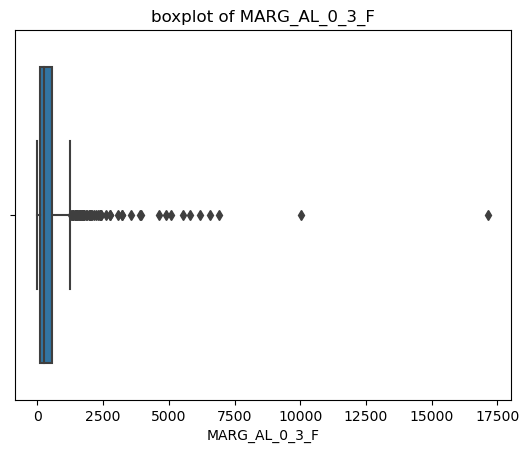

 Univariate analysis of MARG_HH_0_3_M
count     640.000000
mean      560.690625
std       762.578991
min         0.000000
25%       136.500000
50%       308.000000
75%       642.000000
max      6116.000000
Name: MARG_HH_0_3_M, dtype: float64


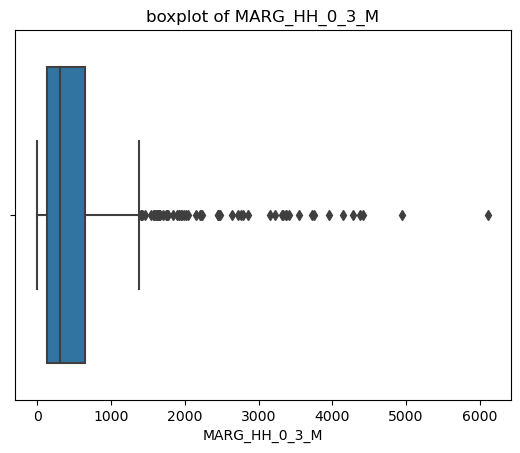

 Univariate analysis of MARG_HH_0_3_F
count      640.000000
mean      1293.431250
std       1585.377936
min          0.000000
25%        298.000000
50%        717.000000
75%       1710.750000
max      13714.000000
Name: MARG_HH_0_3_F, dtype: float64


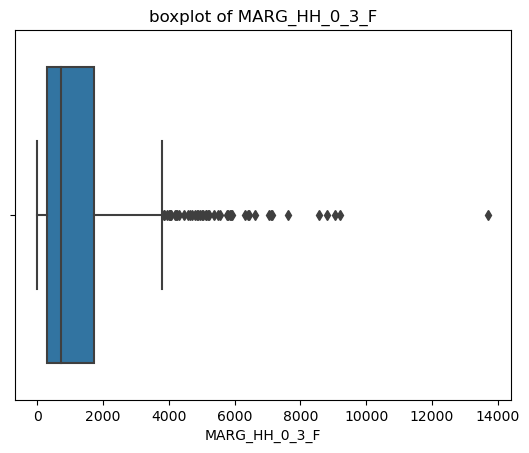

 Univariate analysis of MARG_OT_0_3_M
count    640.000000
mean      71.379688
std      107.897627
min        0.000000
25%       14.000000
50%       35.000000
75%       79.000000
max      895.000000
Name: MARG_OT_0_3_M, dtype: float64


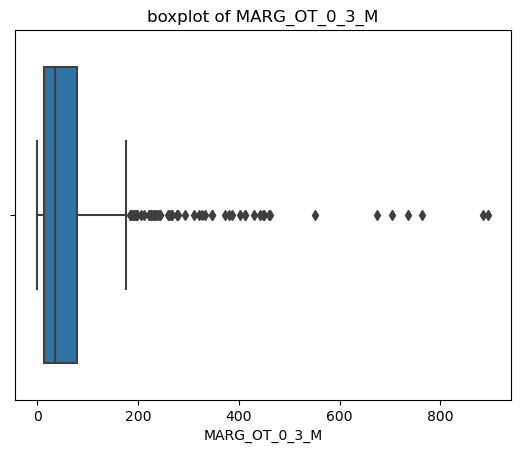

 Univariate analysis of MARG_OT_0_3_F
count     640.000000
mean      200.742188
std       309.740854
min         0.000000
25%        43.000000
50%       113.000000
75%       240.000000
max      3354.000000
Name: MARG_OT_0_3_F, dtype: float64


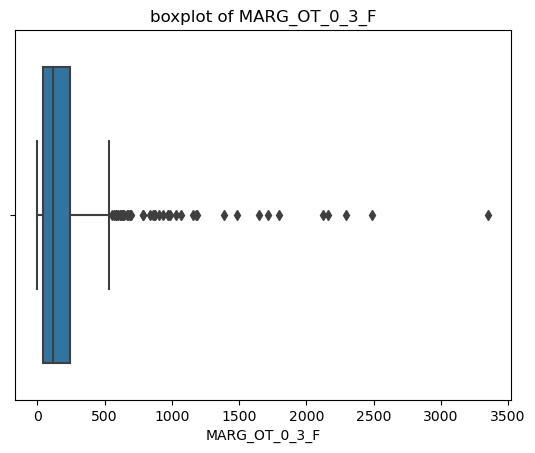

 Univariate analysis of NON_WORK_M
count     640.000000
mean      510.014063
std       610.603187
min         0.000000
25%       161.000000
50%       326.000000
75%       604.500000
max      6456.000000
Name: NON_WORK_M, dtype: float64


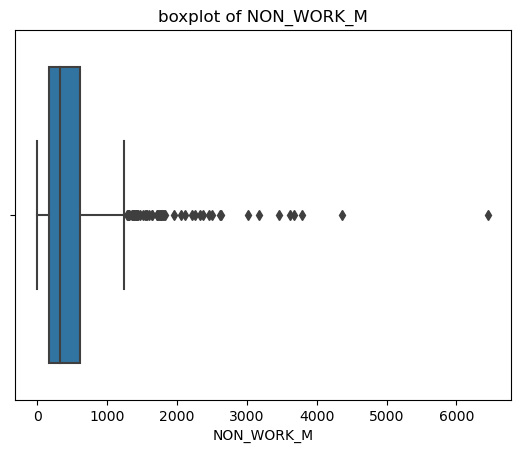

 Univariate analysis of NON_WORK_F
count      640.000000
mean       704.778125
std        910.209225
min          5.000000
25%        220.500000
50%        464.500000
75%        853.500000
max      10533.000000
Name: NON_WORK_F, dtype: float64


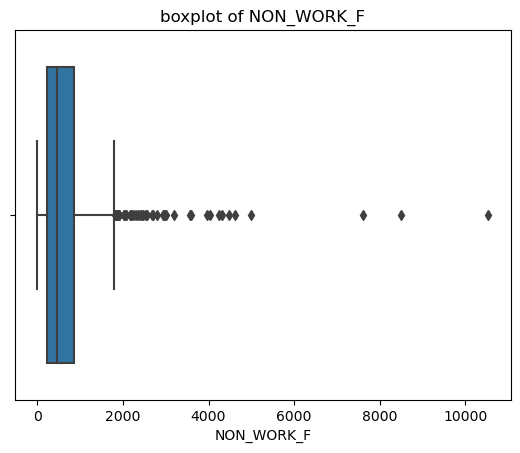

In [96]:
for i in list_num:
    univariate_analysis(i)
    

## <a name ='link5.2'>**Q5**</a><br>
 PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.<br>

Performing Eigen Decomposition

Correlation Matrix

<AxesSubplot:>

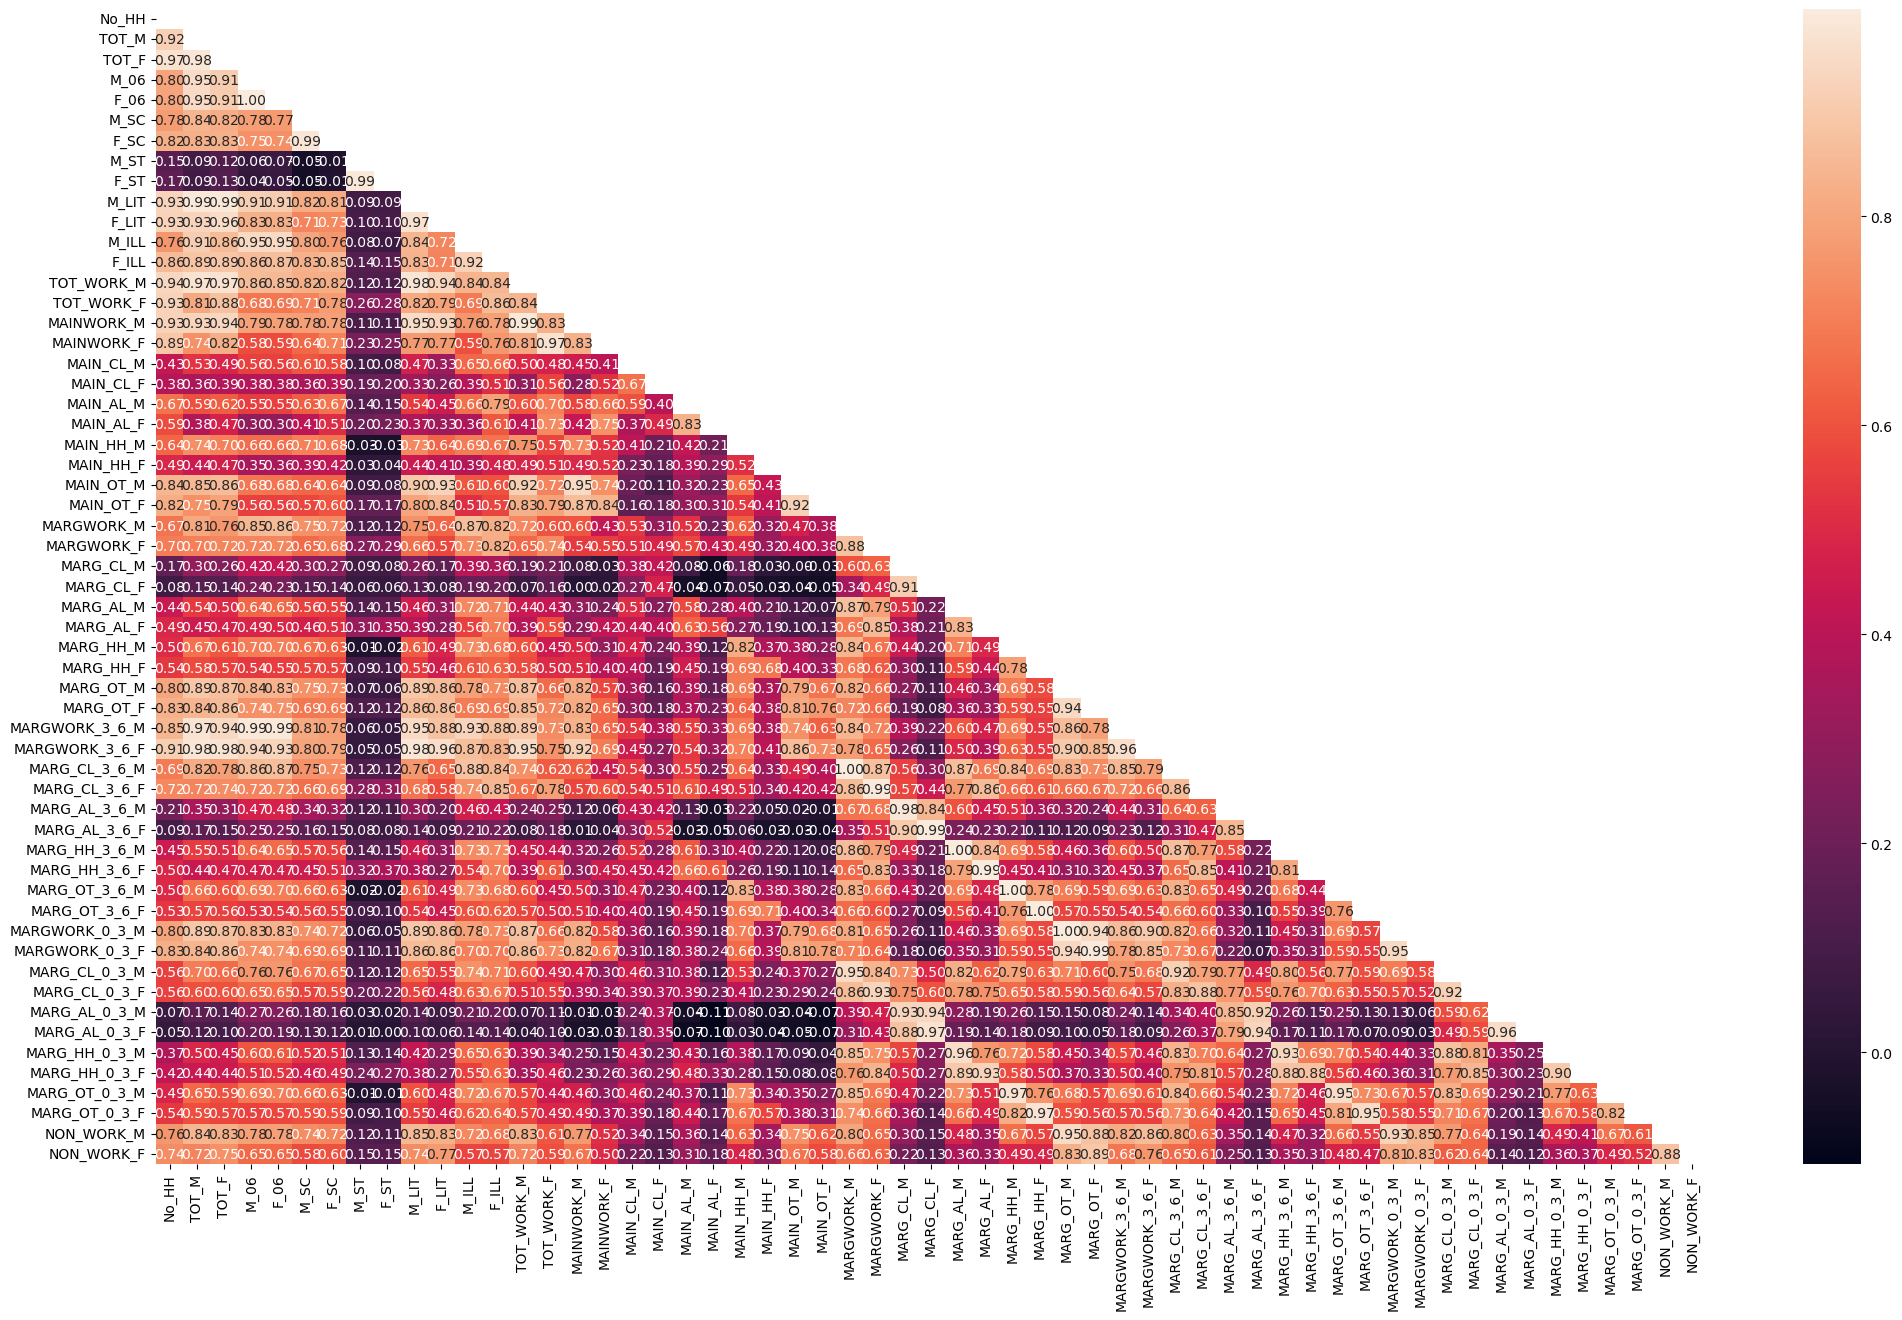

In [207]:
corr=df_num_scaled.corr()
fig = plt.subplots(figsize=(25, 15))
# using the upper triangle matrix as mask 
##matrix = np.triu(np.ones_like(corr))
matrix = np.triu(corr)
sns.heatmap(corr,annot=True,fmt='.2f',mask=matrix)


Covariance Matrix

In [208]:
np.round(df_num_scaled.cov(),2)

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  F_ST  \
No_HH            1.00   0.92   0.97  0.80  0.80  0.78  0.83  0.15  0.17   
TOT_M            0.92   1.00   0.98  0.95  0.95  0.84  0.83  0.09  0.09   
TOT_F            0.97   0.98   1.00  0.91  0.91  0.82  0.83  0.12  0.13   
M_06             0.80   0.95   0.91  1.00  1.00  0.78  0.75  0.06  0.04   
F_06             0.80   0.95   0.91  1.00  1.00  0.77  0.74  0.07  0.05   
M_SC             0.78   0.84   0.82  0.78  0.77  1.00  0.99 -0.05 -0.05   
F_SC             0.83   0.83   0.83  0.75  0.74  0.99  1.00 -0.01 -0.01   
M_ST             0.15   0.09   0.12  0.06  0.07 -0.05 -0.01  1.00  0.99   
F_ST             0.17   0.09   0.13  0.04  0.05 -0.05 -0.01  0.99  1.00   
M_LIT            0.93   0.99   0.99  0.91  0.91  0.82  0.82  0.09  0.09   
F_LIT            0.93   0.93   0.96  0.83  0.83  0.72  0.73  0.10  0.10   
M_ILL            0.76   0.91   0.86  0.95  0.95  0.80  0.76  0.08  0.07   
F_ILL            0.86   0.89   0.89  0.86  0.87  0.83  0.85  0.14  0.15   
TOT_WORK_M       0.94   0.97   0.97  0.86  0.85  0.83  0.82  0.12  0.12   
TOT_WORK_F       0.93   0.81   0.88  0.68  0.69  0.71  0.78  0.27  0.29   
MAINWORK_M       0.93   0.93   0.94  0.79  0.79  0.78  0.78  0.11  0.11   
MAINWORK_F       0.89   0.75   0.82  0.59  0.59  0.65  0.71  0.23  0.25   
MAIN_CL_M        0.43   0.53   0.49  0.56  0.56  0.61  0.58  0.10  0.08   
MAIN_CL_F        0.38   0.36   0.39  0.38  0.38  0.36  0.39  0.19  0.20   
MAIN_AL_M        0.67   0.59   0.62  0.55  0.56  0.63  0.67  0.14  0.15   
MAIN_AL_F        0.59   0.38   0.47  0.30  0.30  0.41  0.51  0.20  0.23   
MAIN_HH_M        0.64   0.74   0.70  0.66  0.66  0.71  0.68 -0.03 -0.03   
MAIN_HH_F        0.49   0.44   0.47  0.36  0.36  0.39  0.42  0.03  0.04   
MAIN_OT_M        0.85   0.85   0.86  0.69  0.68  0.64  0.64  0.09  0.08   
MAIN_OT_F        0.82   0.75   0.80  0.56  0.56  0.58  0.60  0.17  0.17   
MARGWORK_M       0.68   0.81   0.77  0.85  0.86  0.75  0.73  0.12  0.12   
MARGWORK_F       0.70   0.70   0.72  0.72  0.72  0.66  0.68  0.27  0.29   
MARG_CL_M        0.17   0.30   0.26  0.42  0.42  0.30  0.28  0.09  0.08   
MARG_CL_F        0.08   0.15   0.14  0.24  0.23  0.15  0.14  0.06  0.06   
MARG_AL_M        0.44   0.54   0.50  0.64  0.65  0.56  0.55  0.14  0.15   
MARG_AL_F        0.49   0.45   0.48  0.49  0.50  0.46  0.51  0.31  0.35   
MARG_HH_M        0.50   0.67   0.61  0.70  0.70  0.67  0.63 -0.01 -0.02   
MARG_HH_F        0.54   0.58   0.57  0.54  0.55  0.57  0.57  0.09  0.10   
MARG_OT_M        0.80   0.89   0.87  0.84  0.84  0.75  0.73  0.07  0.06   
MARG_OT_F        0.83   0.84   0.86  0.75  0.75  0.69  0.70  0.12  0.12   
MARGWORK_3_6_M   0.85   0.98   0.94  0.99  0.99  0.81  0.79  0.06  0.05   
MARGWORK_3_6_F   0.92   0.98   0.98  0.94  0.94  0.80  0.79  0.05  0.05   
MARG_CL_3_6_M    0.69   0.82   0.78  0.86  0.87  0.75  0.73  0.12  0.12   
MARG_CL_3_6_F    0.72   0.72   0.74  0.72  0.72  0.66  0.70  0.28  0.31   
MARG_AL_3_6_M    0.21   0.35   0.31  0.47  0.48  0.34  0.32  0.12  0.11   
MARG_AL_3_6_F    0.09   0.17   0.15  0.25  0.25  0.16  0.15  0.08  0.08   
MARG_HH_3_6_M    0.45   0.55   0.51  0.64  0.65  0.57  0.56  0.14  0.15   
MARG_HH_3_6_F    0.50   0.44   0.47  0.47  0.48  0.45  0.51  0.32  0.37   
MARG_OT_3_6_M    0.50   0.67   0.60  0.69  0.70  0.66  0.63 -0.02 -0.02   
MARG_OT_3_6_F    0.53   0.57   0.56  0.53  0.54  0.56  0.55  0.09  0.10   
MARGWORK_0_3_M   0.80   0.89   0.87  0.84  0.84  0.74  0.72  0.06  0.05   
MARGWORK_0_3_F   0.83   0.84   0.86  0.74  0.74  0.69  0.70  0.11  0.11   
MARG_CL_0_3_M    0.56   0.70   0.66  0.76  0.76  0.67  0.65  0.12  0.12   
MARG_CL_0_3_F    0.56   0.60   0.60  0.65  0.65  0.57  0.59  0.20  0.22   
MARG_AL_0_3_M    0.07   0.17   0.14  0.27  0.26  0.18  0.16  0.03  0.02   
MARG_AL_0_3_F    0.05   0.12   0.10  0.20  0.19  0.13  0.12  0.01  0.00   
MARG_HH_0_3_M    0.37   0.50   0.45  0.60  0.61  0.52  0.51  0.13  0.14   
MARG_HH_0_3_F    0.42   0.44   0.44  0.51

Getting Eigen Values and Eigen Vectors

In [121]:
from sklearn.decomposition import PCA
pca=PCA(n_components=57,random_state=123)
df_num_pca=pca.fit_transform(df_num_scaled)

In [122]:
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        ,  0.2077636 ,  0.24647657, ..., -0.07217993,
         0.00399206, -0.06929081],
       [ 0.        ,  0.2887035 , -0.20596721, ...,  0.04019745,
        -0.03192722,  0.00778048],
       [-0.        ,  0.18790022,  0.02642675, ..., -0.02597314,
        -0.13972835, -0.02147533]])

In [123]:
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [124]:
pca_ratio=pca.explained_variance_ratio_
pca_ratio

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

In [221]:
np.cumsum(pca_ratio)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

Scree Plot

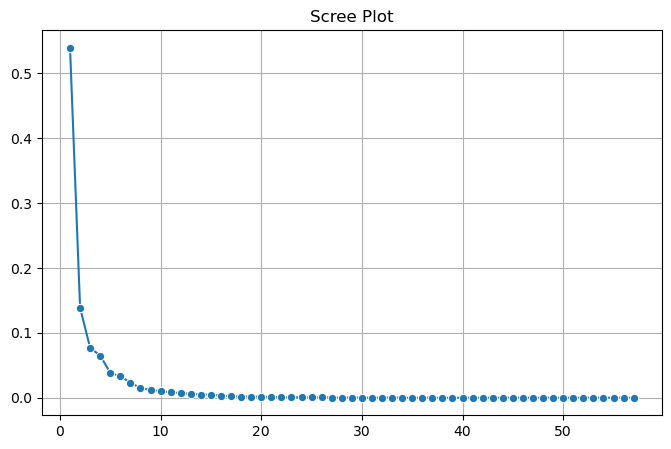

In [185]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca_ratio,x=np.arange(1,len(pca_ratio)+1),marker='o')
plt.title("Scree Plot")
plt.grid()

## <a name ='link6.2'>**Q6**</a><br>
 PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.<br>

Geting Eigen Values for 10 Pc's

In [142]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10,random_state=123)
df_num_pca=pca.fit_transform(df_num_scaled)

In [224]:
pca.components_

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

In [143]:
pca.explained_variance_

array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502,  1.17617374,  0.75115909,  0.61705374,  0.52830088])

In [144]:
pca_ratio=pca.explained_variance_ratio_
pca_ratio

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169, 0.02060239, 0.01315764, 0.01080859, 0.00925395])

In [145]:
np.cumsum(pca_ratio)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687])

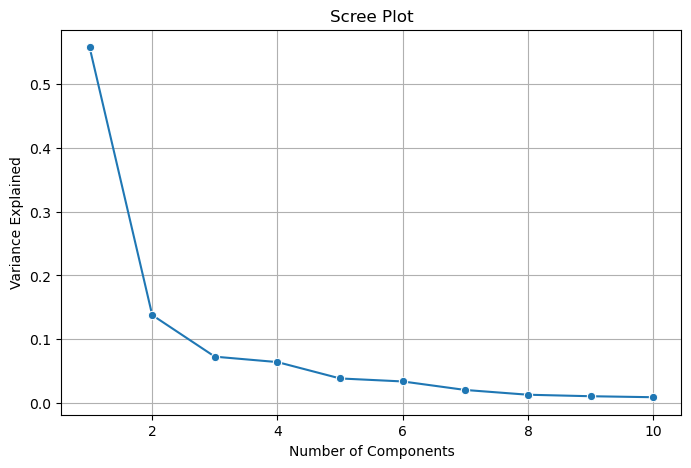

In [538]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca_ratio,x=np.arange(1,len(pca_ratio)+1),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()



In [149]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6,random_state=123)
df_num_pca=pca.fit_transform(df_num_scaled)

In [126]:
pca.explained_variance_

array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502])

In [127]:
pca_ratio=pca.explained_variance_ratio_

In [130]:
pca_ratio

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169])

In [128]:
np.cumsum(pca_ratio)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 ])

In [161]:
pca = PCA(n_components= 10)
pca.fit_transform(df_num_scaled)
pc_comps = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
prop_var = np.round(pca.explained_variance_ratio_,2)
std_dev = np.round(np.sqrt(pca.explained_variance_),2)
cum_var= np.round(np.cumsum(pca.explained_variance_ratio_),2)
temp = pd.DataFrame(pc_comps,columns=['PCs'])
temp['Proportion Of Variance'] = prop_var
temp['Standard Deviation'] = std_dev
temp['Cumulative Proportion'] = cum_var
temp


PCs  Proportion Of Variance  Standard Deviation  Cumulative Proportion
0   PC1                    0.56                5.64                   0.56
1   PC2                    0.14                2.81                   0.70
2   PC3                    0.07                2.04                   0.77
3   PC4                    0.06                1.92                   0.83
4   PC5                    0.04                1.49                   0.87
5   PC6                    0.03                1.39                   0.90
6   PC7                    0.02                1.08                   0.93
7   PC8                    0.01                0.87                   0.94
8   PC9                    0.01                0.79                   0.95
9  PC10                    0.01                0.73                   0.96

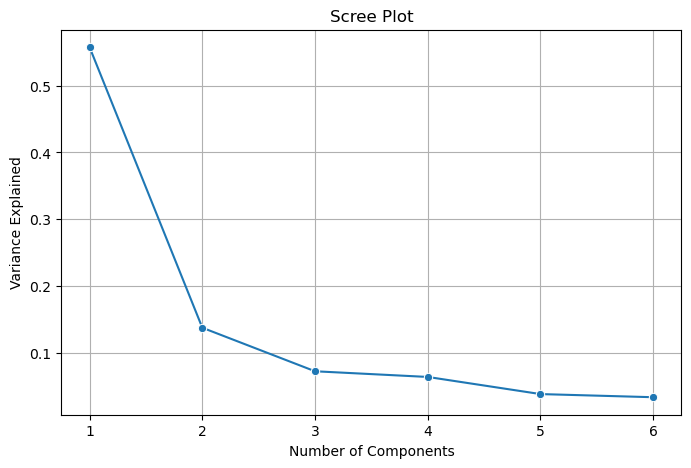

In [544]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca_ratio,x=np.arange(1,len(pca_ratio)+1),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()



PCA Loading 

In [150]:
df_num_pca_loadings=pd.DataFrame(pca.components_,columns=list(df_num_scaled.columns))

In [151]:
df_num_pca_loadings

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0  0.156021  0.167118  0.165553  0.162193  0.162566  0.151358  0.151567   
1 -0.126347 -0.089677 -0.104912 -0.022095 -0.020271 -0.045111 -0.051924   
2 -0.002690  0.056698  0.038749  0.057788  0.050126  0.002569 -0.025101   
3 -0.125293 -0.019942 -0.070873  0.011917  0.014844  0.012485 -0.029893   
4 -0.007022 -0.033026 -0.012847 -0.050248 -0.043848 -0.173007 -0.159803   
5  0.004083 -0.073389 -0.043647 -0.157957 -0.154436 -0.064295 -0.040518   

       M_ST      F_ST     M_LIT     F_LIT     M_ILL     F_ILL  TOT_WORK_M  \
0  0.027234  0.028183  0.161993  0.146873  0.161749  0.165248    0.159872   
1  0.027679  0.030223 -0.115355 -0.153109 -0.006625 -0.009107   -0.133529   
2 -0.123504 -0.139769  0.082168  0.117098 -0.021855 -0.093062    0.045176   
3 -0.222247 -0.229754 -0.035163 -0.059559  0.025348 -0.076023   -0.040154   
4  0.433163  0.438792 -0.009101  0.055844 -0.096580 -0.119911   -0.019553   
5  0.222591  0.225531 -0.055465 -0.048021 -0.115234 -0.028757   -0.001801   

   TOT_WORK_F  MAINWORK_M  MAINWORK_F  MAIN_CL_M  MAIN_CL_F  MAIN_AL_M  \
0    0.145936    0.146201    0.123970   0.103127   0.074540   0.113356   
1   -0.085087   -0.176368   -0.151413   0.062415   0.086477  -0.031040   
2   -0.059450    0.054295   -0.055609  -0.067399  -0.009238  -0.247917   
3   -0.225160   -0.068351   -0.246640  -0.089769  -0.288965  -0.136082   
4   -0.040437   -0.036802   -0.082834  -0.286039  -0.241936  -0.205723   
5    0.105162    0.019283    0.123832  -0.006170   0.102951  -0.031068   

   MAIN_AL_F  MAIN_HH_M  MAIN_HH_F  MAIN_OT_M  MAIN_OT_F  MARGWORK_M  \
0   0.073882   0.131573   0.083383   0.123526   0.111021    0.164615   
1  -0.058688  -0.076021  -0.082477  -0.212984  -0.210071    0.092994   
2  -0.251932   0.026569  -0.060523   0.137378   0.095634   -0.008628   
3  -0.290042   0.152366   0.048950  -0.040289  -0.120391    0.093018   
4  -0.177605  -0.134089  -0.139441   0.064638   0.080743    0.060244   
5   0.019240   0.174465   0.422309   0.023477   0.083079   -0.090762   

   MARGWORK_F  MARG_CL_M  MARG_CL_F  MARG_AL_M  MARG_AL_F  MARG_HH_M  \
0    0.155396   0.082389   0.049195   0.128599   0.114305   0.140853   
1    0.125270   0.269450   0.246547   0.165831   0.140958   0.068068   
2   -0.049370   0.198754   0.268787  -0.189868  -0.267768  -0.021257   
3   -0.088707  -0.062761  -0.168402   0.091787  -0.106365   0.237985   
4    0.089202  -0.022263  -0.059205   0.019422   0.080527  -0.059971   
5    0.017868   0.031915   0.092086  -0.141605  -0.085120   0.089533   

   MARG_HH_F  MARG_OT_M  MARG_OT_F  MARGWORK_3_6_M  MARGWORK_3_6_F  \
0   0.127670   0.155263   0.147287        0.164972        0.161253   
1   0.024216  -0.089442  -0.117899       -0.043995       -0.105502   
2  -0.082504   0.111713   0.100046        0.064423        0.079704   
3   0.196321   0.087119   0.026729       -0.000026        0.003894   
4  -0.033602   0.119121   0.166882       -0.043834        0.000537   
5   0.365112  -0.061066   0.001739       -0.136253       -0.106900   

   MARG_CL_3_6_M  MARG_CL_3_6_F  MARG_AL_3_6_M  MARG_AL_3_6_F  MARG_HH_3_6_M  \
0       0.165502       0.155647       0.093014       0.051536       0.128576   
1       0.077193       0.103174       0.264409       0.244261       0.158783   
2      -0.024205      -0.072013       0.153518       0.256213      -0.200119   
3       0.092875      -0.107860      -0.038488      -0.179691       0.080411   
4       0.054073       0.073050      -0.007789      -0.061303       0.008457   
5      -0.096708       0.023773       0.013477       0.093993      -0.144061   

   MARG_HH_3_6_F  MARG_OT_3_6_M  MARG_OT_3_6_F  MARGWORK_0_3_M  \
0       0.110646       0.139593       0.124546        0.154294   
1       0.125287       0.062262       0.014766       -0.093159   
2      -0.279866      -0.020618      -0.082794        0.110285   
3      -0.136240       0.237745       0.190511        0.086479   
4       0.064109      -0.0664

In [231]:
from matplotlib.patches import Rectangle

## <a name ='link7.2'>**Q7**</a><br>
 PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.<br>

In [152]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2','PC3','PC4','PC5','PC6'],
                                    index = df_num_scaled.columns)

In [136]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6
No_HH           0.156021 -0.126347 -0.002690 -0.125293 -0.007022  0.004083
TOT_M           0.167118 -0.089677  0.056698 -0.019942 -0.033026 -0.073389
TOT_F           0.165553 -0.104912  0.038749 -0.070873 -0.012847 -0.043647
M_06            0.162193 -0.022095  0.057788  0.011917 -0.050248 -0.157957
F_06            0.162566 -0.020271  0.050126  0.014844 -0.043848 -0.154436
M_SC            0.151358 -0.045111  0.002569  0.012485 -0.173007 -0.064295
F_SC            0.151567 -0.051924 -0.025101 -0.029893 -0.159803 -0.040518
M_ST            0.027234  0.027679 -0.123504 -0.222247  0.433163  0.222591
F_ST            0.028183  0.030223 -0.139769 -0.229754  0.438792  0.225531
M_LIT           0.161993 -0.115355  0.082168 -0.035163 -0.009101 -0.055465
F_LIT           0.146873 -0.153109  0.117098 -0.059559  0.055844 -0.048021
M_ILL           0.161749 -0.006625 -0.021855  0.025348 -0.096580 -0.115234
F_ILL           0.165248 -0.009107 -0.093062 -0.076023 -0.119911 -0.028757
TOT_WORK_M      0.159872 -0.133529  0.045176 -0.040154 -0.019553 -0.001801
TOT_WORK_F      0.145936 -0.085087 -0.059450 -0.225160 -0.040437  0.105162
MAINWORK_M      0.146201 -0.176368  0.054295 -0.068351 -0.036802  0.019283
MAINWORK_F      0.123970 -0.151413 -0.055609 -0.246640 -0.082834  0.123832
MAIN_CL_M       0.103127  0.062415 -0.067399 -0.089769 -0.286039 -0.006170
MAIN_CL_F       0.074540  0.086477 -0.009238 -0.288965 -0.241936  0.102951
MAIN_AL_M       0.113356 -0.031040 -0.247917 -0.136082 -0.205723 -0.031068
MAIN_AL_F       0.073882 -0.058688 -0.251932 -0.290042 -0.177605  0.019240
MAIN_HH_M       0.131573 -0.076021  0.026569  0.152366 -0.134089  0.174465
MAIN_HH_F       0.083383 -0.082477 -0.060523  0.048950 -0.139441  0.422309
MAIN_OT_M       0.123526 -0.212984  0.137378 -0.040289  0.064638  0.023477
MAIN_OT_F       0.111021 -0.210071  0.095634 -0.120391  0.080743  0.083079
MARGWORK_M      0.164615  0.092994 -0.008628  0.093018  0.060244 -0.090762
MARGWORK_F      0.155396  0.125270 -0.049370 -0.088707  0.089202  0.017868
MARG_CL_M       0.082389  0.269450  0.198754 -0.062761 -0.022263  0.031915
MARG_CL_F       0.049195  0.246547  0.268787 -0.168402 -0.059205  0.092086
MARG_AL_M       0.128599  0.165831 -0.189868  0.091787  0.019422 -0.141605
MARG_AL_F       0.114305  0.140958 -0.267768 -0.106365  0.080527 -0.085120
MARG_HH_M       0.140853  0.068068 -0.021257  0.237985 -0.059971  0.089533
MARG_HH_F       0.127670  0.024216 -0.082504  0.196321 -0.033602  0.365112
MARG_OT_M       0.155263 -0.089442  0.111713  0.087119  0.119121 -0.061066
MARG_OT_F       0.147287 -0.117899  0.100046  0.026729  0.166882  0.001739
MARGWORK_3_6_M  0.164972 -0.043995  0.064423 -0.000026 -0.043834 -0.136253
MARGWORK_3_6_F  0.161253 -0.105502  0.079704  0.003894  0.000537 -0.106900
MARG_CL_3_6_M   0.165502  0.077193 -0.024205  0.092875  0.054073 -0.096708
MARG_CL_3_6_F   0.155647  0.103174 -0.072013 -0.107860  0.073050  0.023773
MARG_AL_3_6_M   0.093014  0.264409  0.153518 -0.038488 -0.007789  0.013477
MARG_AL_3_6_F   0.051536  0.244261  0.256213 -0.179691 -0.061303  0.093993
MARG_HH_3_6_M   0.128576  0.158783 -0.200119  0.080411  0.008457 -0.144061
MARG_HH_3_6_F   0.110646  0.125287 -0.279866 -0.136240  0.064109 -0.076709
MARG_OT_3_6_M   0.139593  0.062262 -0.020618  0.237745 -0.066400  0.097058
MARG_OT_3_6_F   0.124546  0.014766 -0.082794  0.190511 -0.044810  0.384552
MARGWORK_0_3_M  0.154294 -0.093159  0.110285  0.086479  0.108829 -0.062043
MARGWORK_0_3_F  0.146286 -0.125596  0.095667  0.027275  0.141190  0.008962
MARG_CL_0_3_M   0.150126  0.150681  0.054892  0.087433  0.081185 -0.060715
MARG_CL_0_3_F   0.140157  0.180690  0.023982 -0.022290  0.129936 -0.001727
MARG_AL_0_3_M   0.052542  0.251328  0.268330 -0.104686 -0.048849  0.065409
MARG_AL_0_3_F   0.041786  0.240720  0.284956 -0.135716 -0.051895  0.083743
MARG_HH_0_3_M   0.121840  0.185277 -0.138628  0.132544  0.062380 -0.124209
MARG_HH_0_3_F   0.116011  0.180616 -0.202198  

In [264]:
df_extracted_loadings.to_excel("df_extracted_loadings.xlsx")

In [153]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]

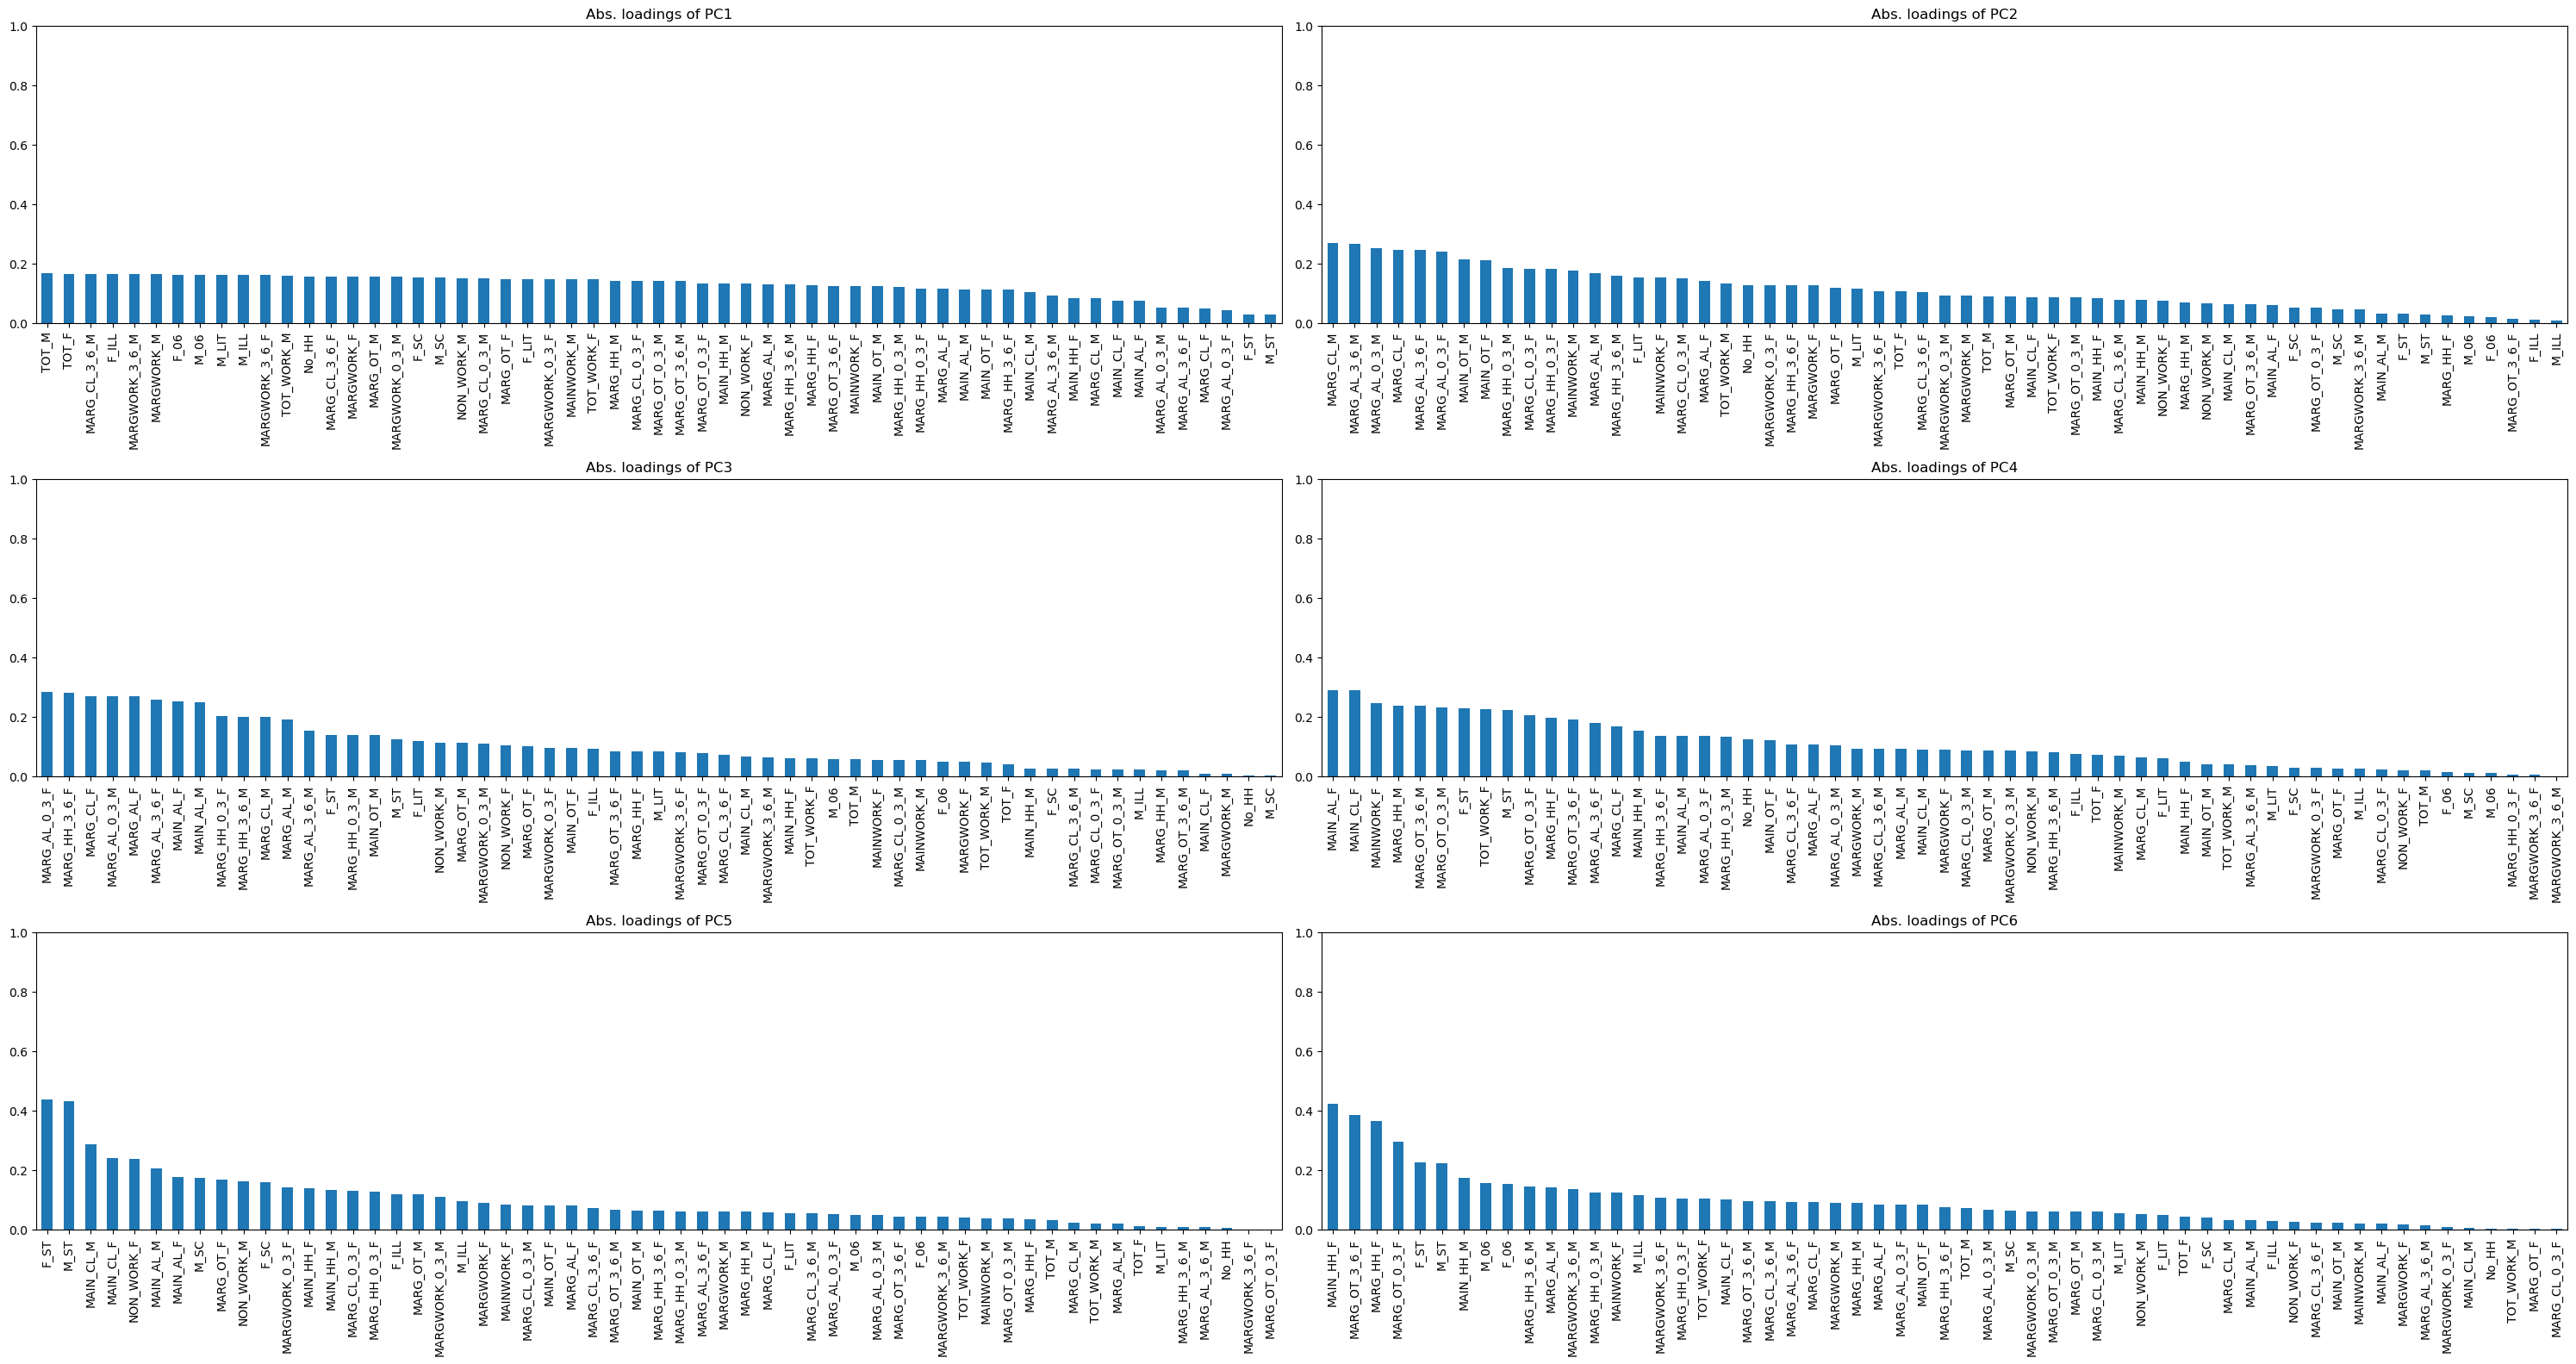

In [240]:
plt.figure(figsize = (30,25))
for i in range(len(df_selected.columns)):
    plt.subplot(5,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

Heatmap pf PCA loadings

PC scores

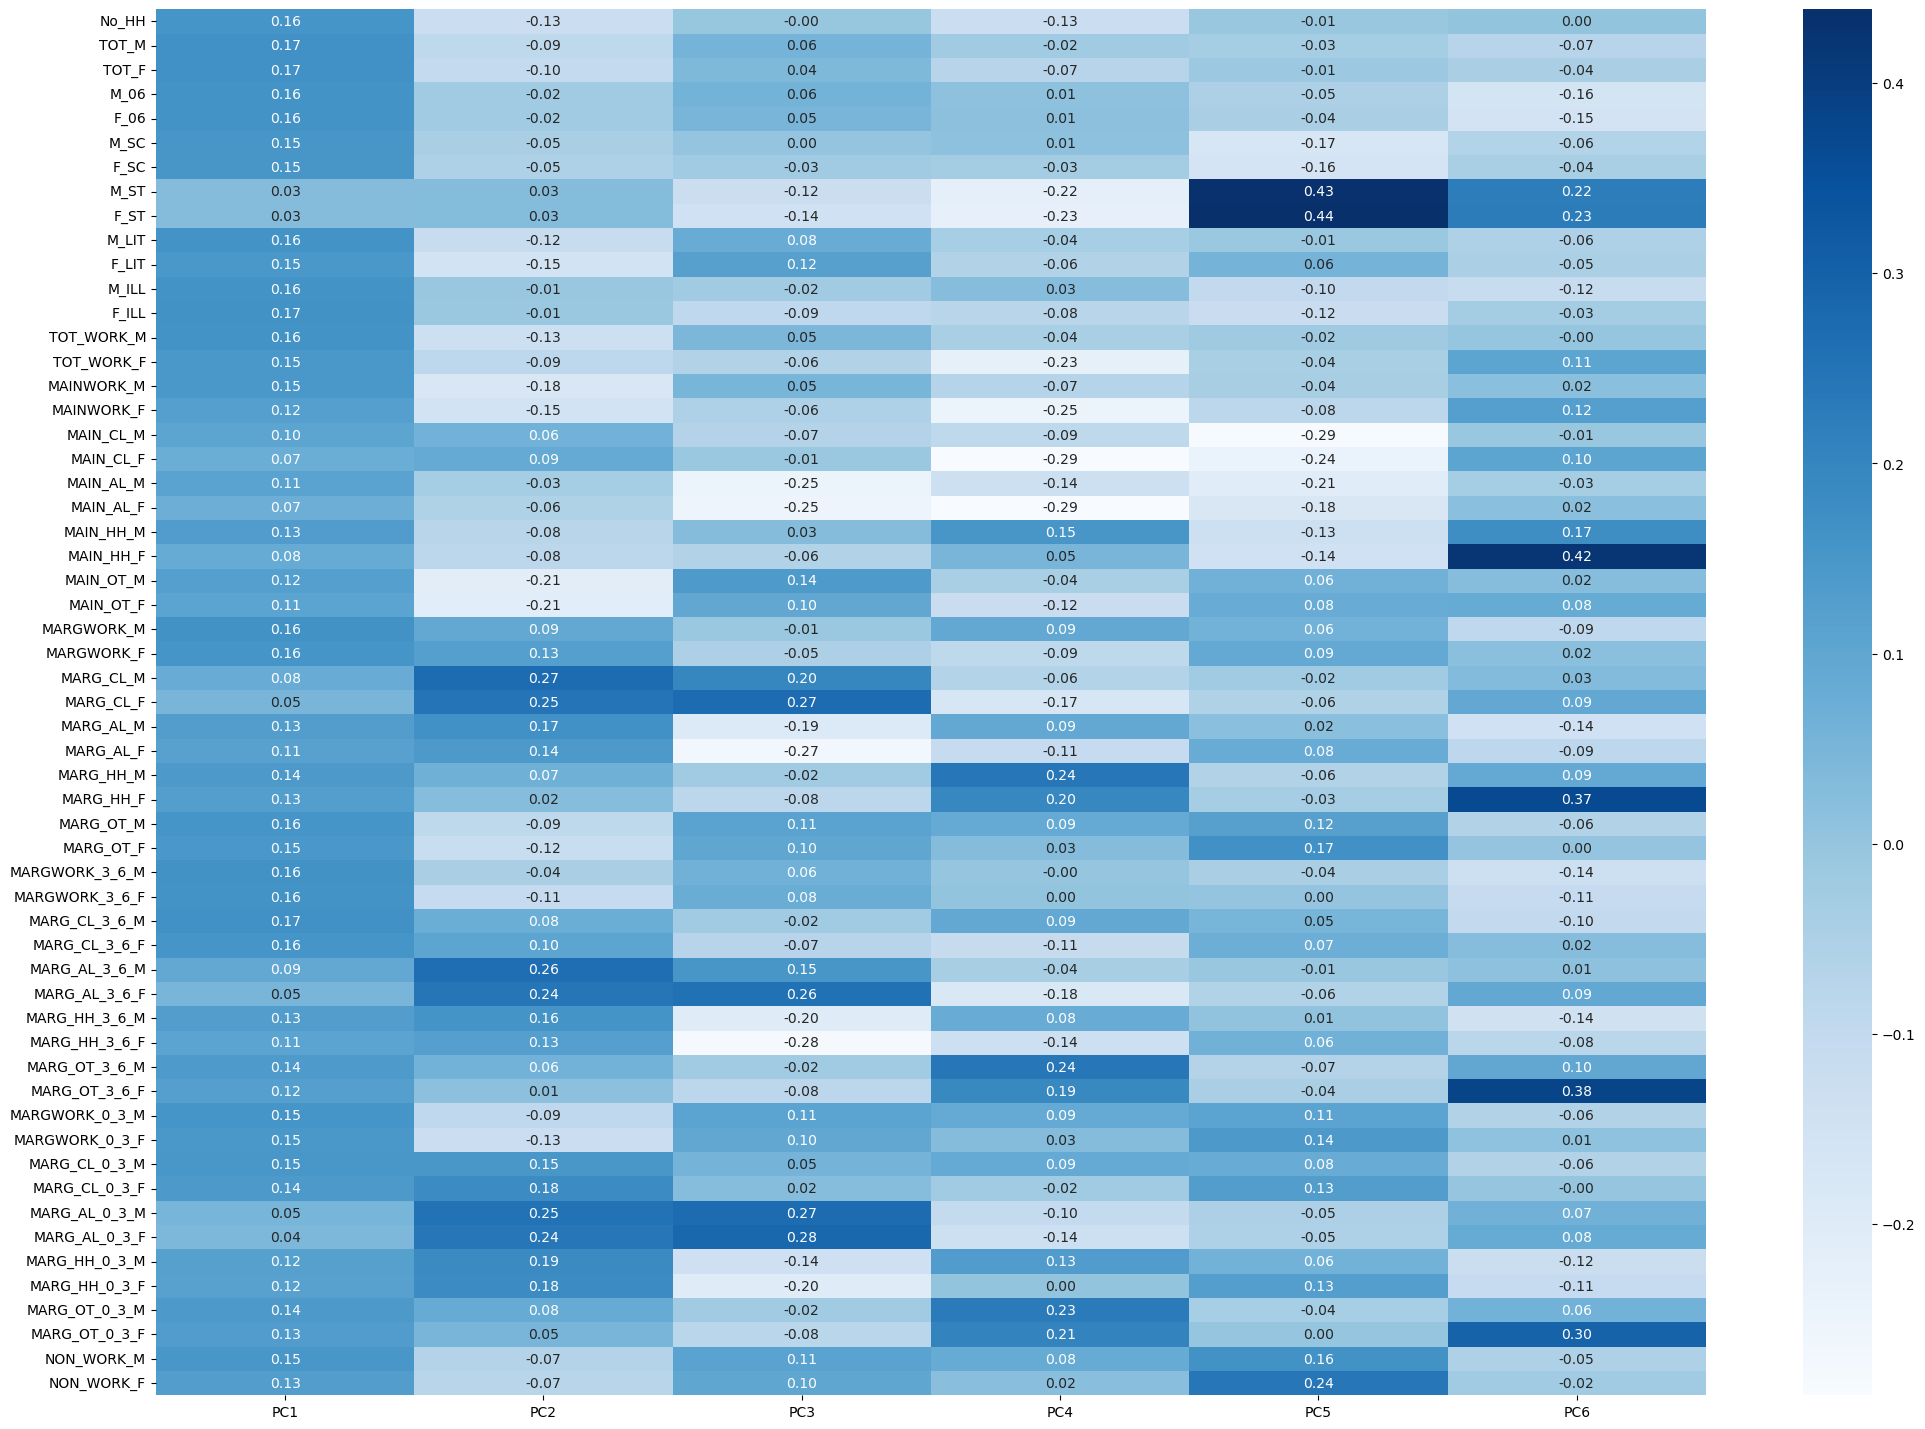

In [255]:
plt.figure(figsize = (25,18))
sns.heatmap(df_num_pca_loadings.T, annot = True, cmap = 'Blues',fmt = '.2f',xticklabels=['PC1','PC2','PC3','PC4','PC5','PC6']);

In [170]:


pca_final_df = pd.DataFrame(df_num_pca, columns = df_selected.columns)
pca_final_df


PC1       PC2       PC3       PC4       PC5       PC6
0   -4.617263  0.138116  0.328545  1.543697  0.353736 -0.420948
1   -4.771662 -0.105865  0.244449  1.963215 -0.153884  0.417308
2   -5.964836 -0.294347  0.367394  0.619543  0.478199  0.276581
3   -6.280796 -0.500384  0.212701  1.074515  0.300799  0.051157
4   -4.478566  0.894154  1.078277  0.535557  0.804065  0.341678
..        ...       ...       ...       ...       ...       ...
635 -6.262088 -0.854414  0.242575  1.174113  0.063816 -0.159470
636 -5.767714 -0.900436  0.168051  1.102774  0.055179 -0.156458
637 -6.294625 -0.638127  0.107483  1.368187  0.153745  0.141145
638 -6.223192 -0.672320  0.271325  1.143493  0.060440 -0.115682
639 -5.896236 -0.937170  0.349218  1.114861  0.149104 -0.154544

[640 rows x 6 columns]

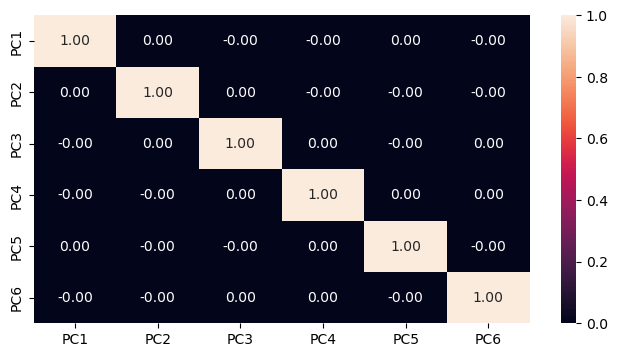

In [155]:
plt.figure(figsize = (8,4))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

In [158]:
round(pca_final_df.corr(),2)


PC1  PC2  PC3  PC4  PC5  PC6
PC1  1.0  0.0 -0.0 -0.0  0.0 -0.0
PC2  0.0  1.0  0.0 -0.0 -0.0 -0.0
PC3 -0.0  0.0  1.0  0.0 -0.0  0.0
PC4 -0.0 -0.0  0.0  1.0  0.0  0.0
PC5  0.0 -0.0 -0.0  0.0  1.0 -0.0
PC6 -0.0 -0.0  0.0  0.0 -0.0  1.0

## <a name ='link8.2'>**Q8**</a><br>
 PCA: Write linear equation for first PC.<br>

In [129]:
for i in range(0,57):
    print("(",np.round(pca.components_[0][i],2),")",'*',df_num_scaled.columns[i], end=' + ')

( 0.16 ) * No_HH + ( 0.17 ) * TOT_M + ( 0.17 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.15 ) * M_SC + ( 0.15 ) * F_SC + ( 0.03 ) * M_ST + ( 0.03 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.16 ) * M_ILL + ( 0.17 ) * F_ILL + ( 0.16 ) * TOT_WORK_M + ( 0.15 ) * TOT_WORK_F + ( 0.15 ) * MAINWORK_M + ( 0.12 ) * MAINWORK_F + ( 0.1 ) * MAIN_CL_M + ( 0.07 ) * MAIN_CL_F + ( 0.11 ) * MAIN_AL_M + ( 0.07 ) * MAIN_AL_F + ( 0.13 ) * MAIN_HH_M + ( 0.08 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.11 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.16 ) * MARGWORK_F + ( 0.08 ) * MARG_CL_M + ( 0.05 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.11 ) * MARG_AL_F + ( 0.14 ) * MARG_HH_M + ( 0.13 ) * MARG_HH_F + ( 0.16 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.17 ) * MARG_CL_3_6_M + ( 0.16 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.05 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) * MARG_HH_3_6_F + ( 0.14 ) * MARG_OT_3_6_M + ( 0